<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="400"> </a>


# From Understanding to Preparation


Estimated time needed: **20** minutes
    

## Objectives

After completing this lab you will be able to:

* Describe Data Preparation 
* Prepare Data for analysis and inference


## Introduction

In this lab, we will continue learning about the data science methodology, and focus on the **Data Understanding** and the **Data Preparation** stages.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Recap](#0)<br>
2. [Data Understanding](#2)<br>
3. [Data Preparation](#4)<br>
</div>
<hr>


In [1]:
# Recap <a id="0"></a>

In the Lab **From Requirements to Collection**, we learned that the data we need to answer the question developed in the business understanding stage, namely *can we automate the process of determining the cuisine of a given recipe?*, is readily available. A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig3_allrecipes.png" width="500">
<div align="left">
Credit: www.allrecipes.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig4_epicurious.png" width="500">
<div align="left">
Credit: www.epicurious.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig5_menupan.png" width="500">
<div align="left">
Credit: www.menupan.com
</div>
<br/><br/>


For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf).


We also collected the data and placed it on an IBM server for your convenience.

------------


# Data Understanding <a id="2"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/flowchart_data_understanding.png" width="500">


<strong>Important note:</strong> Please note that you are not expected to know how to program in python. The following code is meant to illustrate the stage of data collection, so it is totally fine if you do not understand the individual lines of code. There will be a full course in this certificate on programming in python, <a href="http://cocl.us/PY0101EN_DS0103EN_LAB3_PYTHON_edX">Python for Data Science</a>, which will teach you how to program in Python if you decide to complete this certificate.


### Using this notebook:

To run any of the following cells of code, you can type **Shift + Enter** to excute the code in a cell.


Get the version of Python installed.


In [2]:
# check Python version
!python3 -V

Python 3.10.12


Download the library and dependencies that we will need to run this lab.


In [3]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression

Download the data from the IBM server and read it into a *pandas* dataframe.


In [4]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


Show the first few rows.


In [5]:
recipes.head()

country almond angelica anise anise_seed apple apple_brandy apricot  \
0  Vietnamese     No       No    No         No    No           No      No   
1  Vietnamese     No       No    No         No    No           No      No   
2  Vietnamese     No       No    No         No    No           No      No   
3  Vietnamese     No       No    No         No    No           No      No   
4  Vietnamese     No       No    No         No    No           No      No   

  armagnac artemisia artichoke asparagus avocado bacon baked_potato balm  \
0       No        No        No        No      No    No           No   No   
1       No        No        No        No      No    No           No   No   
2       No        No        No        No      No    No           No   No   
3       No        No        No        No      No    No           No   No   
4       No        No        No        No      No    No           No   No   

  banana barley bartlett_pear basil bay bean beech beef beef_broth beef_liver  \
0     No     No            No   Yes  No   No    No   No         No         No   
1     No     No            No    No  No   No    No   No         No         No   
2     No     No            No    No  No   No    No   No         No         No   
3     No     No            No   Yes  No  Yes    No   No        Yes         No   
4     No     No            No    No  No   No    No   No         No         No   

  beer beet bell_pepper bergamot berry bitter_orange black_bean black_currant  \
0   No   No          No       No    No            No         No            No   
1   No   No          No       No    No            No         No            No   
2   No   No          No       No    No            No         No            No   
3   No   No          No       No    No            No         No            No   
4   No   No          No       No    No            No         No            No   

  black_mustard_seed_oil black_pepper black_raspberry black_sesame_seed  \
0                     No           No              No                No   
1                     No          Yes              No                No   
2                     No           No              No                No   
3                     No           No              No                No   
4                     No           No              No                No   

  black_tea blackberry blackberry_brandy blue_cheese blueberry bone_oil  \
0        No         No                No          No        No       No   
1        No         No                No          No        No       No   
2        No         No                No          No        No       No   
3        No         No                No          No        No       No   
4        No         No                No          No        No       No   

  bourbon_whiskey brandy brassica bread broccoli brown_rice brussels_sprout  \
0              No     No       No    No       No         No              No   
1              No     No       No    No       No         No              No   
2              No     No       No    No       No         No              No   
3              No     No       No    No       No         No              No   
4              No     No       No    No       No         No              No   

  buckwheat butter buttermilk cabbage cabernet_sauvignon_wine cacao  \
0        No     No         No      No                      No    No   
1        No     No         No      No                      No    No   
2        No     No         No      No                      No    No   
3        No     No         No      No                      No    No   
4        No     No         No      No                      No    No   

  camembert_cheese cane_molasses caraway cardamom carnation carob carrot  \
0               No            No      No       No        No    No    Yes   
1               No            No      No       No        No    No     No   
2               No            No      No       No        No    No     No   
3   

Get the dimensions of the dataframe.


In [6]:
recipes.shape

(57691, 384)

So our dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.


We know that a basic sushi recipe includes the ingredients:
* rice
* soy sauce
* wasabi
* some fish/vegetables


Let's check that these ingredients exist in our dataframe:


In [7]:
ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


Yes, they do!

* rice exists as rice.
* wasabi exists as wasabi.
* soy exists as soy_sauce.

So maybe if a recipe contains all three ingredients: rice, wasabi, and soy_sauce, then we can confidently say that the recipe is a **Japanese** cuisine! Let's keep this in mind!

----------------


# Data Preparation <a id="4"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/lab3_fig5_flowchart_data_preparation.png" width="500">


In this section, we will prepare data for the next stage in the data science methodology, which is modeling. This stage involves exploring the data further and making sure that it is in the right format for the machine learning algorithm that we selected in the analytic approach stage, which is decision trees.


First, look at the data to see if it needs cleaning.


In [8]:
recipes["country"].value_counts() # fr!python -Vequency table

country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

By looking at the above table, we can make the following observations:

1. Cuisine column is labeled as Country, which is inaccurate.
2. Cuisine names are not consistent as not all of them start with an uppercase first letter.
3. Some cuisines are duplicated as variation of the country name, such as Vietnam and Vietnamese.
4. Some cuisines have very few recipes.


In [9]:
print(recipes["country"].value_counts().to_string())


country
American                   40150
Mexico                      1754
Italian                     1715
Italy                       1461
Asian                       1176
French                       996
east_asian                   951
Canada                       774
korean                       767
Mexican                      622
western                      450
Southern_SoulFood            346
India                        324
Jewish                       320
Spanish_Portuguese           291
Mediterranean                289
UK-and-Ireland               282
Indian                       274
France                       268
MiddleEastern                248
Central_SouthAmerican        241
Germany                      237
Eastern-Europe               235
Chinese                      226
Greek                        225
English_Scottish             204
Caribbean                    183
Thai                         164
Scandinavia                  158
Cajun_Creole                 146
Ea

#### Let's fix these problems.


Fix the name of the column showing the cuisine.


In [10]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

cuisine almond angelica anise anise_seed apple apple_brandy apricot  \
0      Vietnamese     No       No    No         No    No           No      No   
1      Vietnamese     No       No    No         No    No           No      No   
2      Vietnamese     No       No    No         No    No           No      No   
3      Vietnamese     No       No    No         No    No           No      No   
4      Vietnamese     No       No    No         No    No           No      No   
...           ...    ...      ...   ...        ...   ...          ...     ...   
57686       Japan     No       No    No         No    No           No      No   
57687       Japan     No       No    No         No    No           No      No   
57688       Japan     No       No    No         No    No           No      No   
57689       Japan     No       No    No         No    No           No      No   
57690       Japan     No       No    No         No    No           No      No   

      armagnac artemisia artichoke asparagus avocado bacon baked_potato balm  \
0           No        No        No        No      No    No           No   No   
1           No        No        No        No      No    No           No   No   
2           No        No        No        No      No    No           No   No   
3           No        No        No        No      No    No           No   No   
4           No        No        No        No      No    No           No   No   
...        ...       ...       ...       ...     ...   ...          ...  ...   
57686       No        No        No        No      No    No           No   No   
57687       No        No        No        No      No    No           No   No   
57688       No        No        No        No      No    No           No   No   
57689       No        No        No        No      No   Yes           No   No   
57690       No        No        No        No      No    No           No   No   

      banana barley bartlett_pear basil bay bean beech beef beef_broth  \
0         No     No            No   Yes  No   No    No   No         No   
1         No     No            No    No  No   No    No   No         No   
2         No     No            No    No  No   No    No   No         No   
3         No     No            No   Yes  No  Yes    No   No        Yes   
4         No     No            No    No  No   No    No   No         No   
...      ...    ...           ...   ...  ..  ...   ...  ...        ...   
57686     No     No            No    No  No   No    No   No         No   
57687     No     No            No    No  No   No    No   No         No   
57688     No    Yes            No    No  No   No    No   No         No   
57689     No     No            No    No  No   No    No   No         No   
57690     No    Yes            No    No  No   No    No   No         No   

      beef_liver beer beet bell_pepper bergamot berry bitter_orange  \
0             No   No   No          No       No    No            No   
1             No   No   No          No       No    No            No   
2             No   No   No          No       No    No            No   
3             No   No   No          No       No    No            No   
4             No   No   No          No       No    No            No   
...          ...  ...  ...         ...      ...   ...           ...   
57686         No   No   No          No       No    No            No   
57687         No   No   No          No       No    No            No   
57688         No   No   No          No       No    No            No   
57689         No   No   No          No       No    No            No   
57690         No   No   No          No       No    No            No   

      black_bean black_currant black_mustard_seed_oil black_pepper  \
0             No            No                     No           No   
1             No            No                     No          Yes   
2             No            No                     No           No   
3             No            No                     No 

Make all the cuisine names lowercase.


In [11]:
recipes["cuisine"] = recipes["cuisine"].str.lower()

Make the cuisine names consistent.


/tmp/ipykernel_1117060/3926011612.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_data = recipes.iloc[:, 1:].replace({'Yes': 1, 'No': 0})


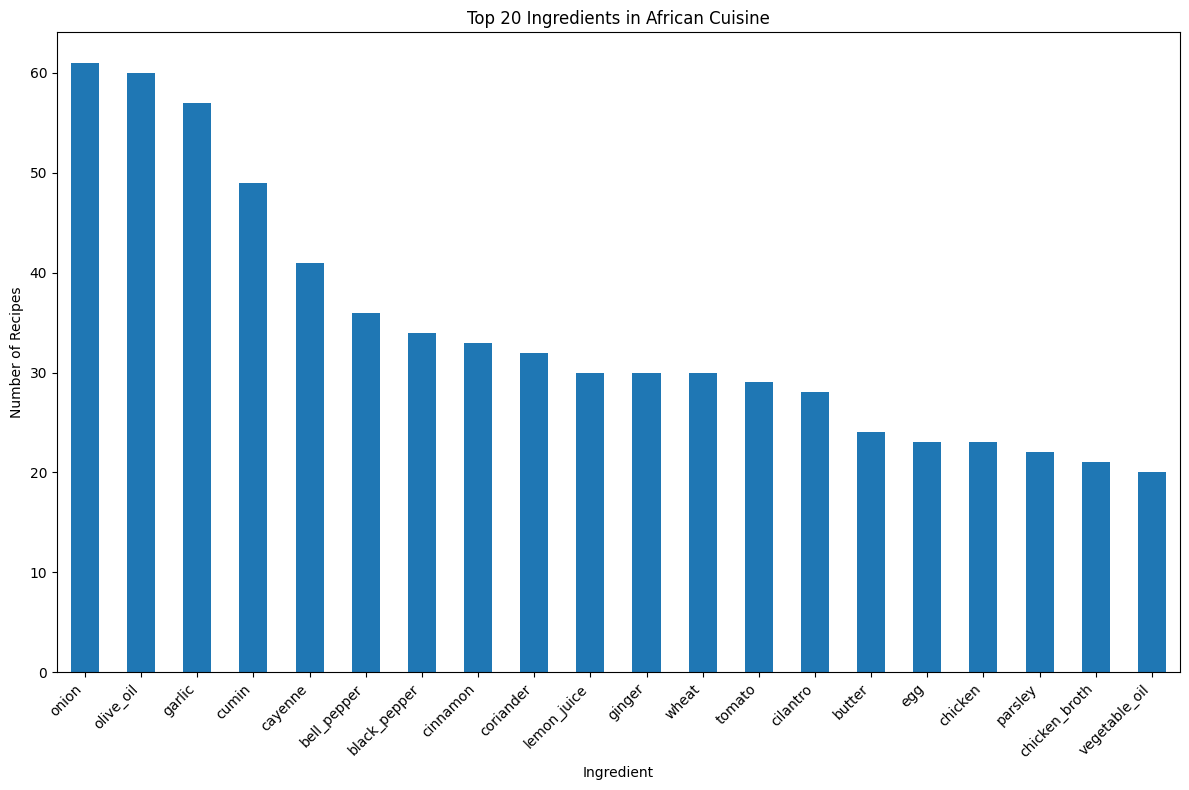

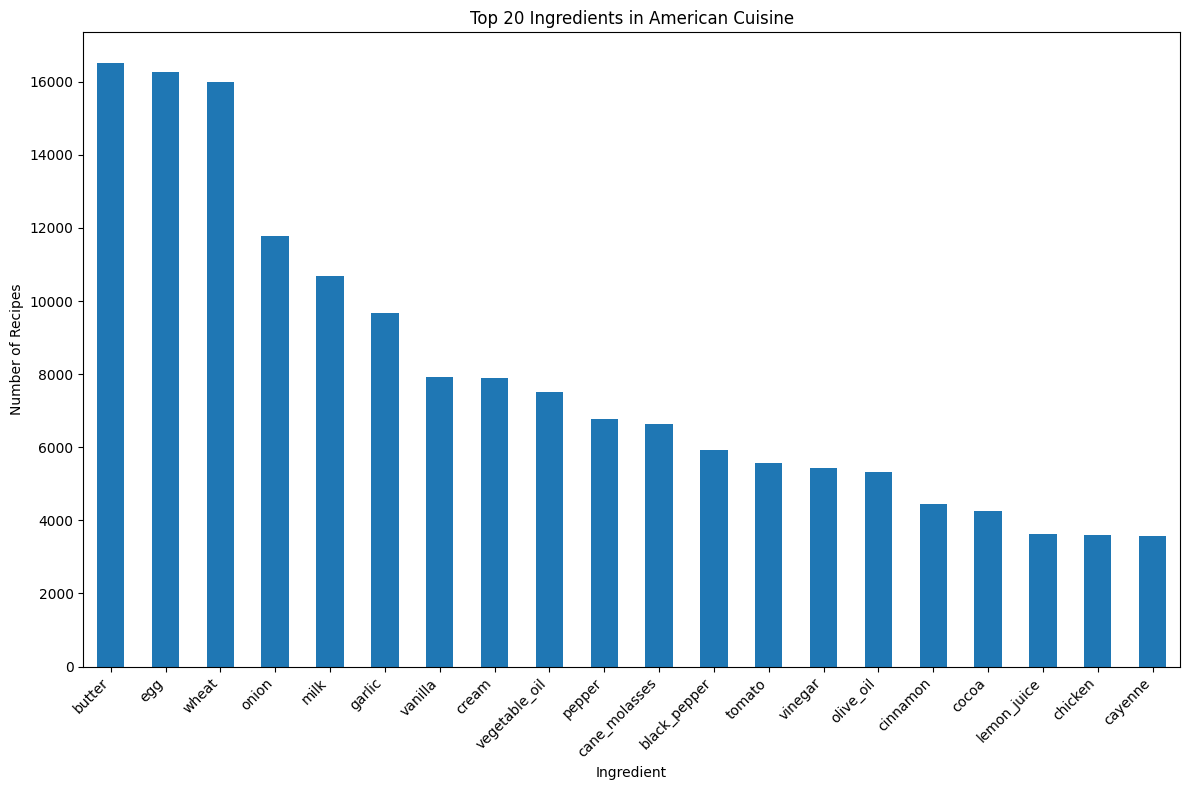

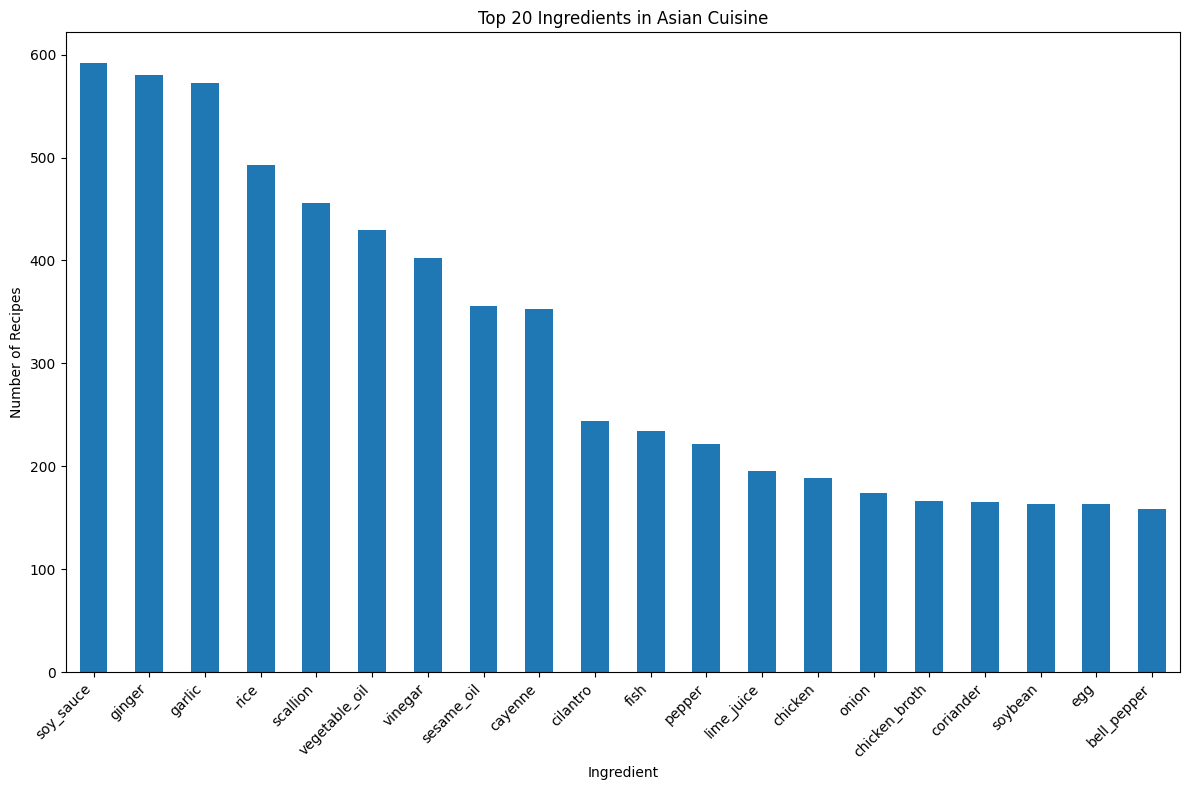

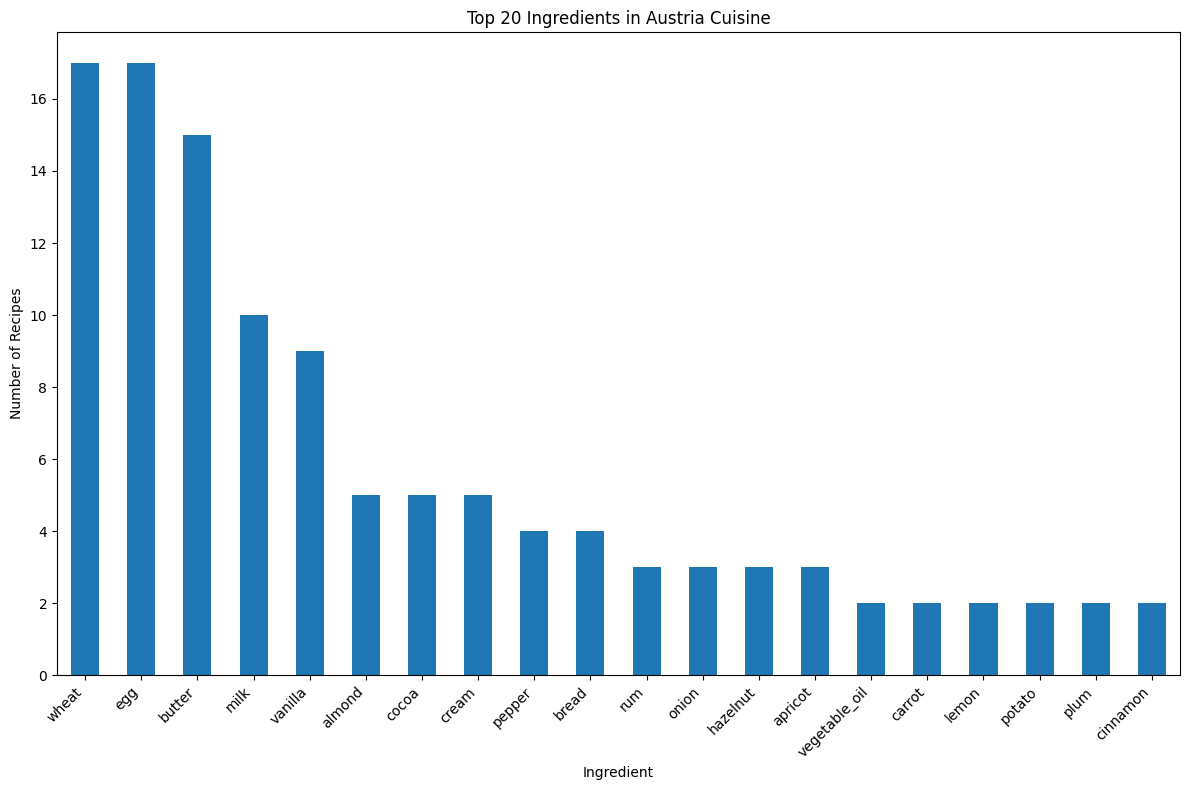

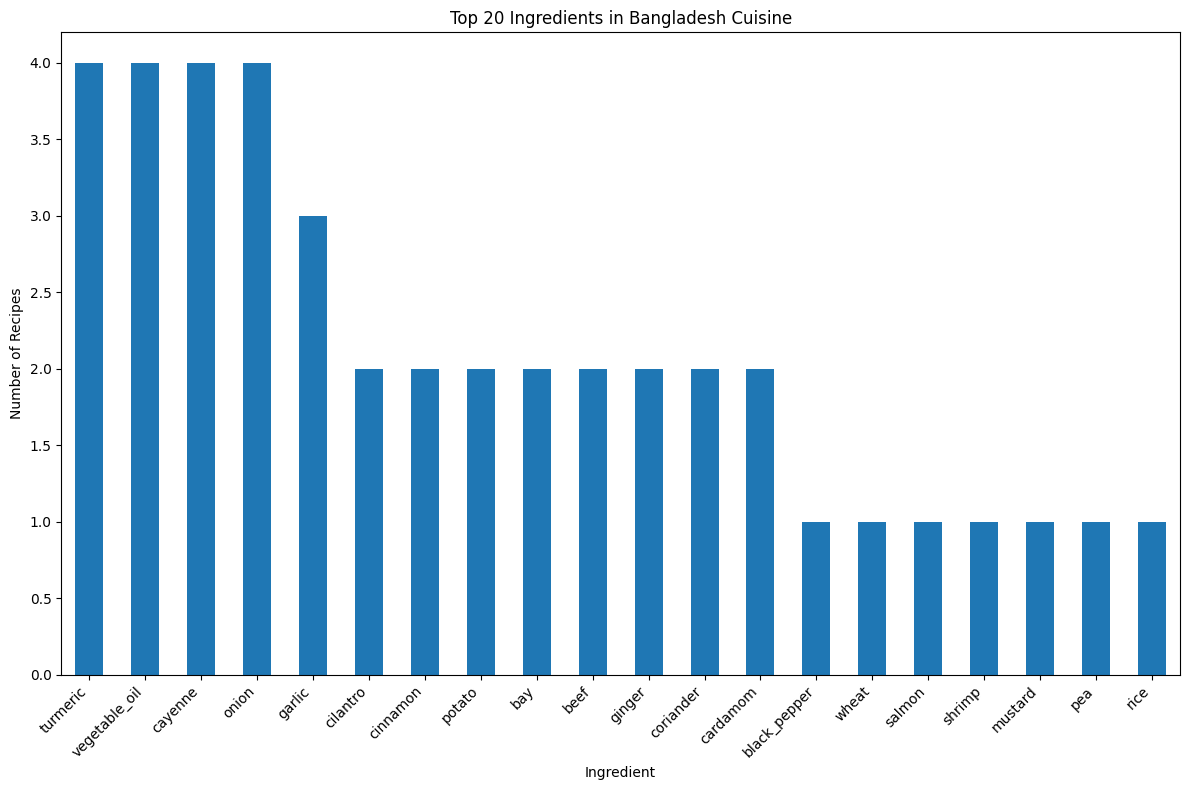

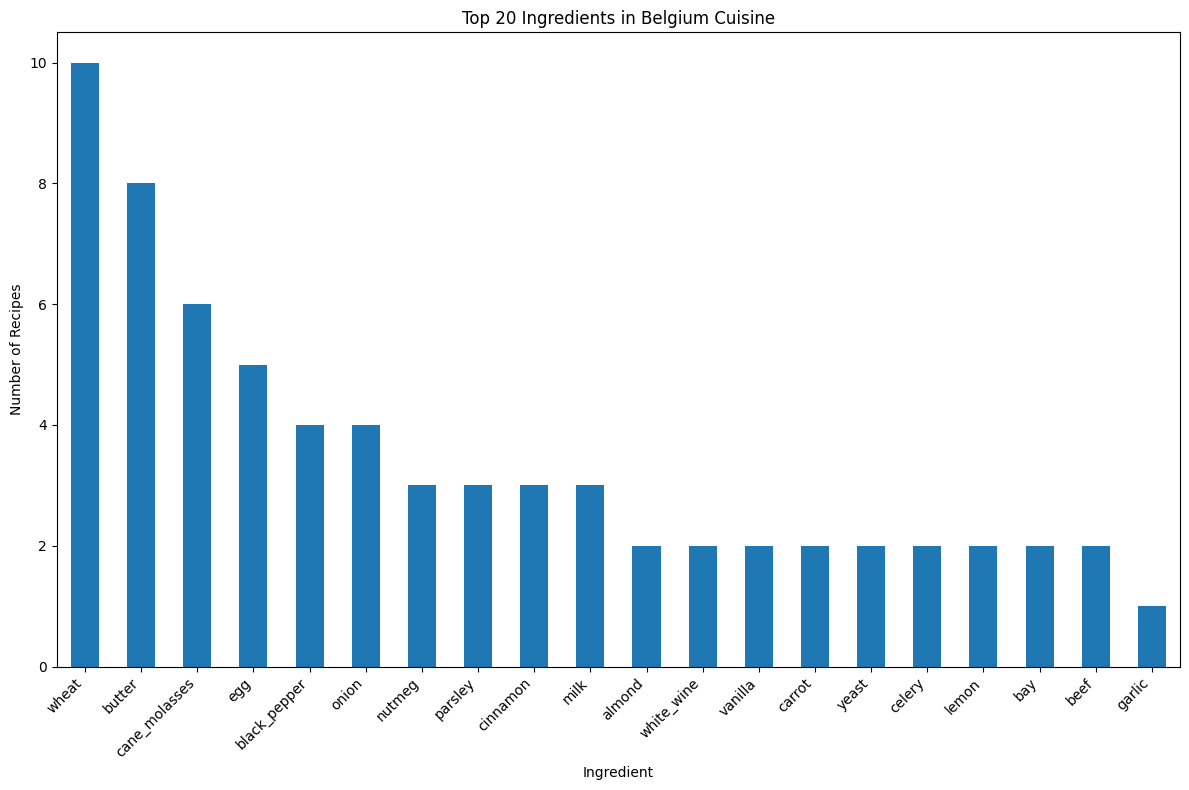

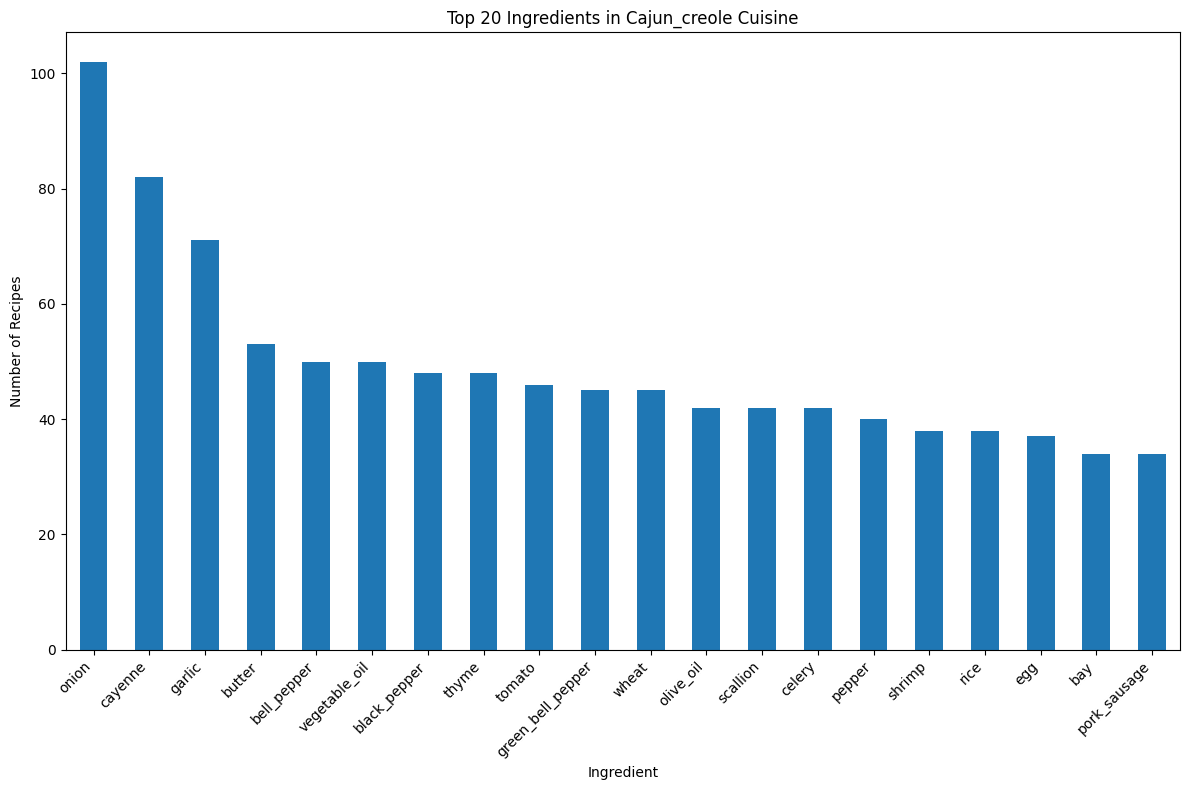

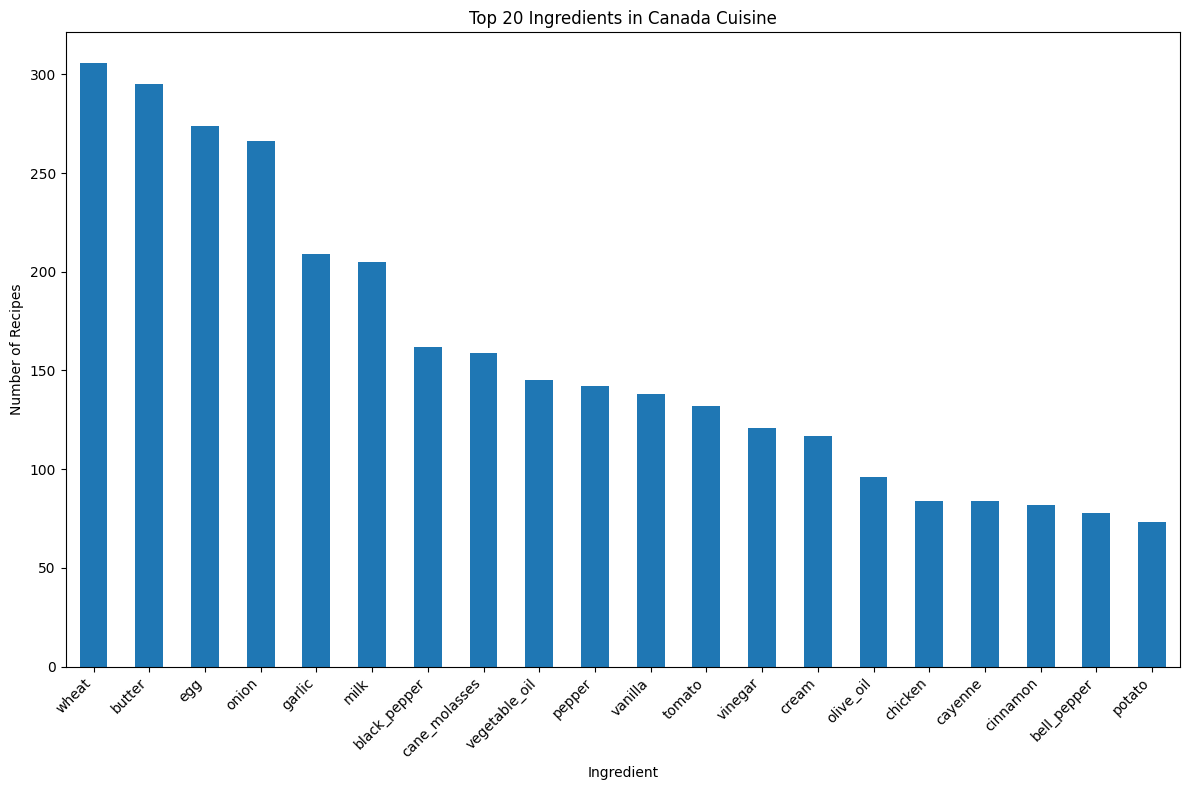

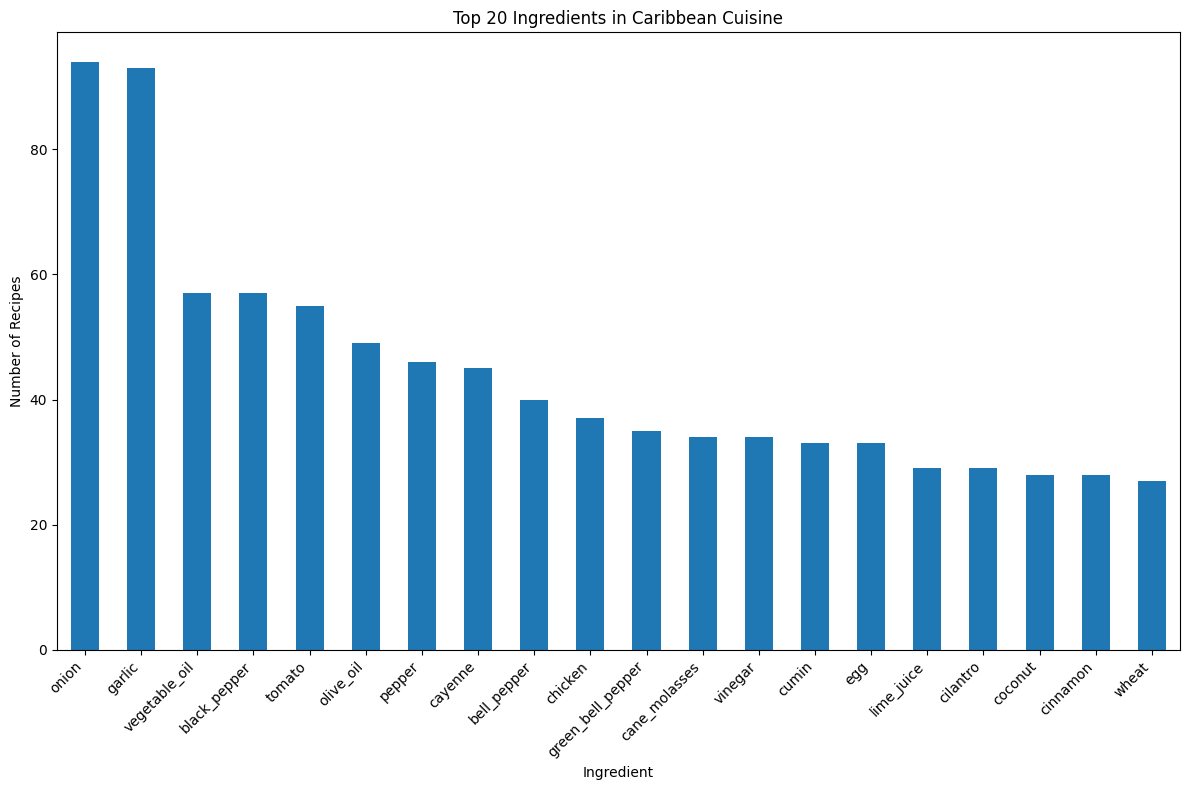

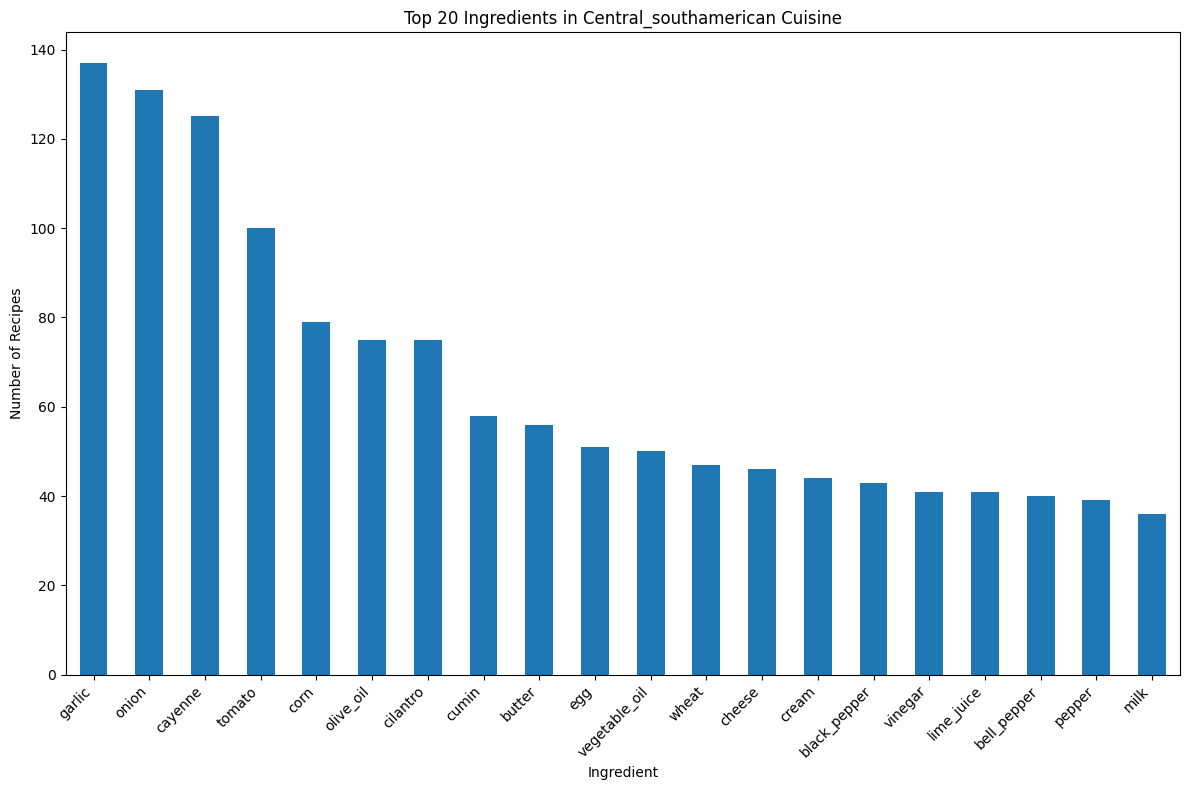

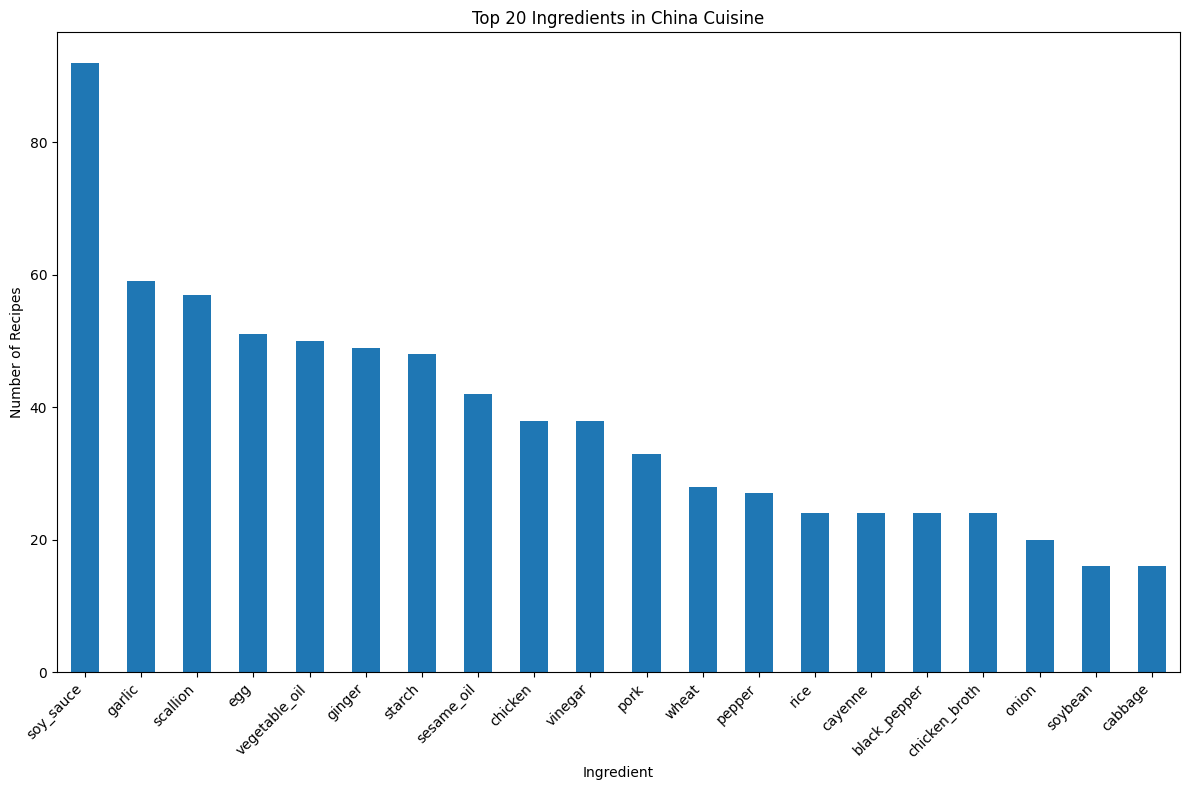

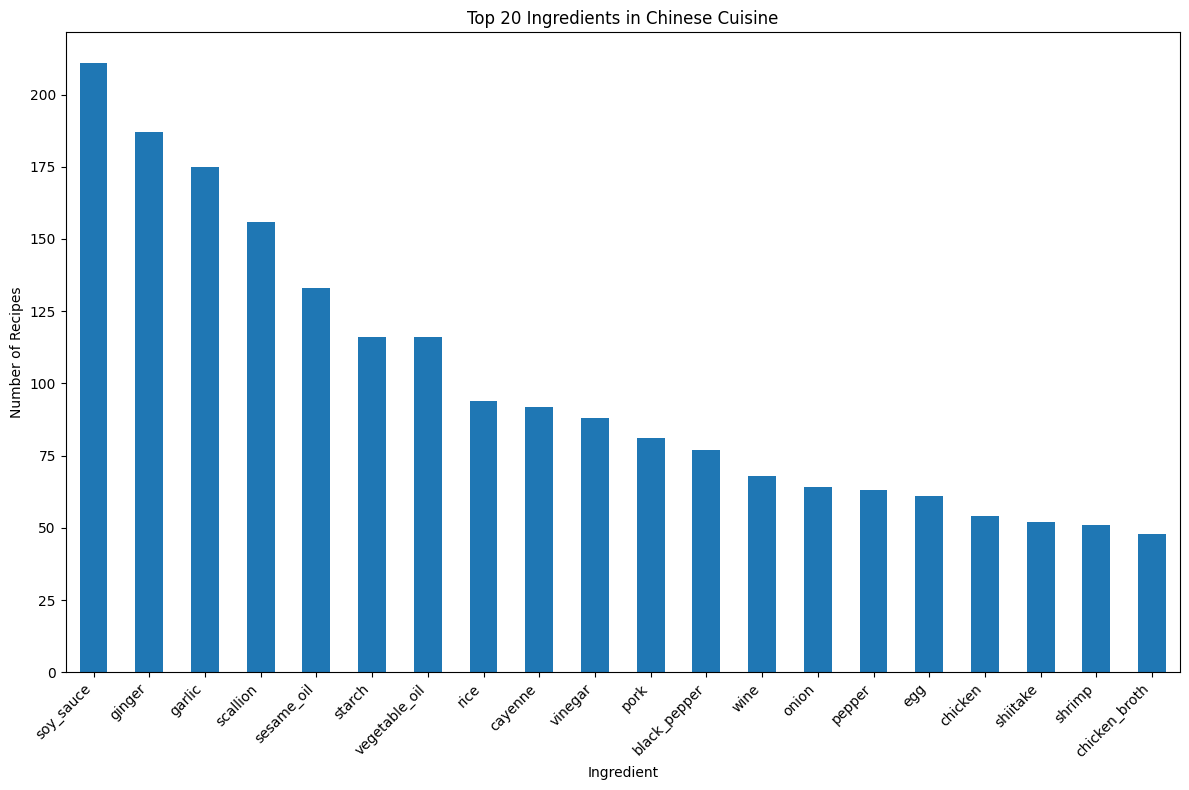

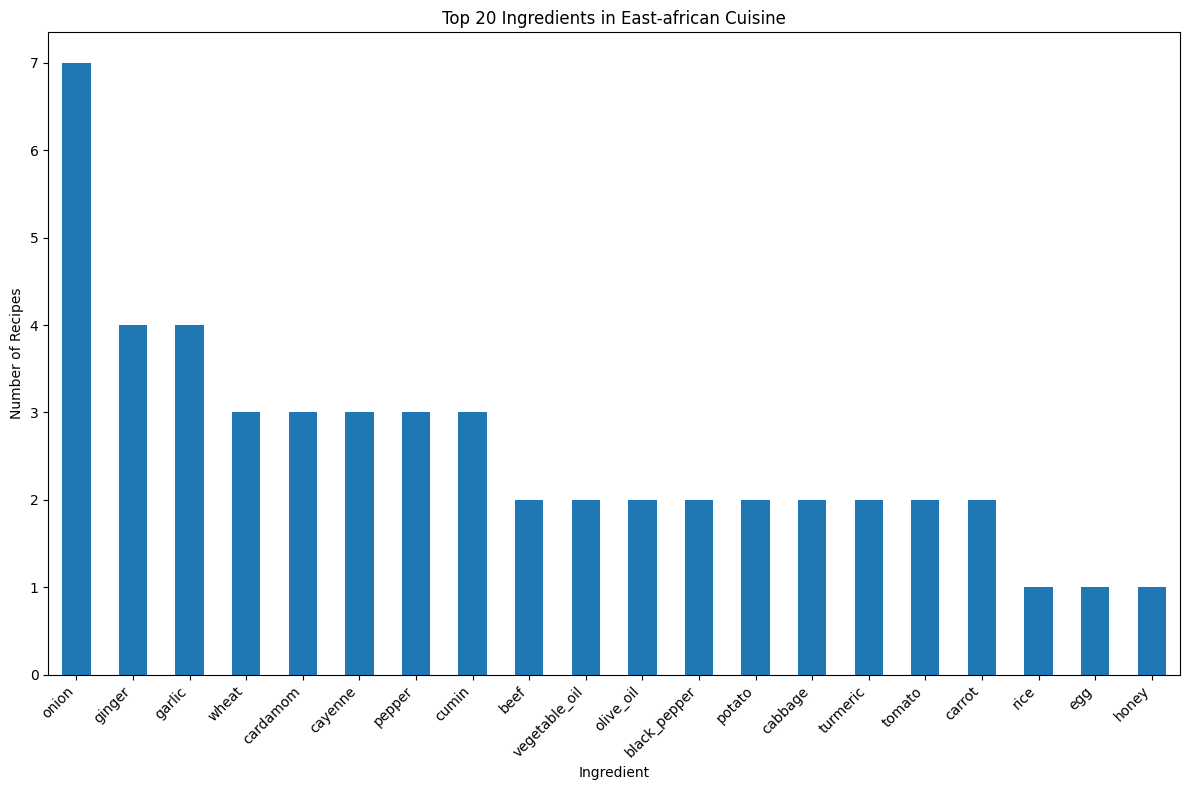

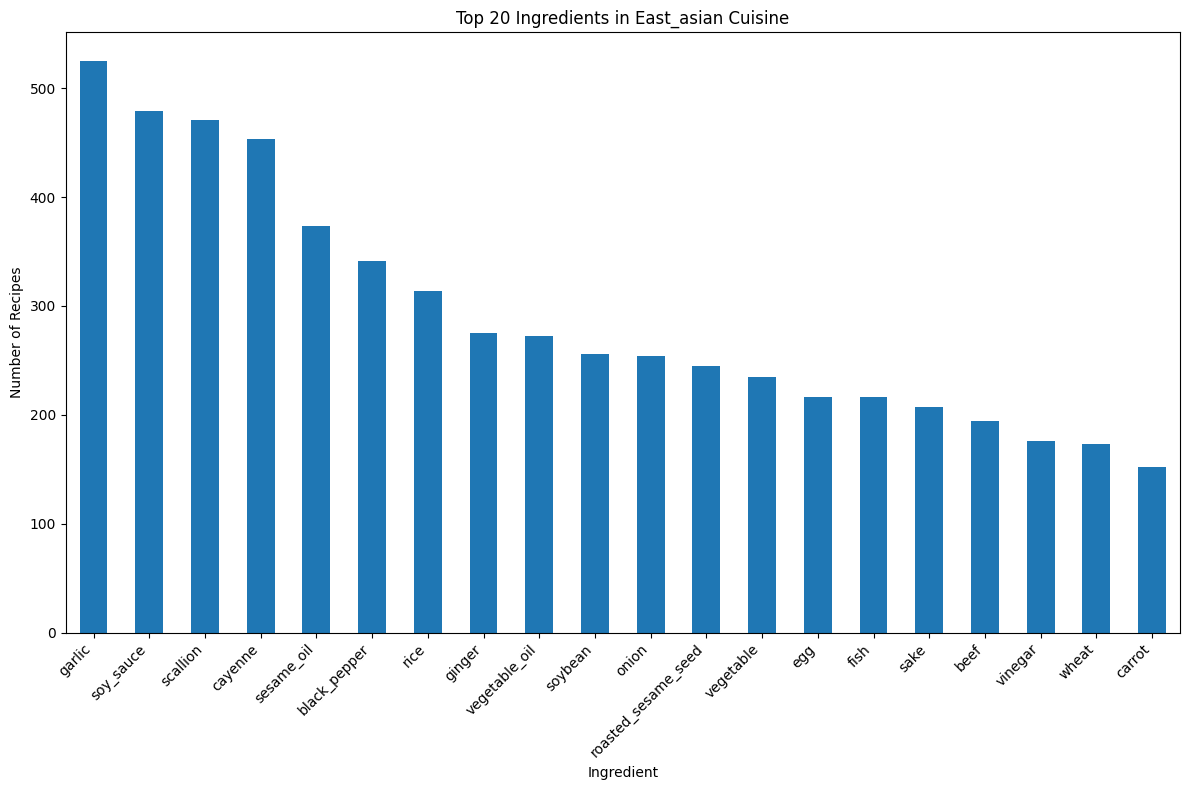

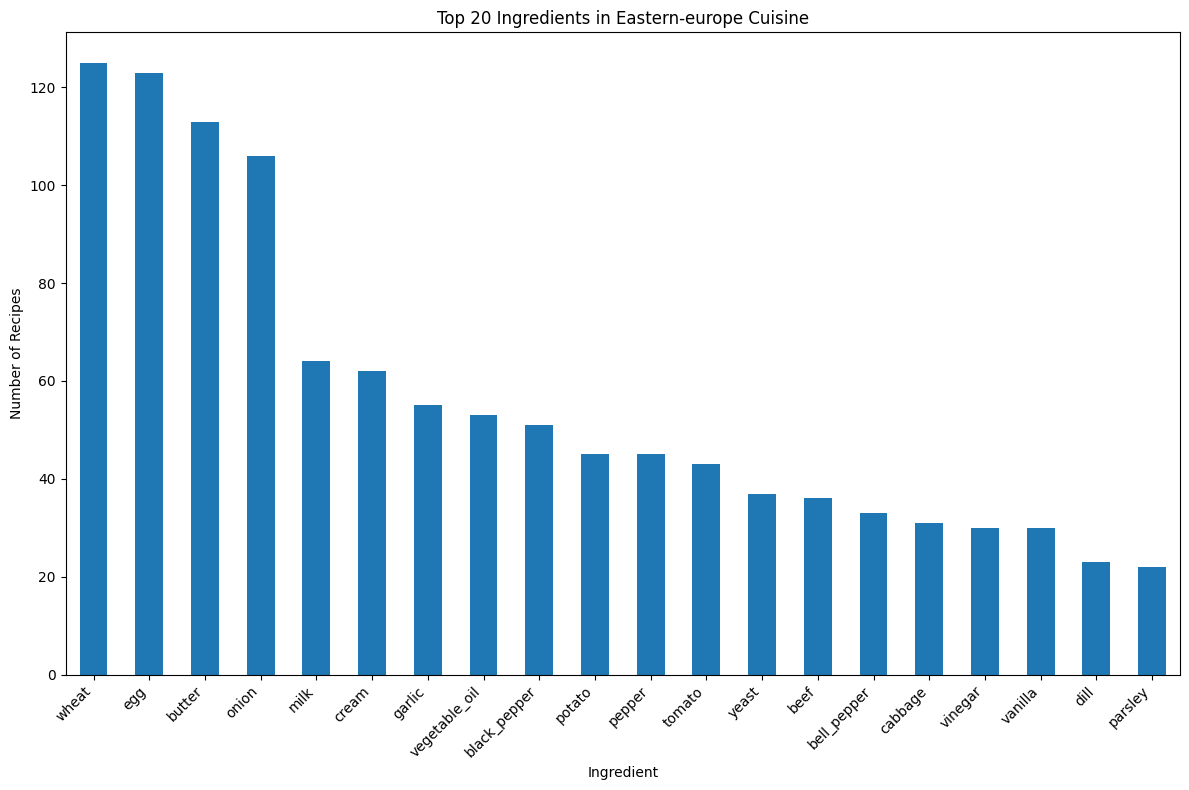

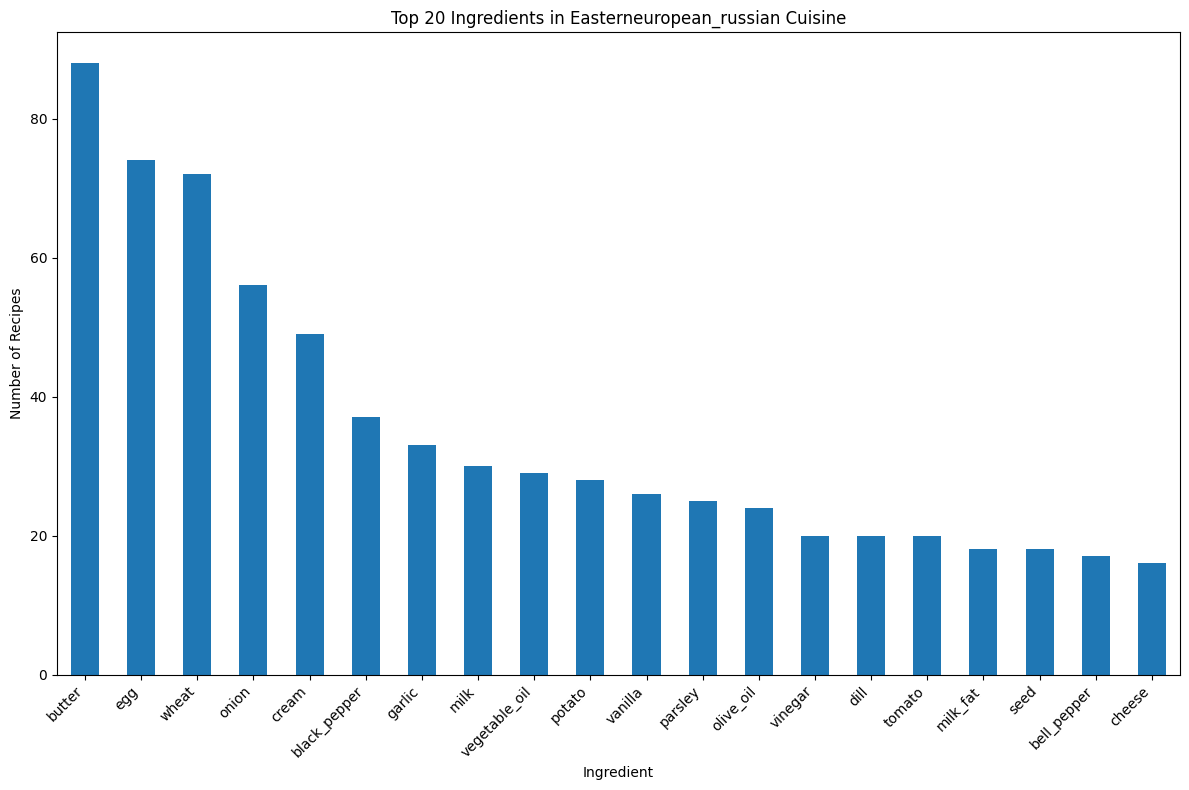

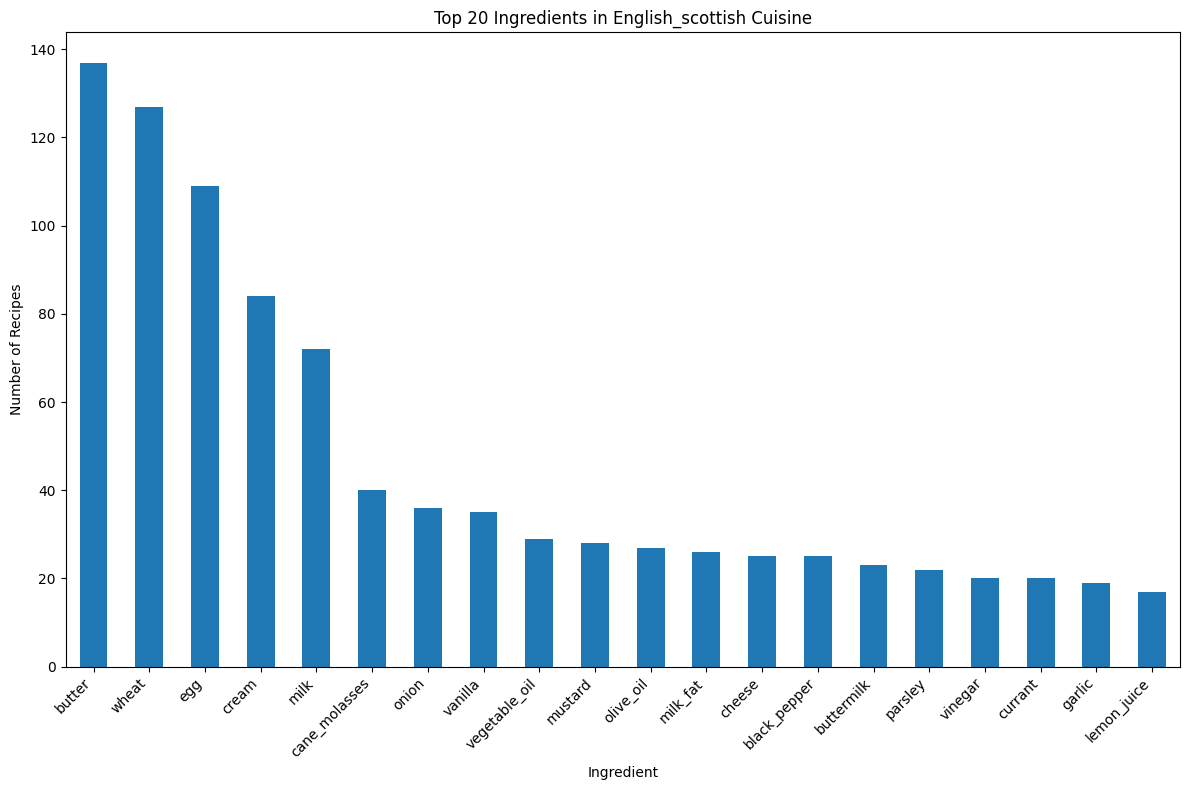

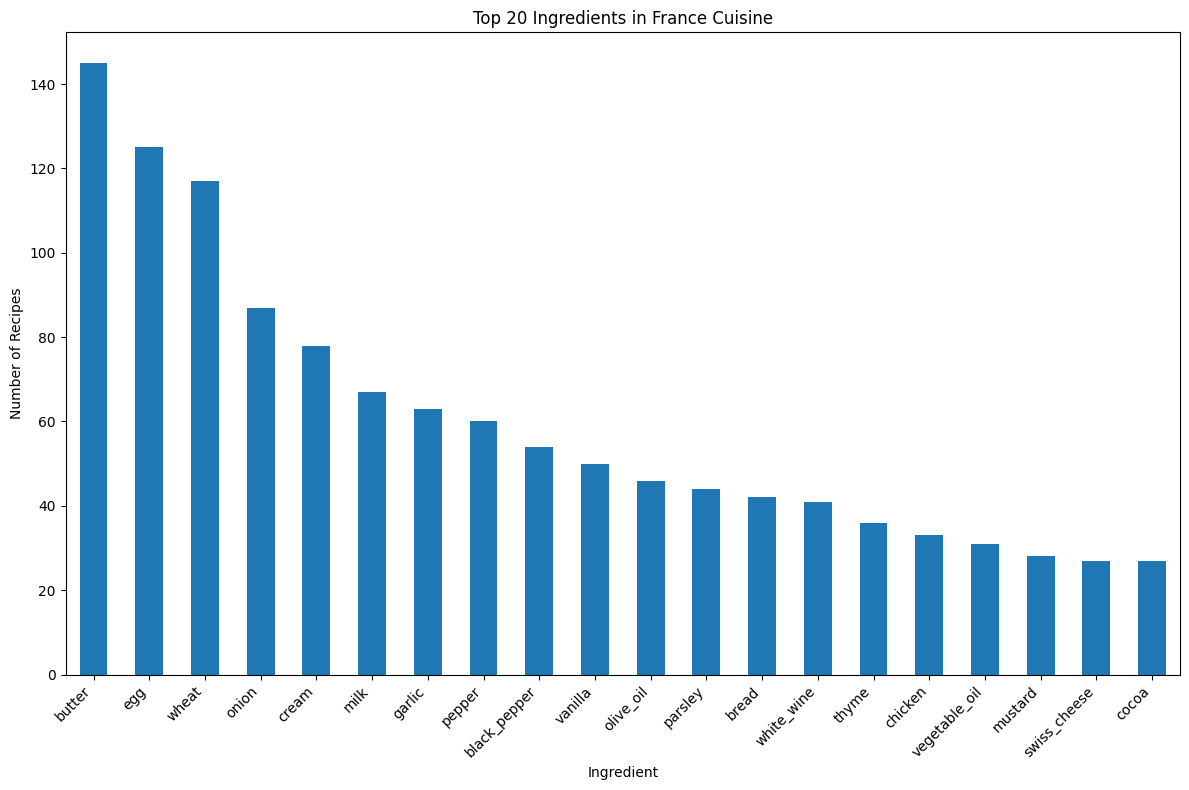

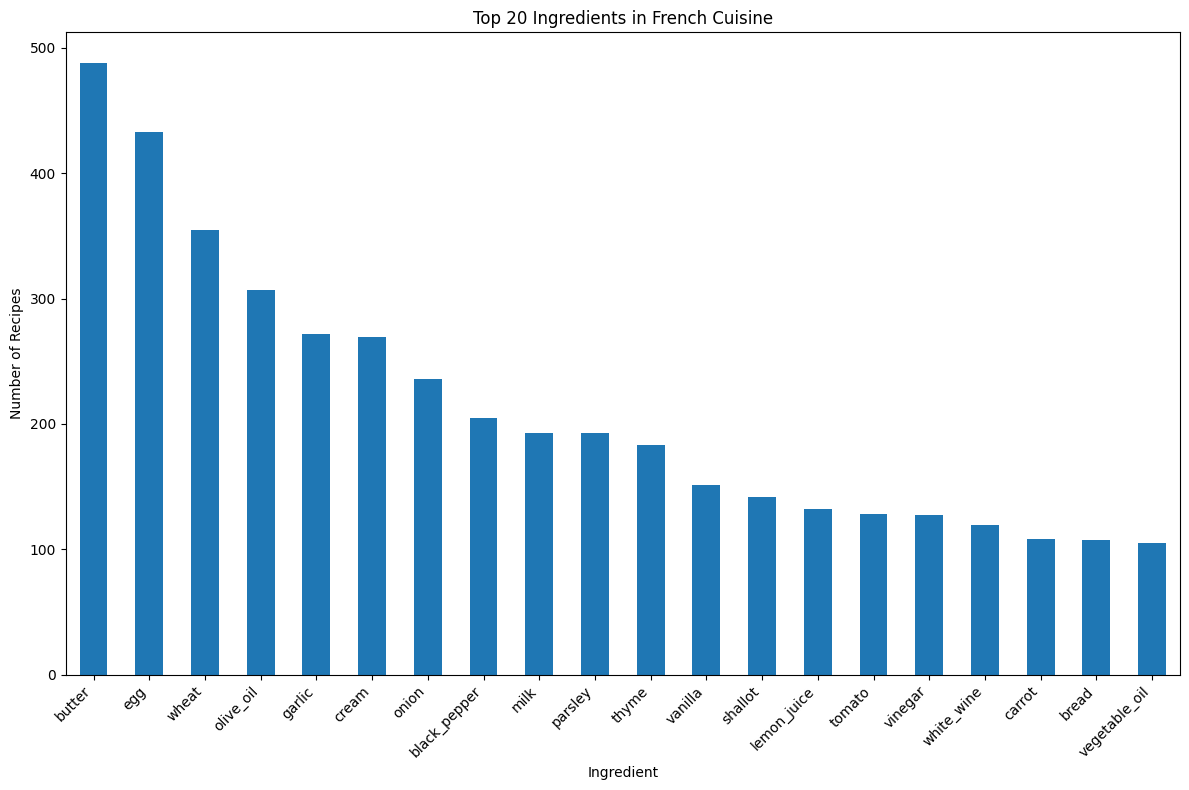

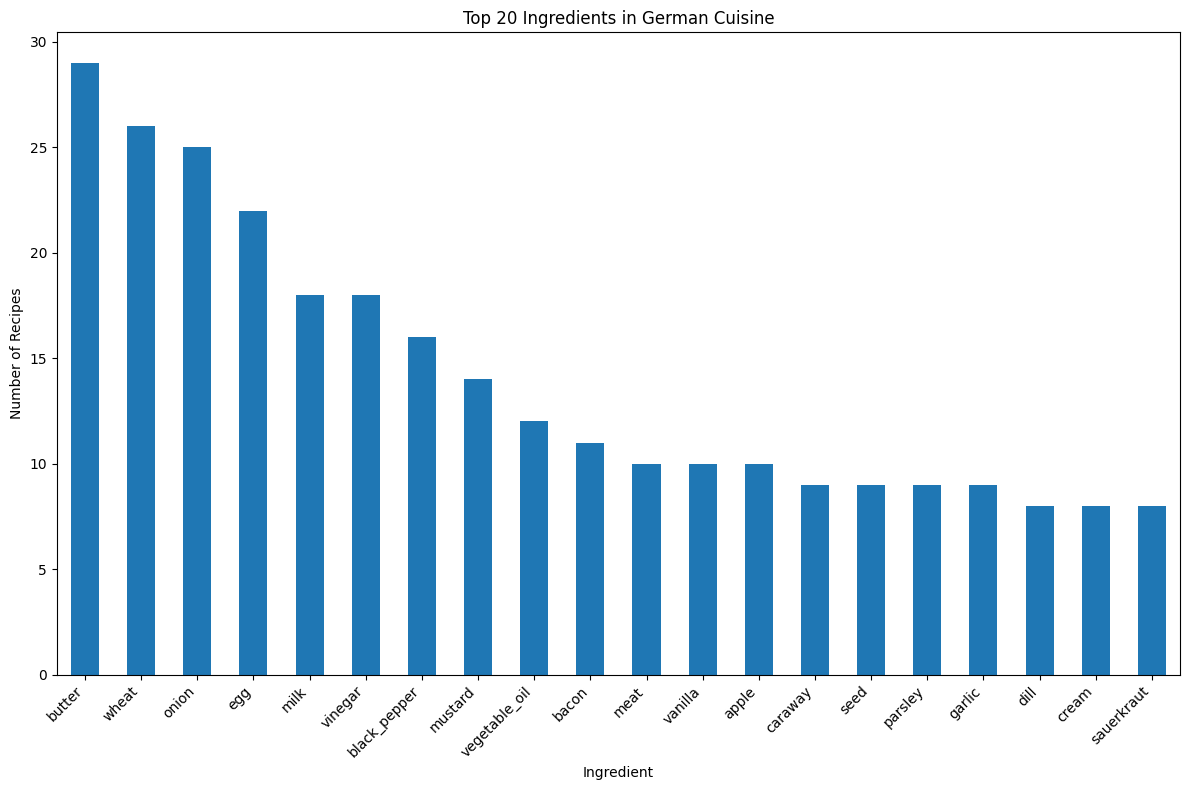

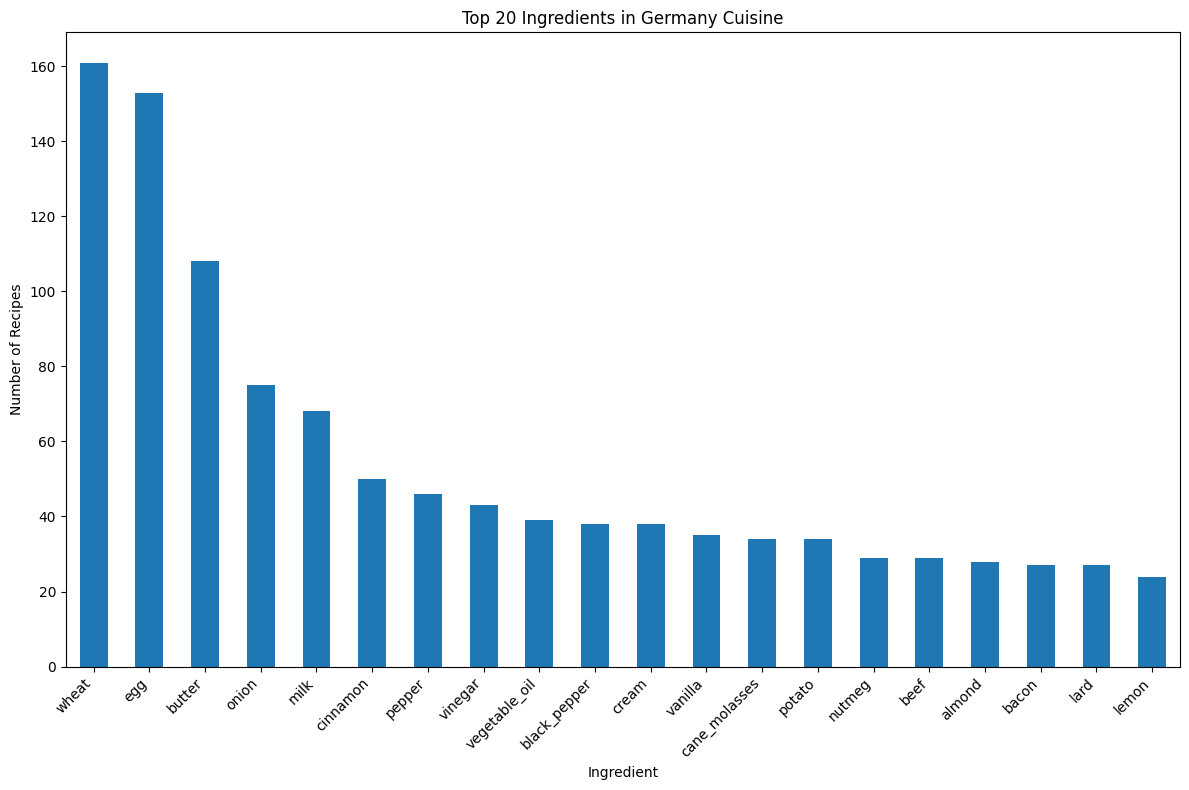

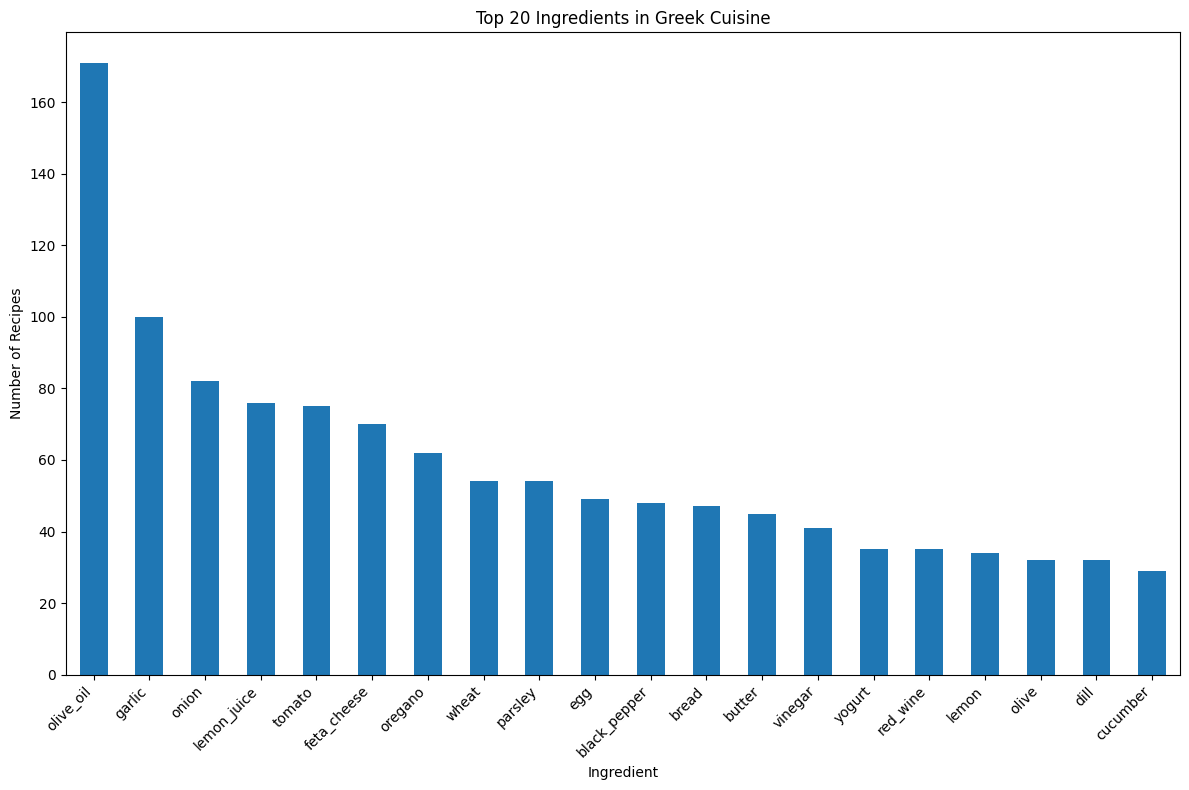

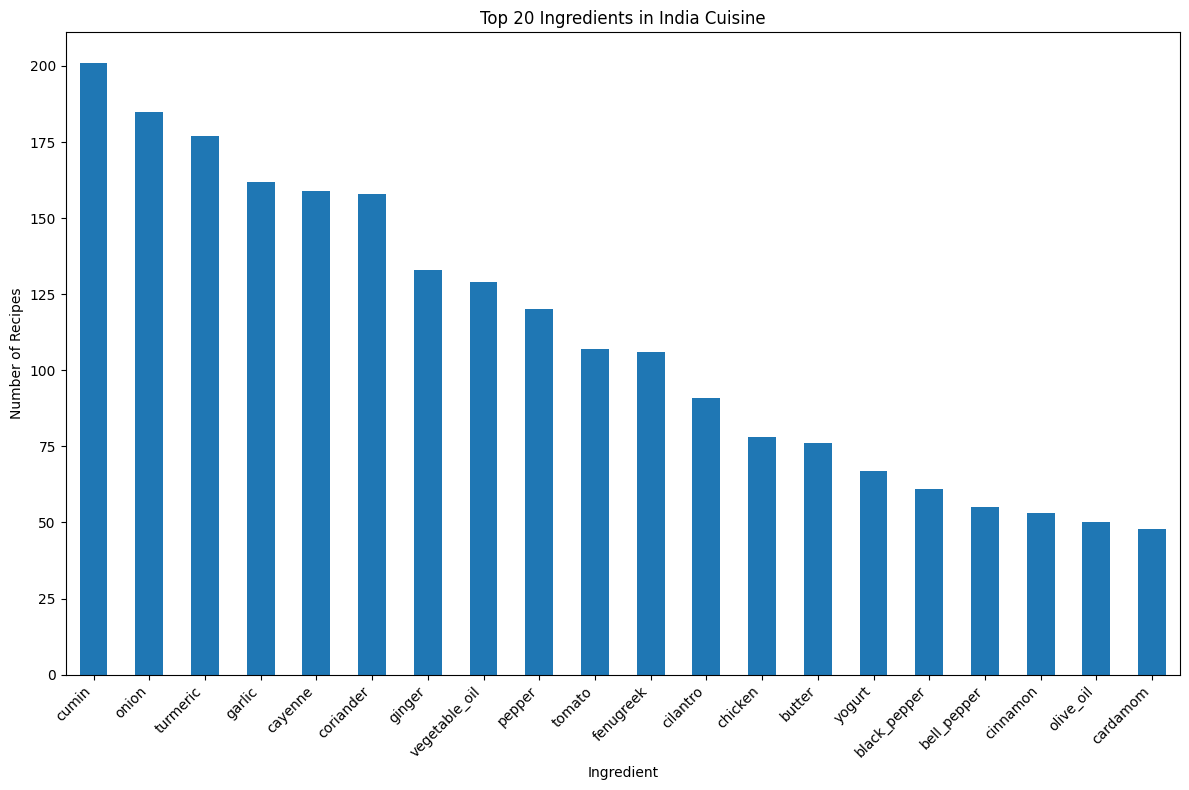

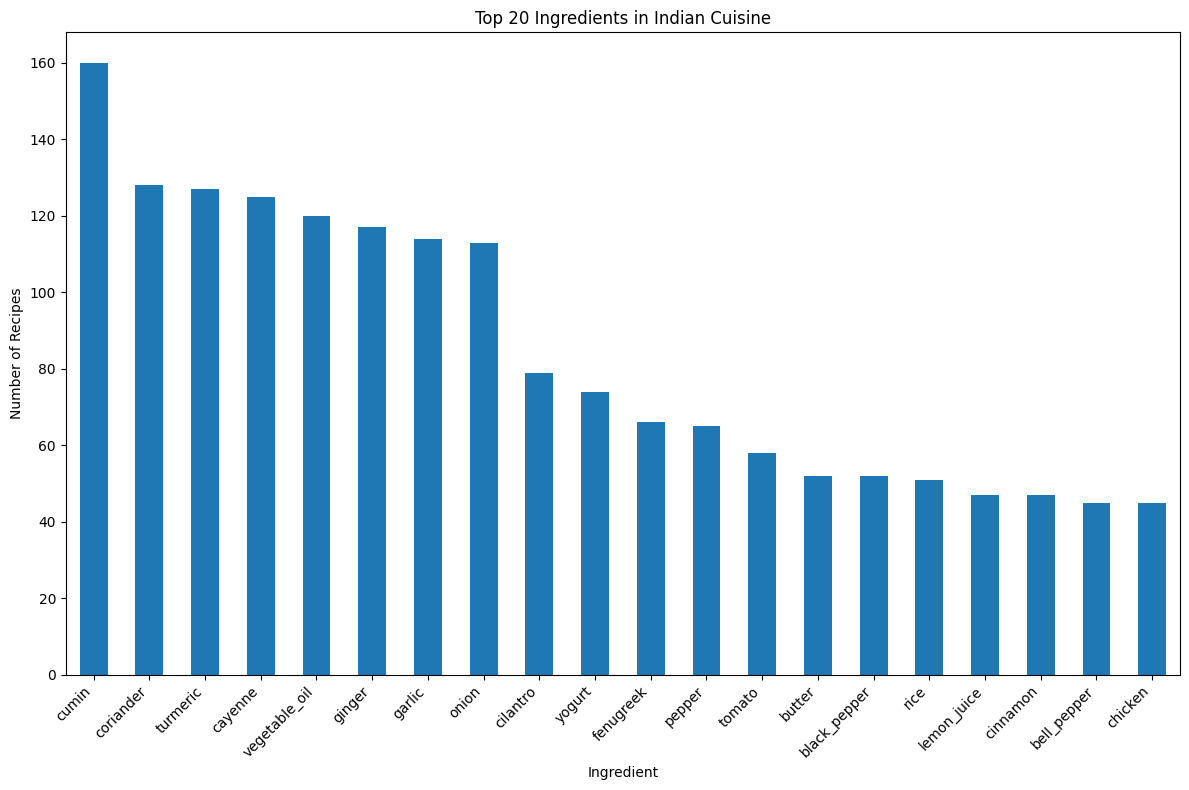

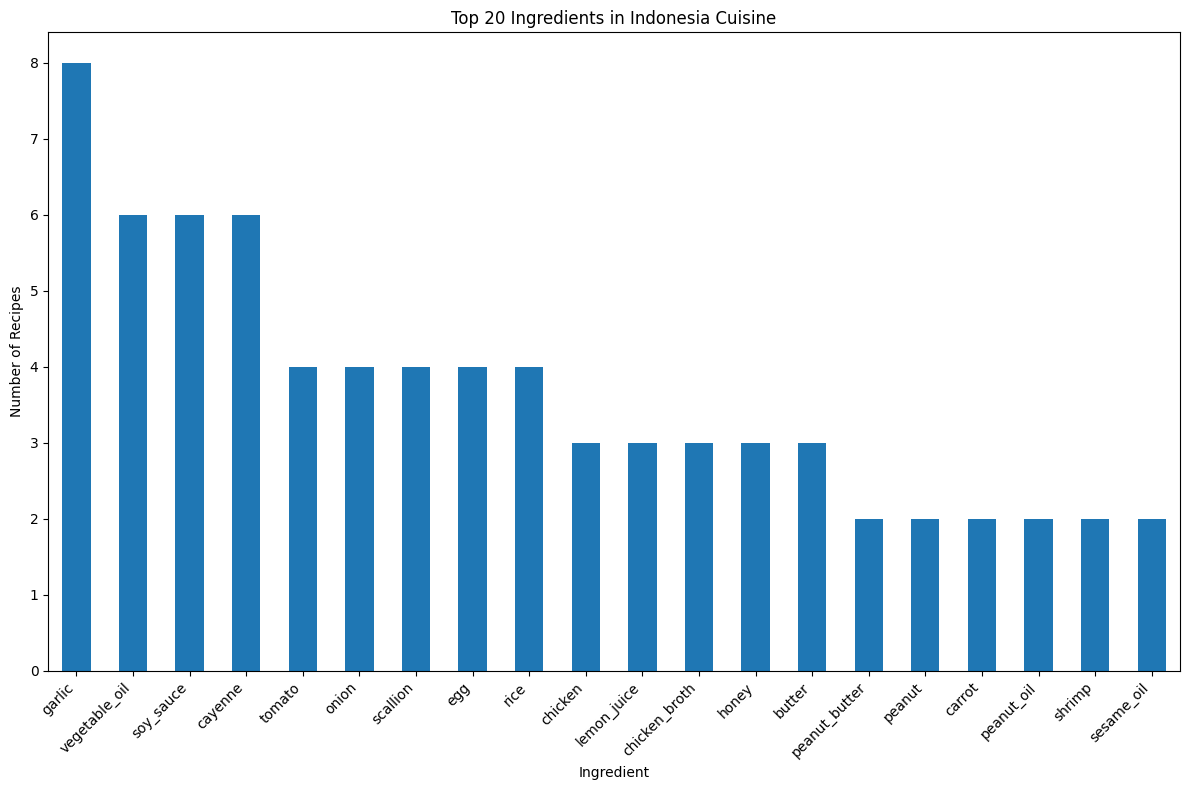

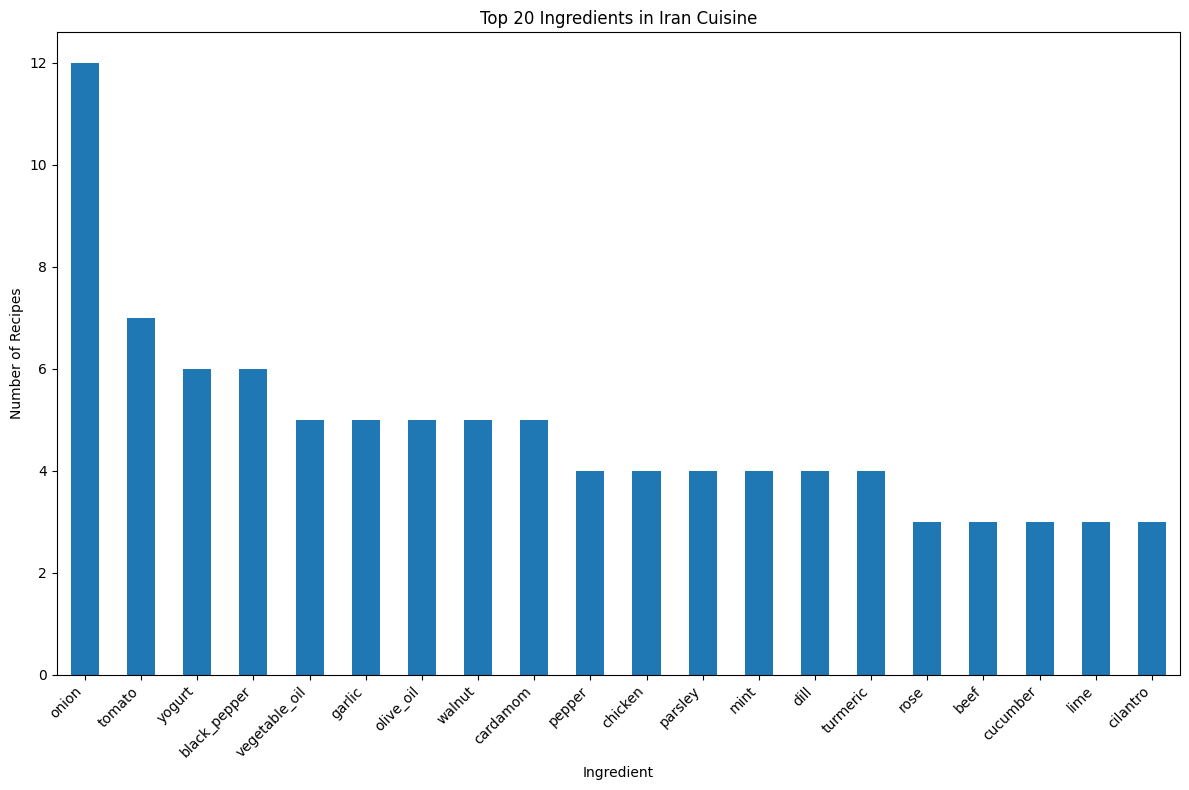

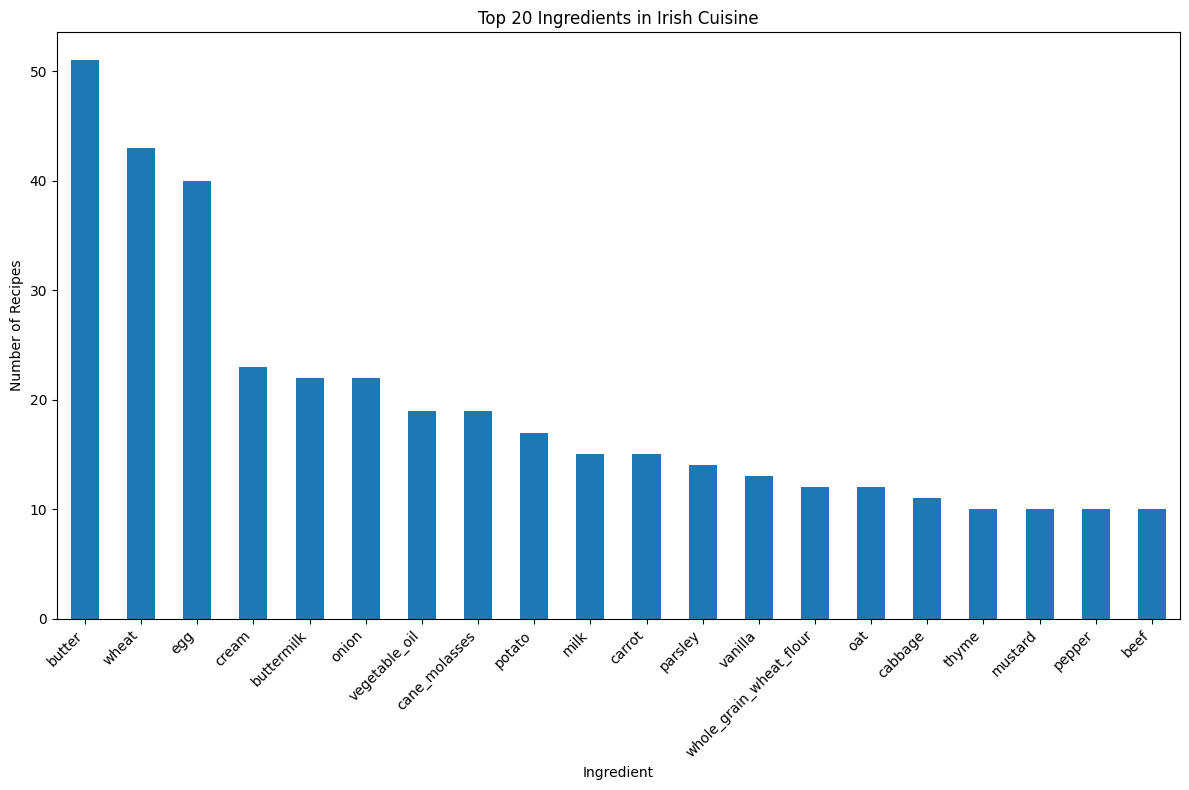

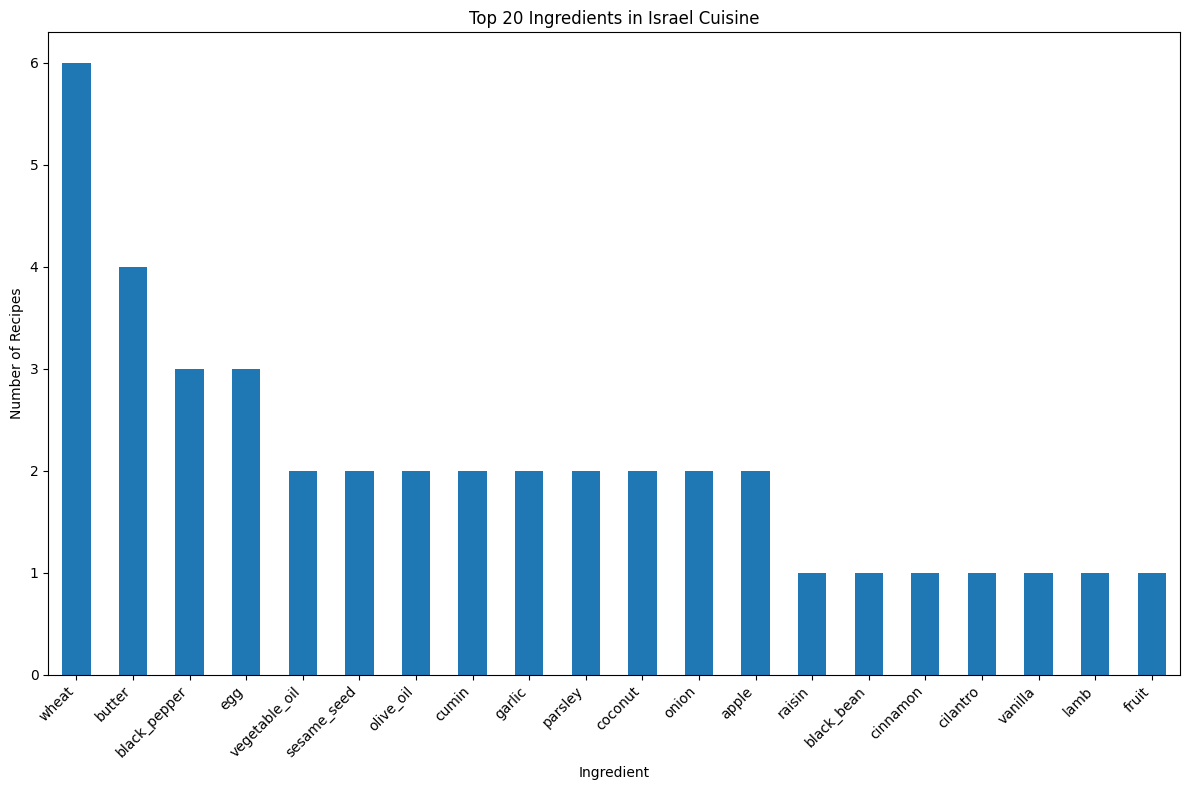

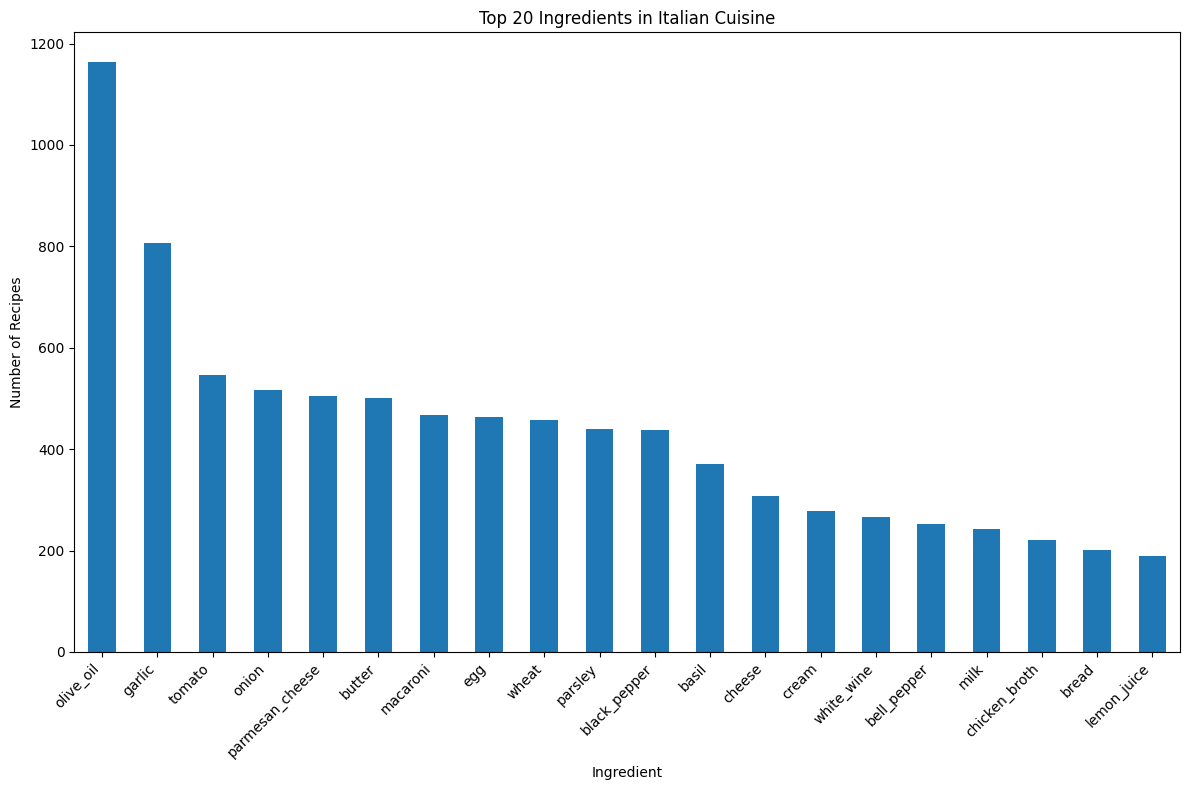

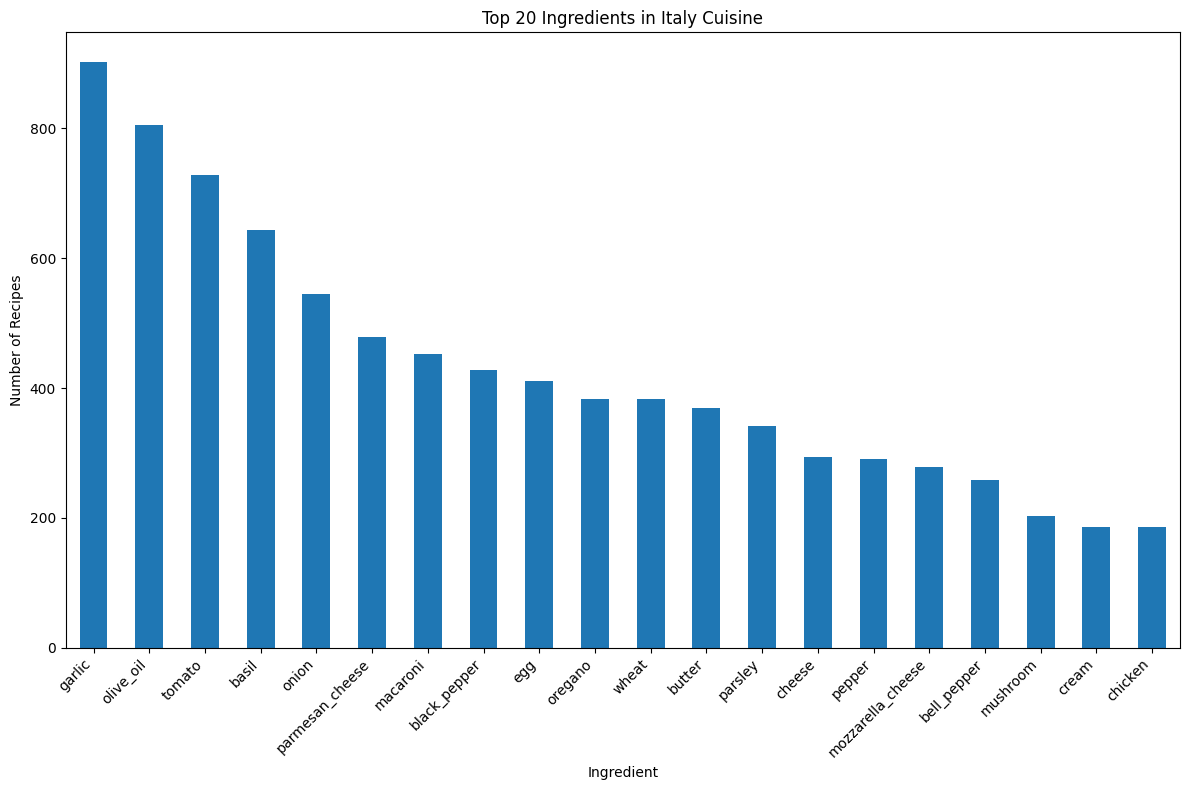

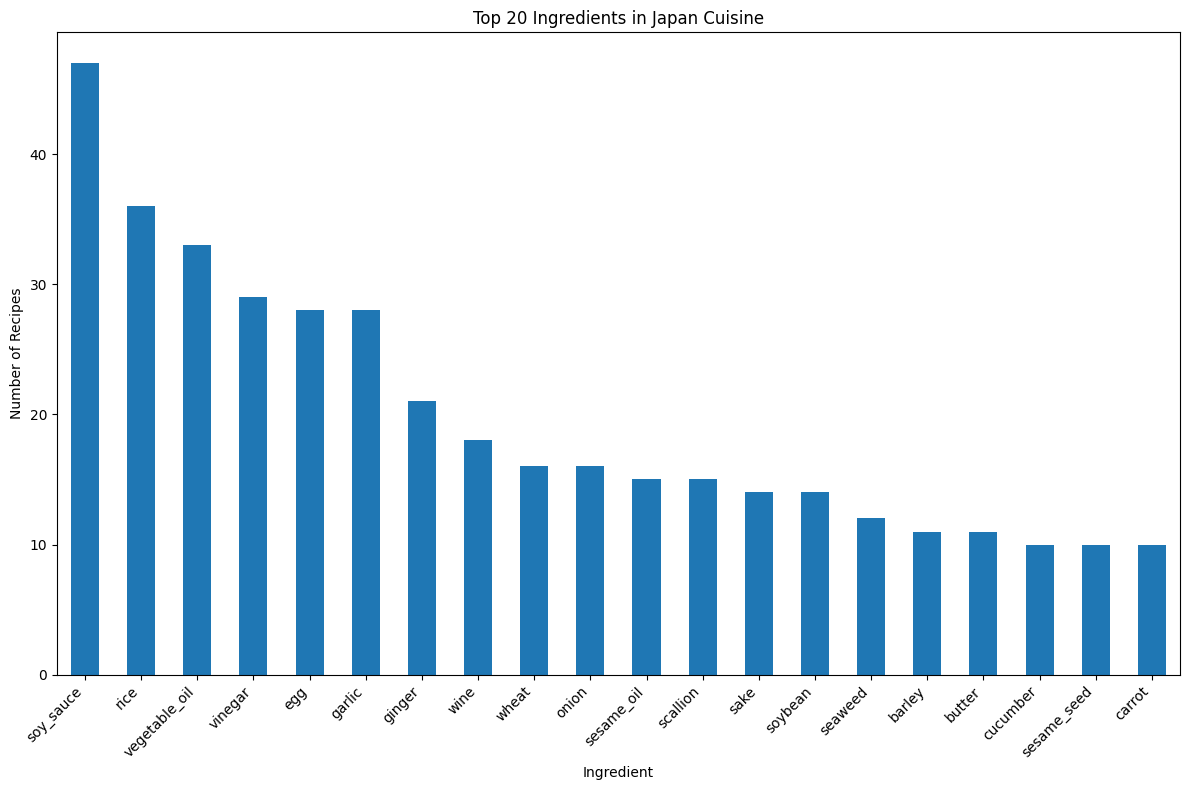

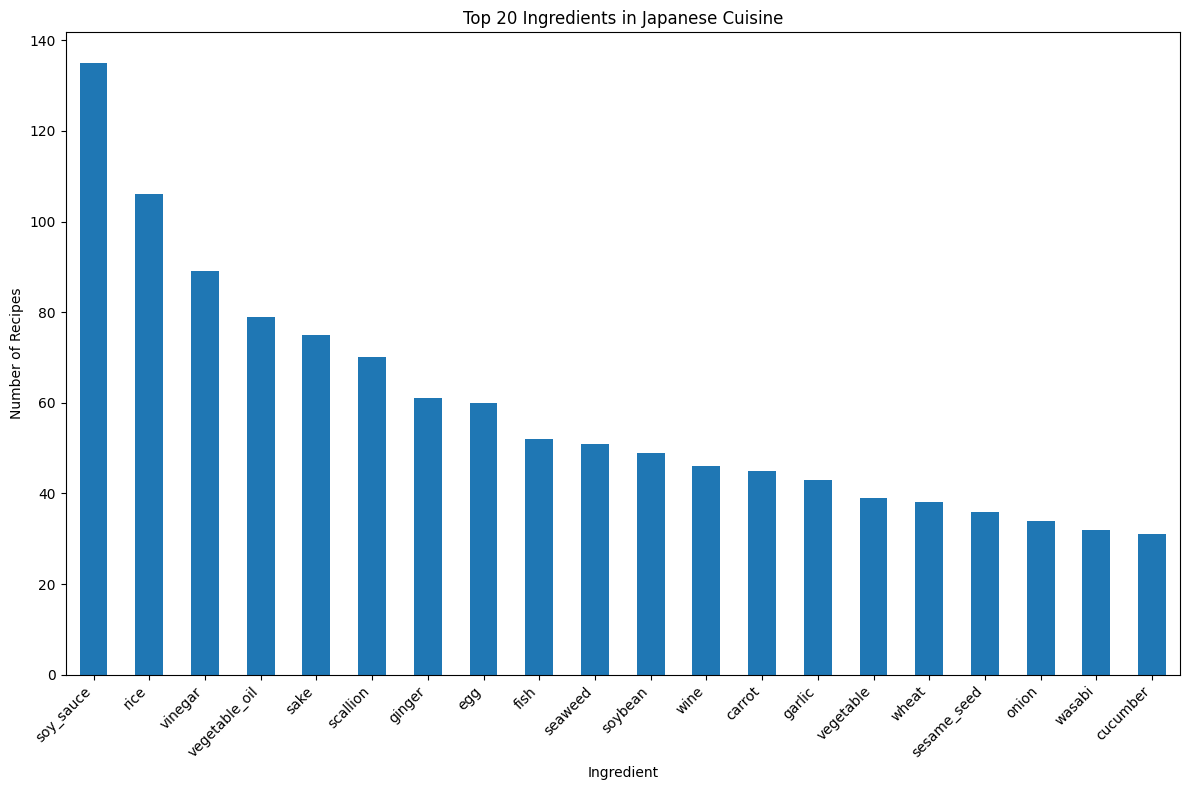

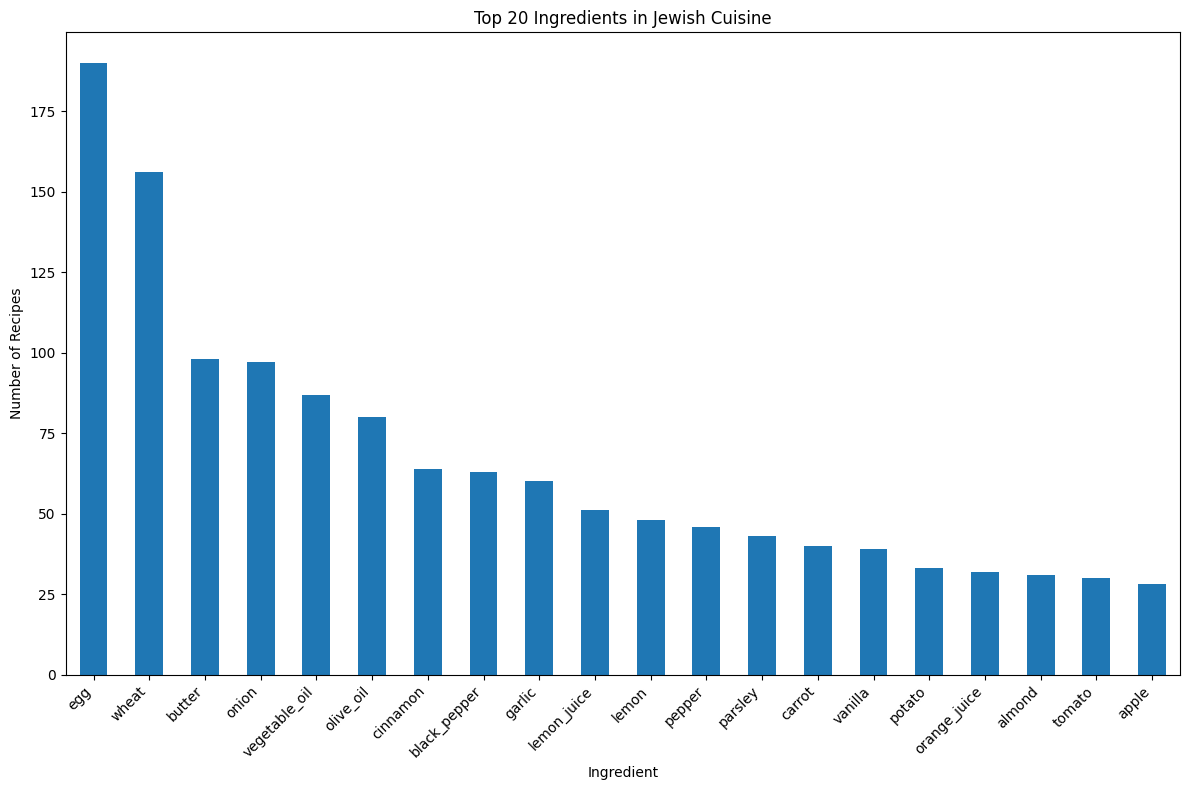

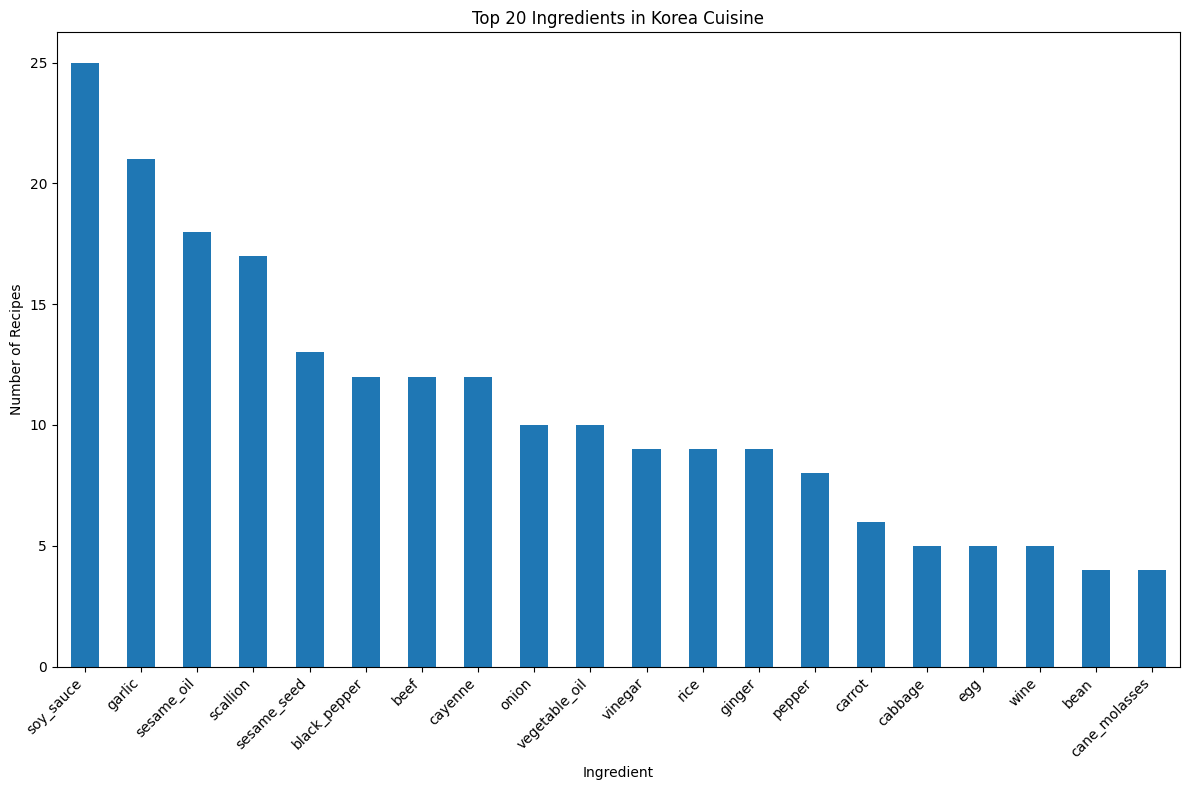

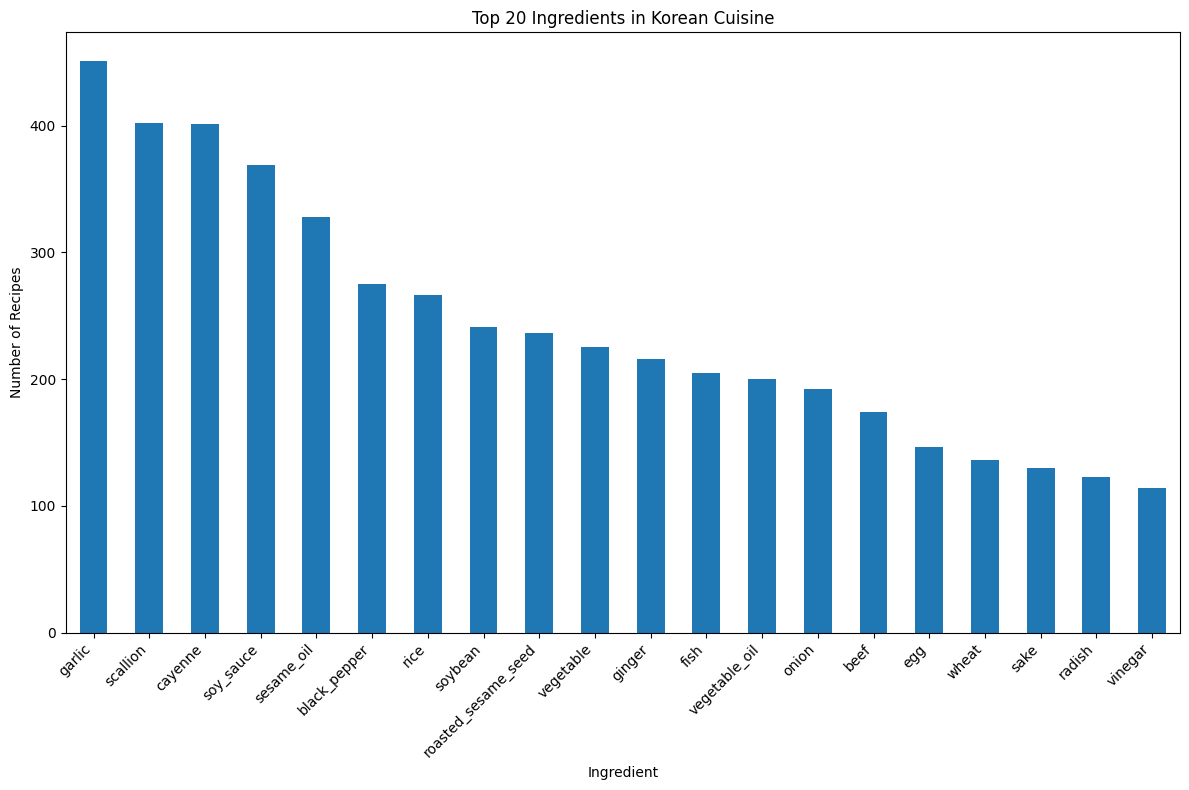

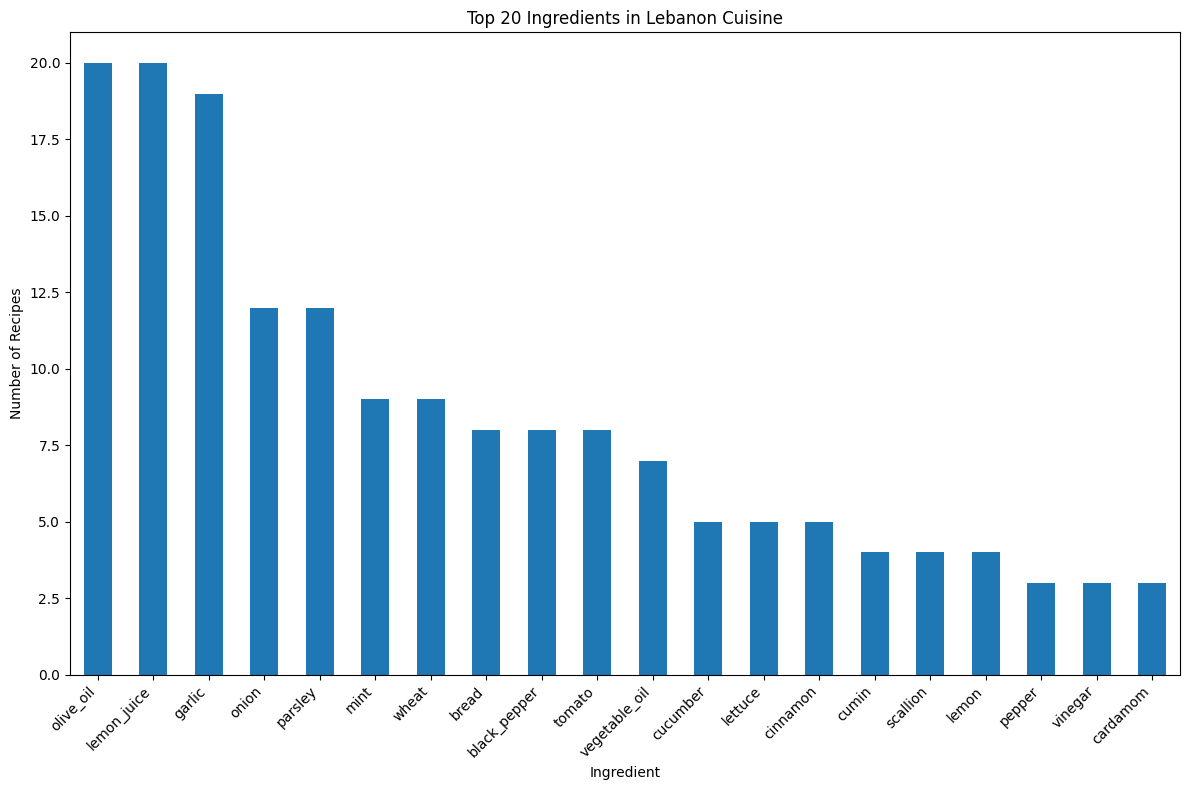

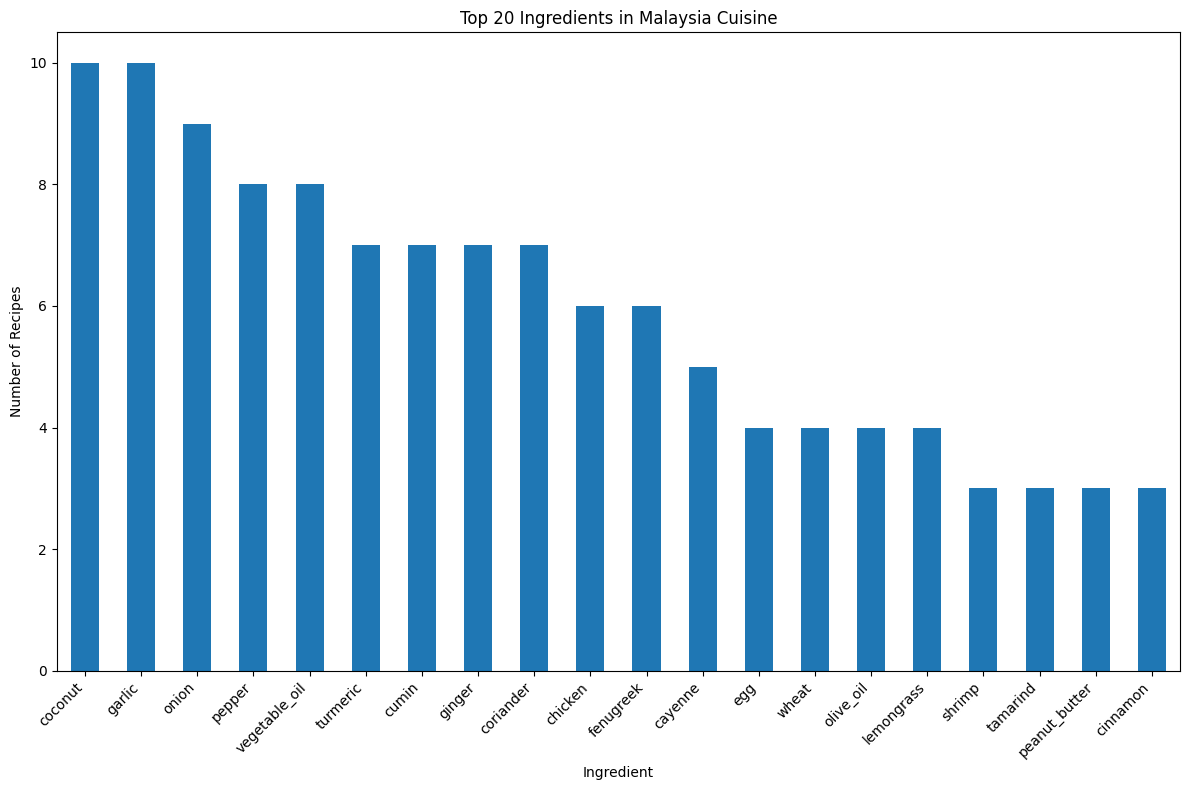

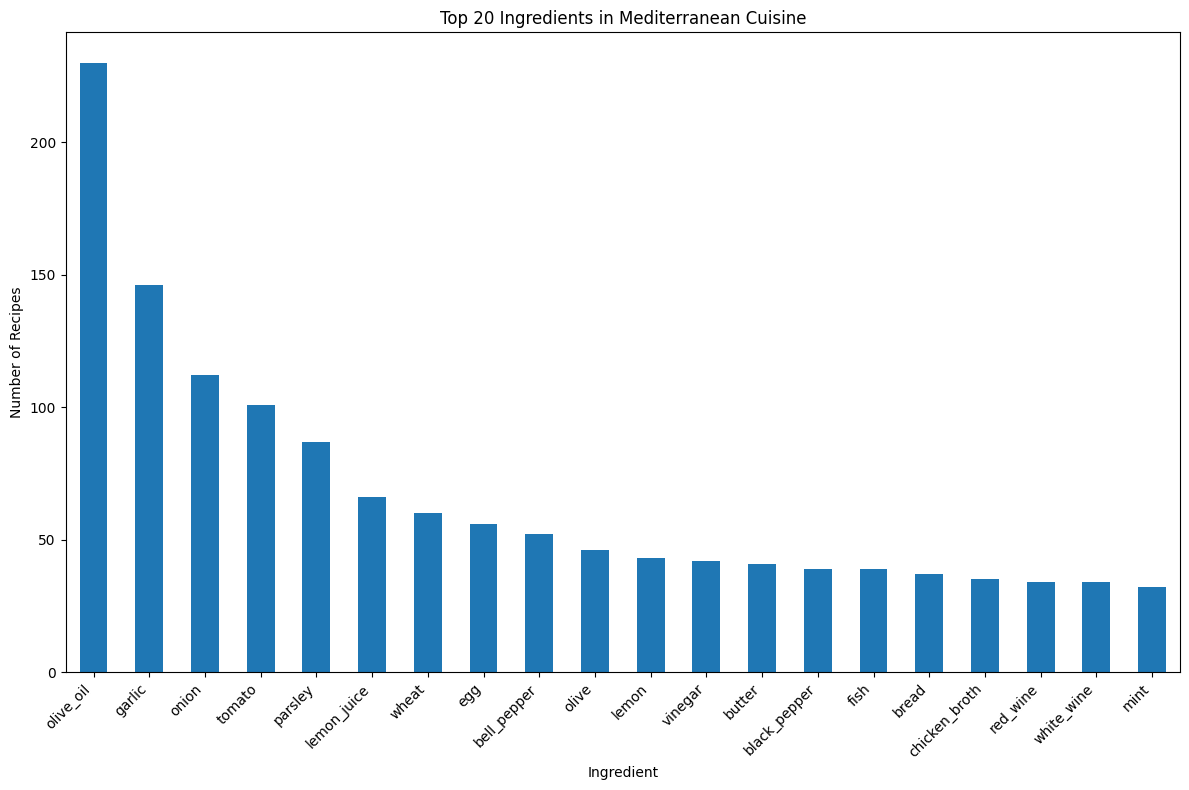

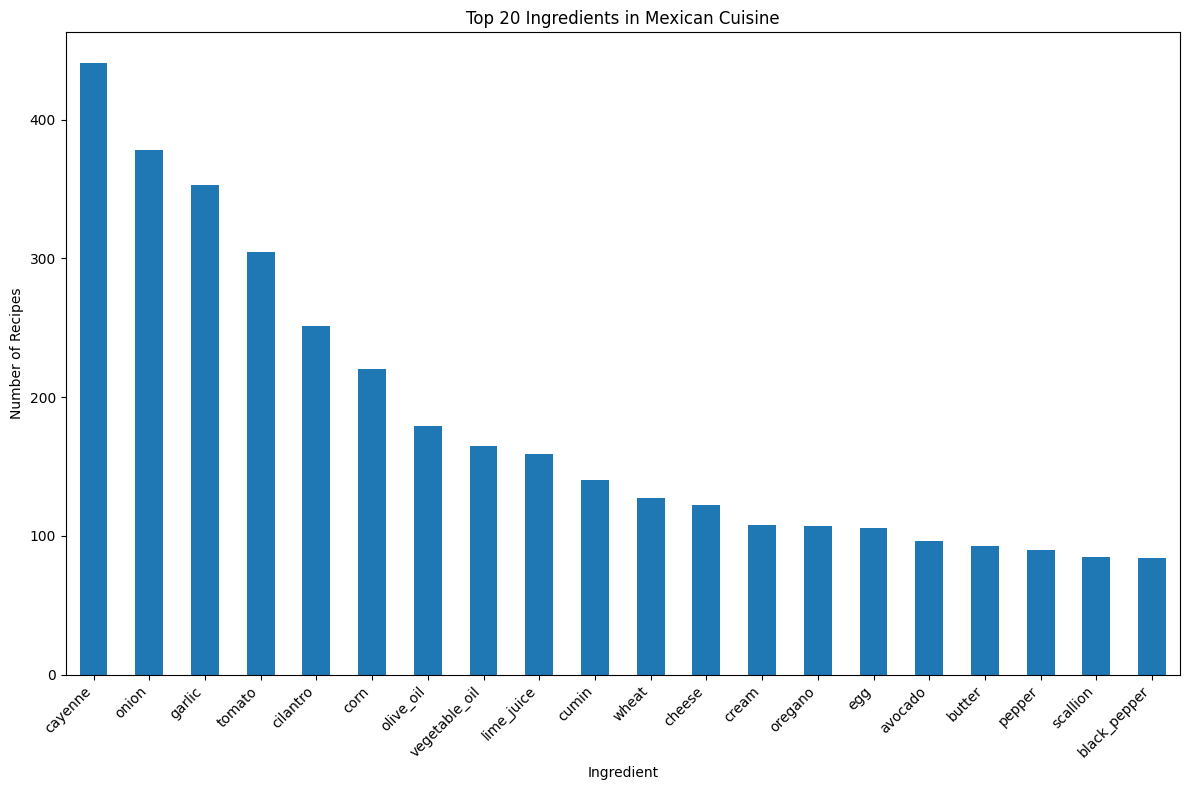

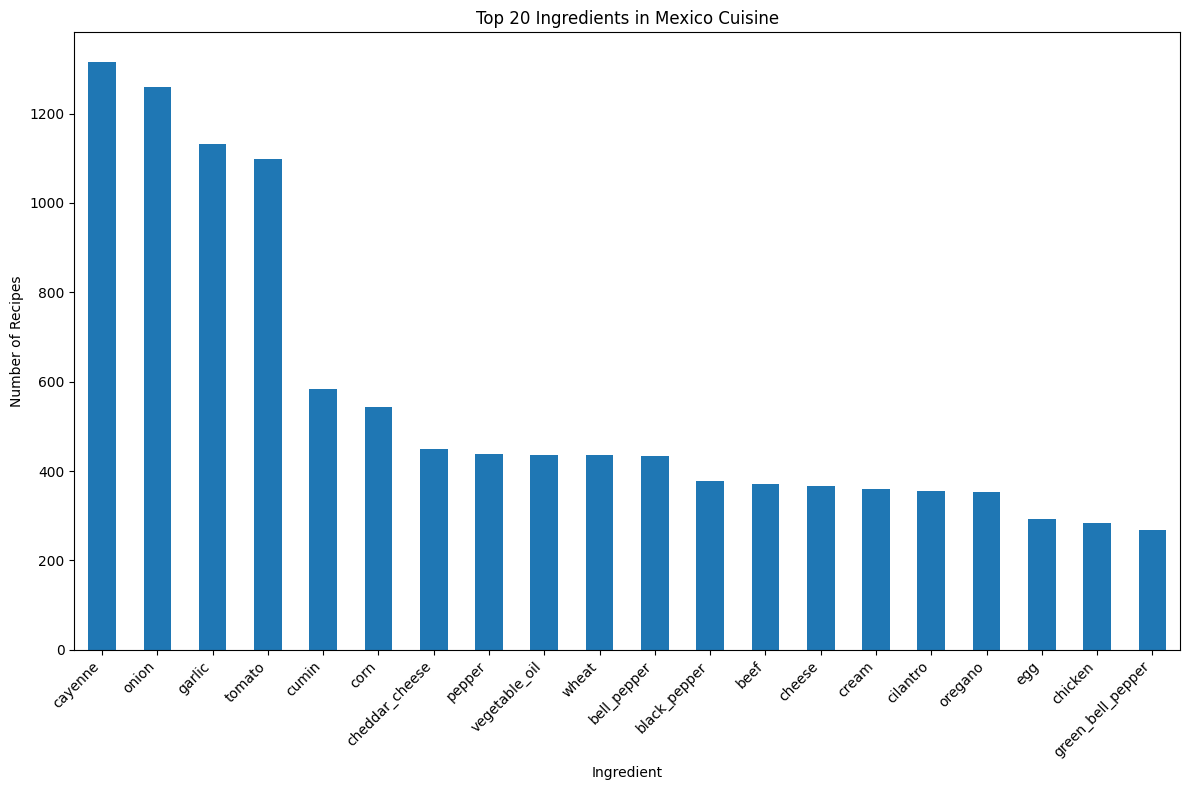

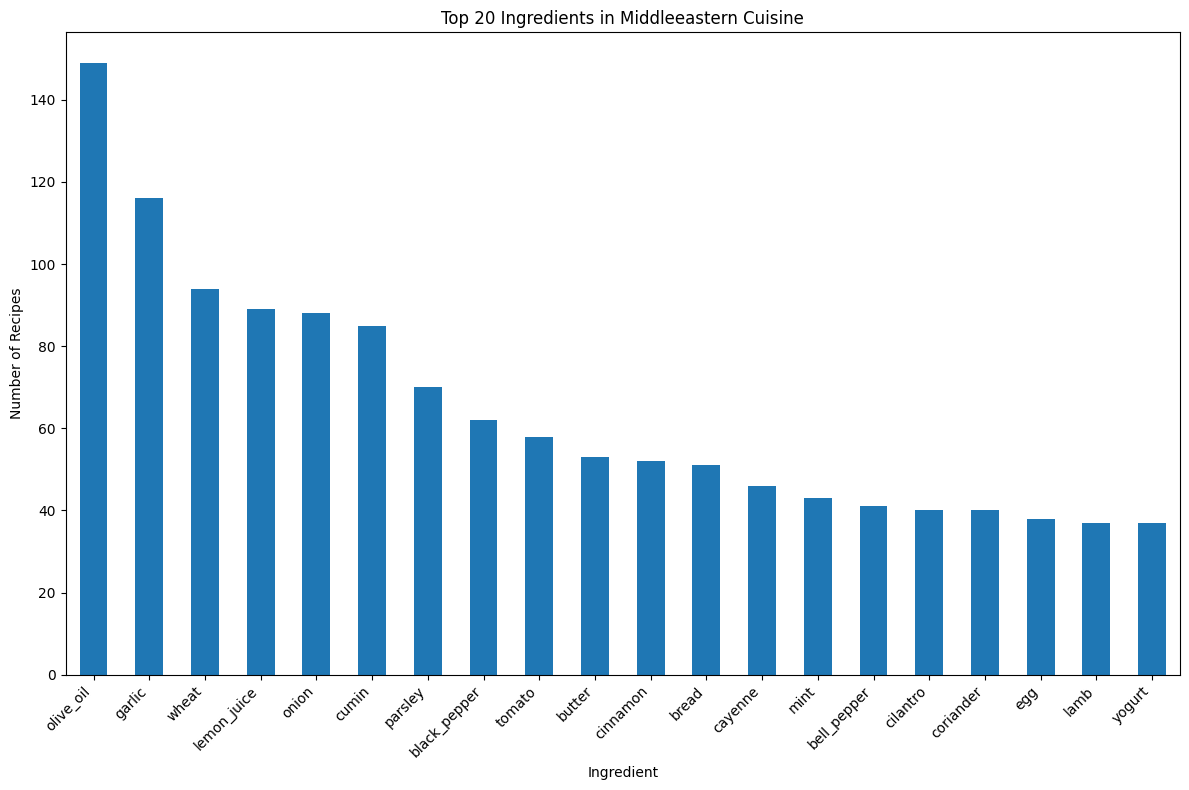

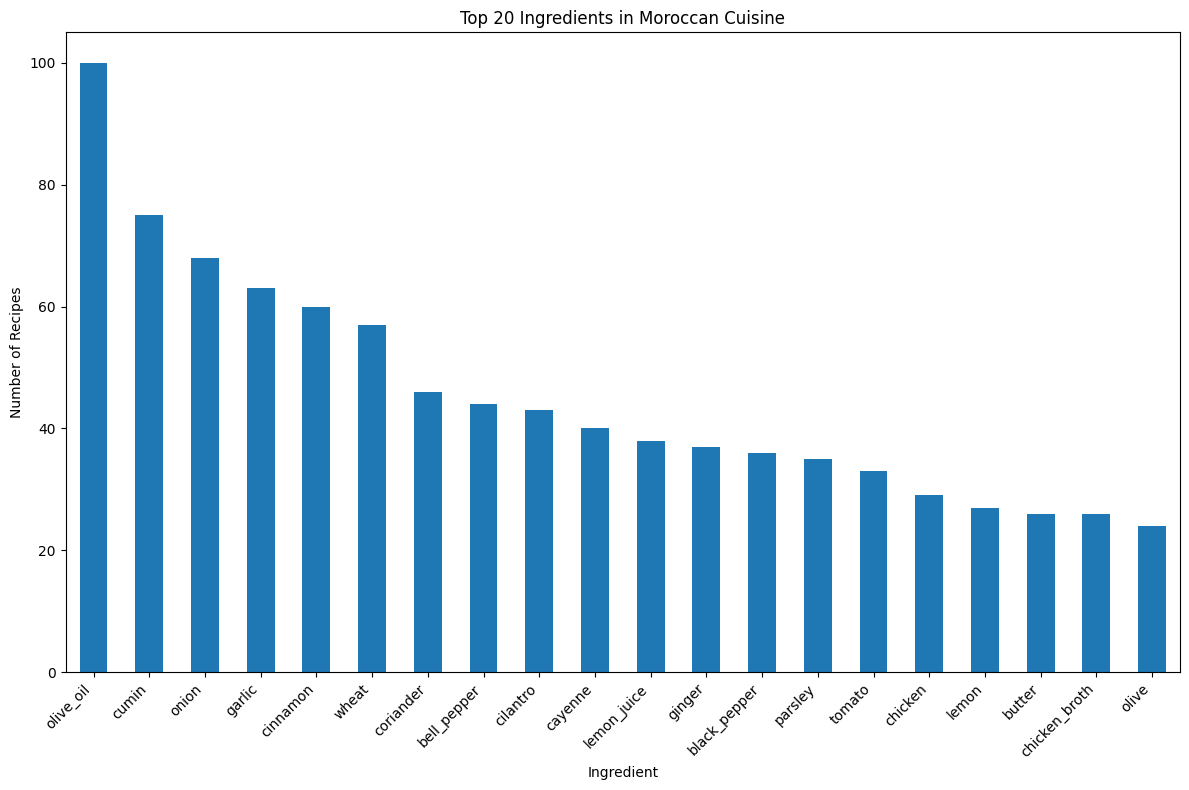

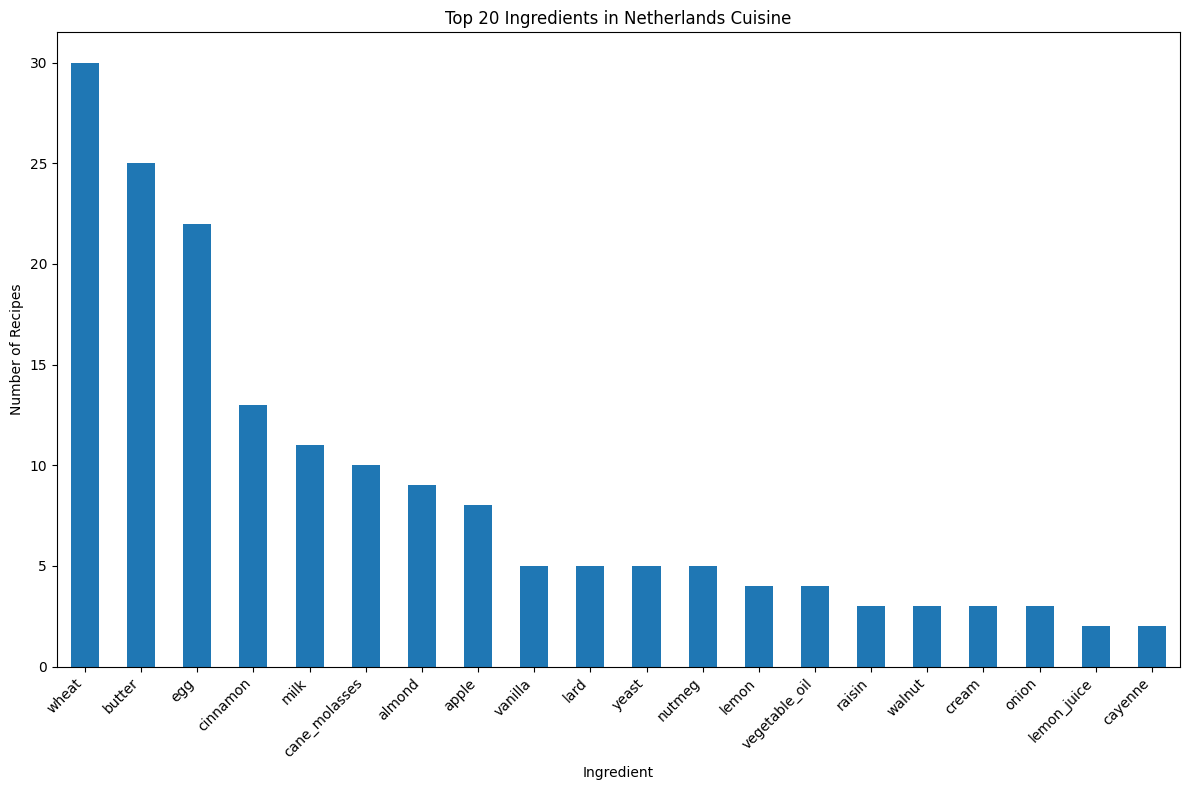

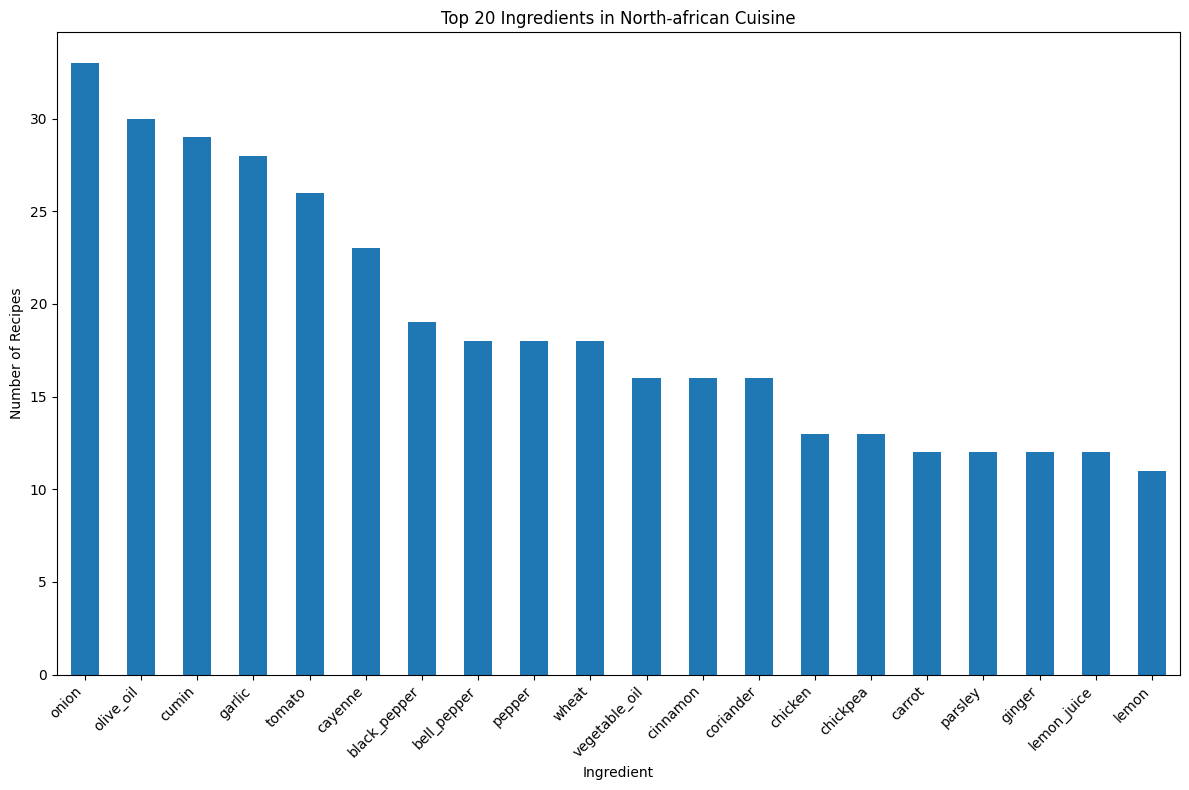

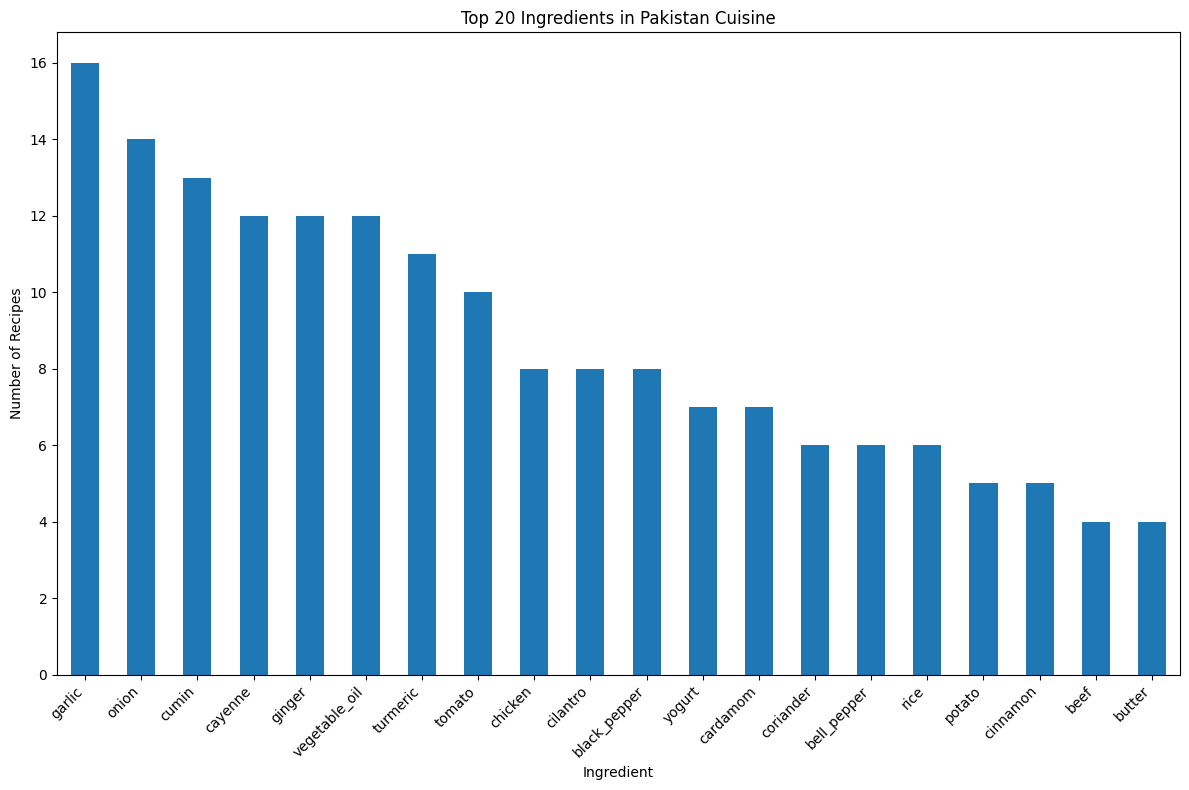

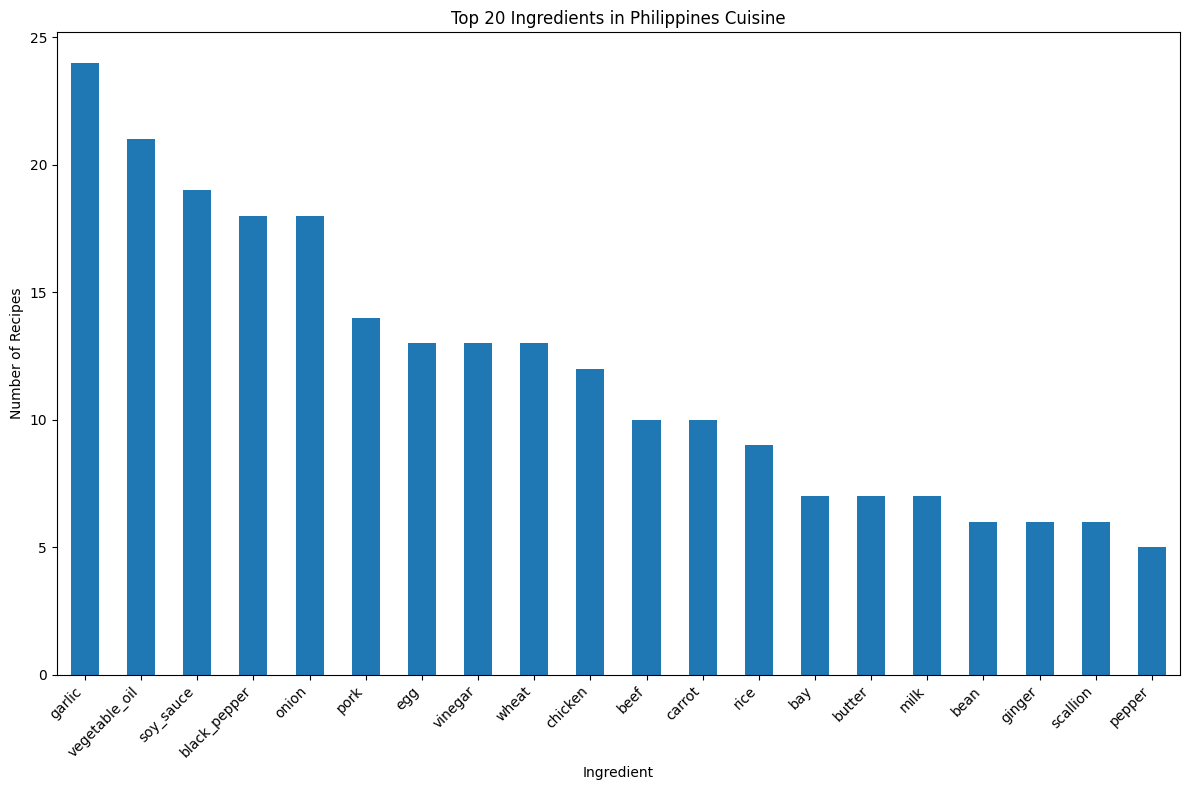

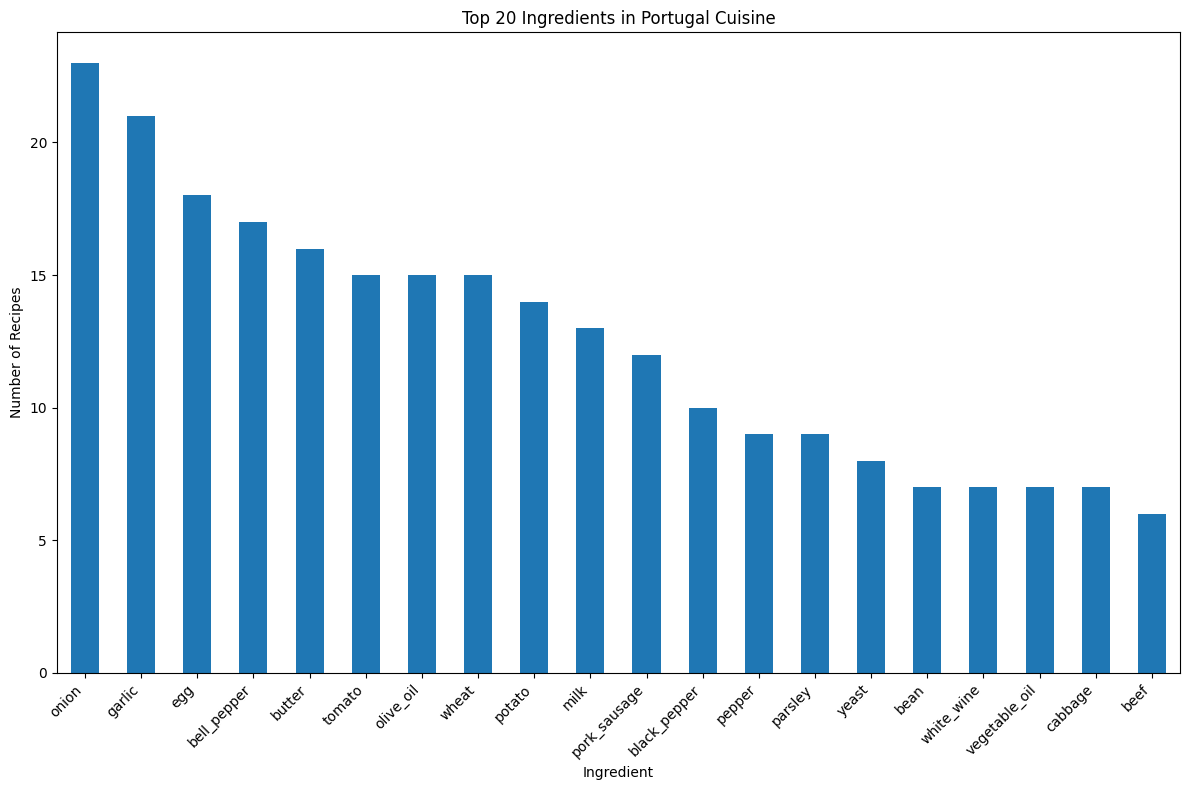

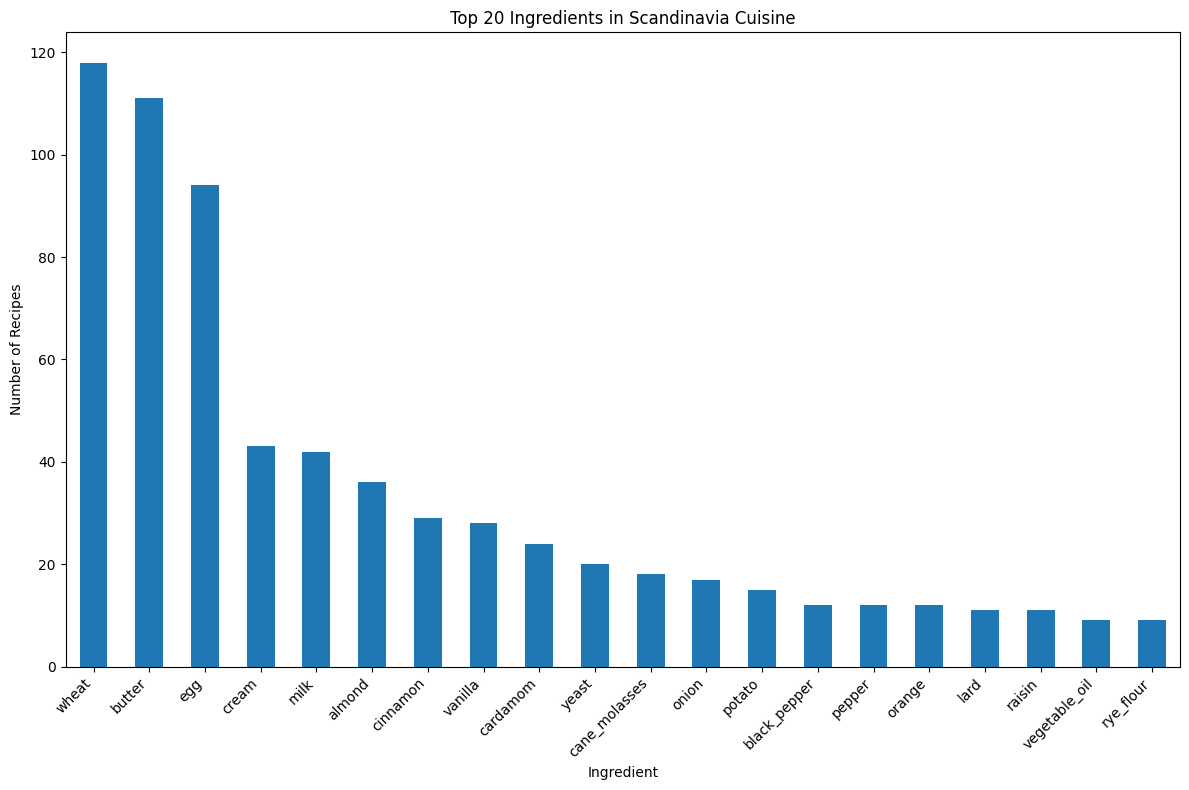

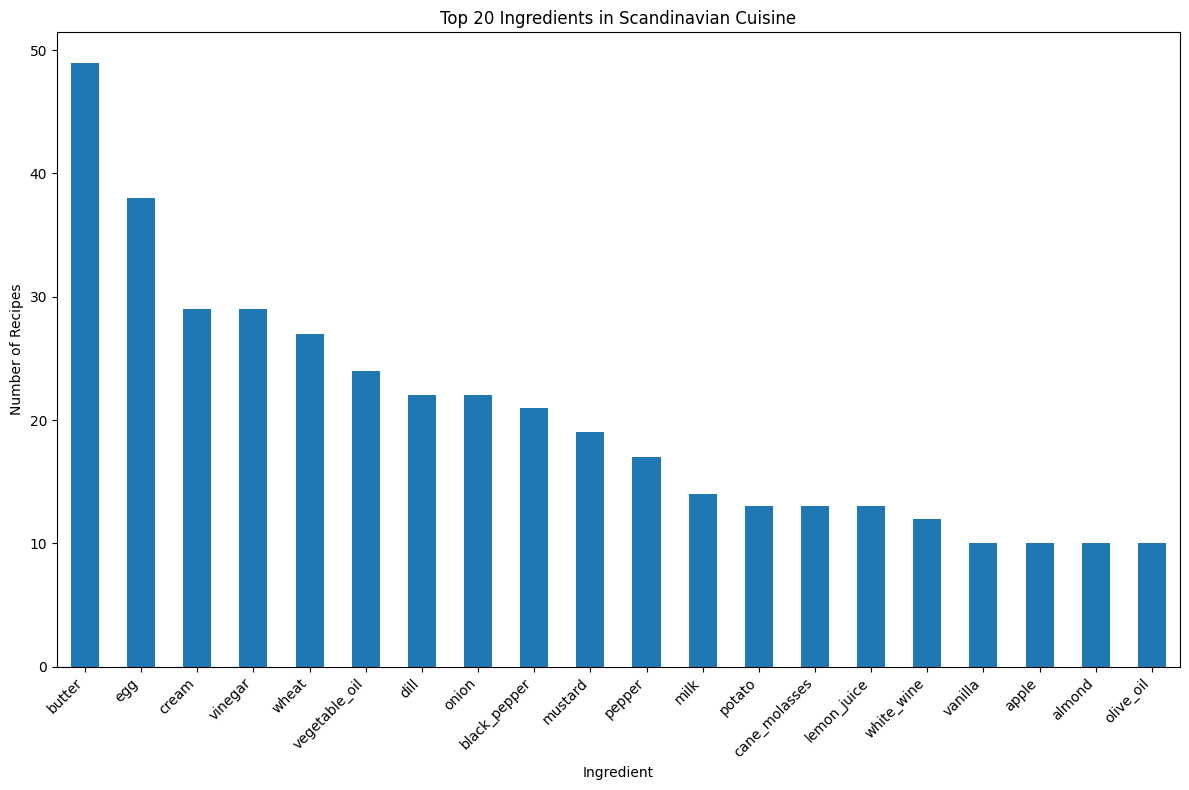

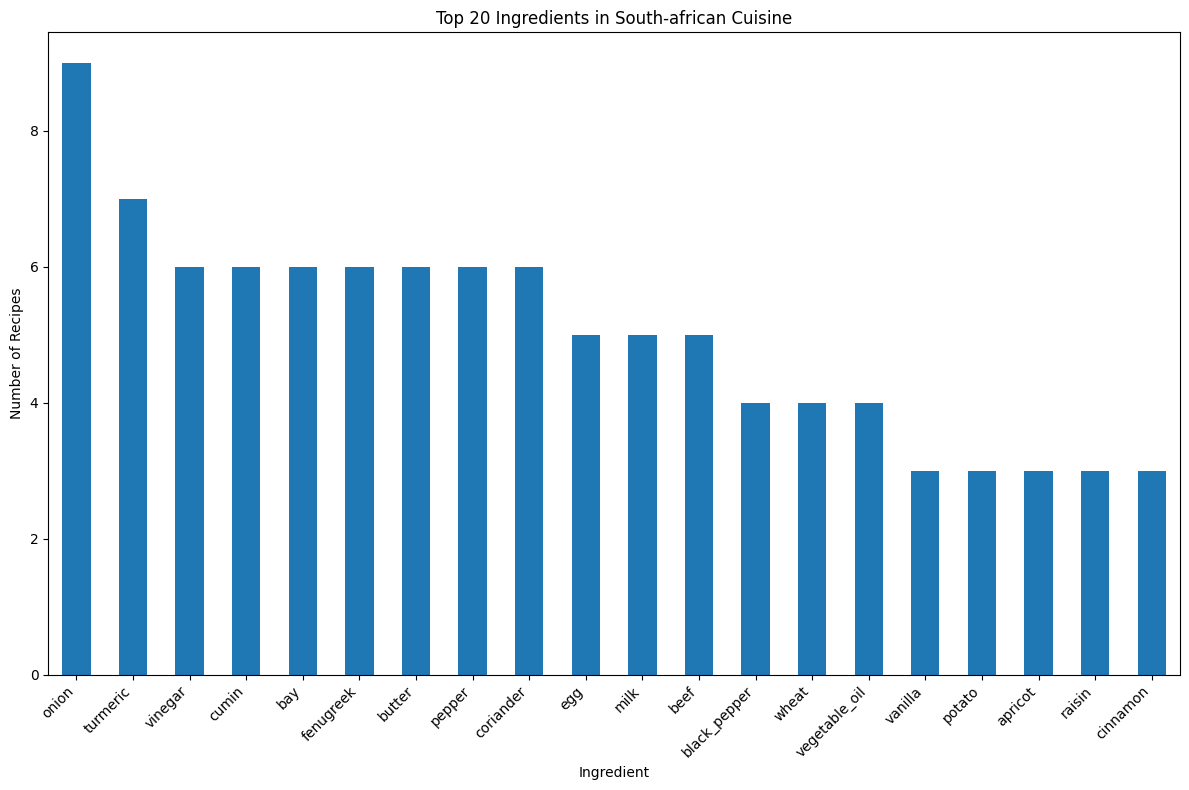

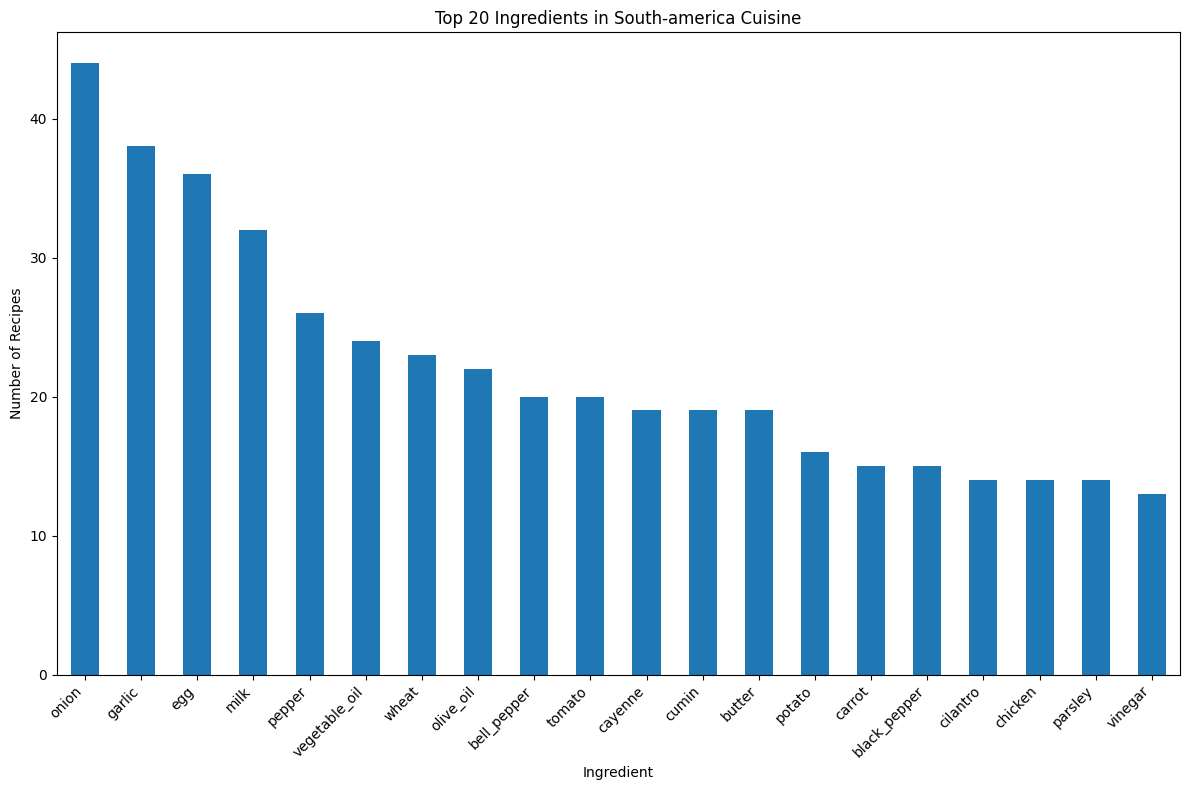

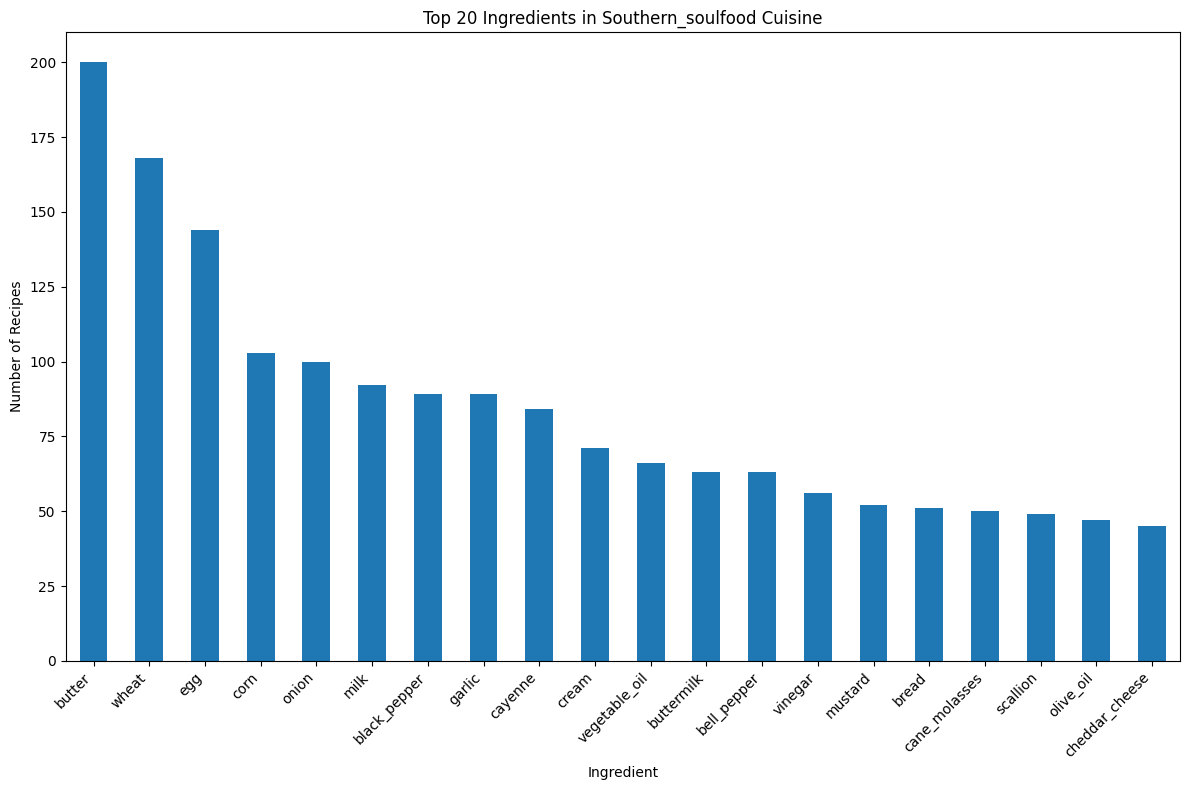

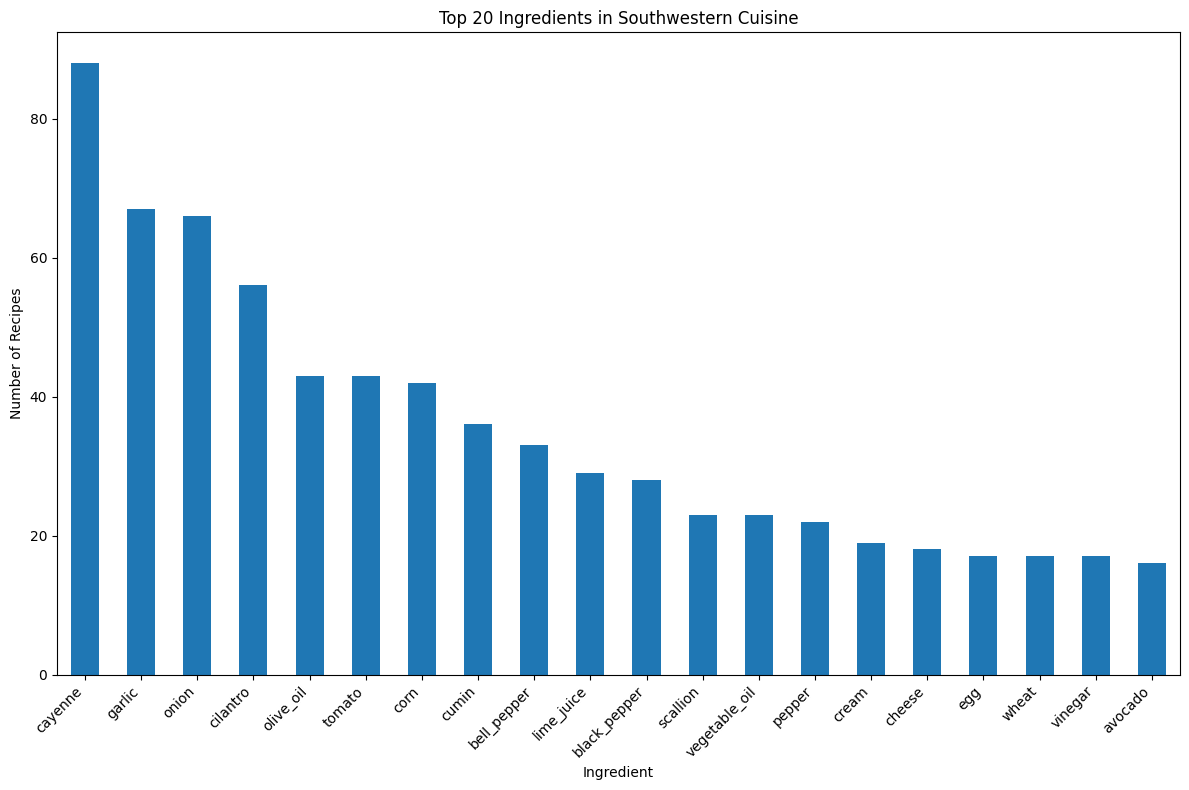

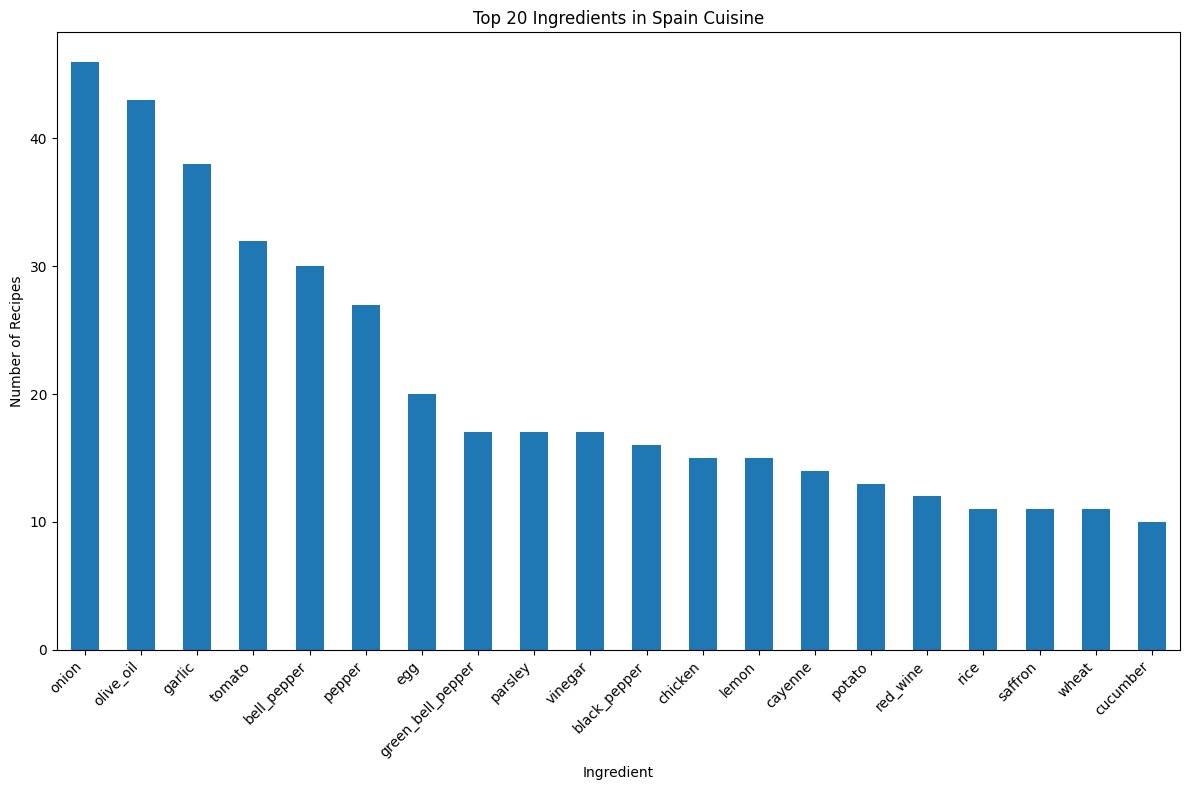

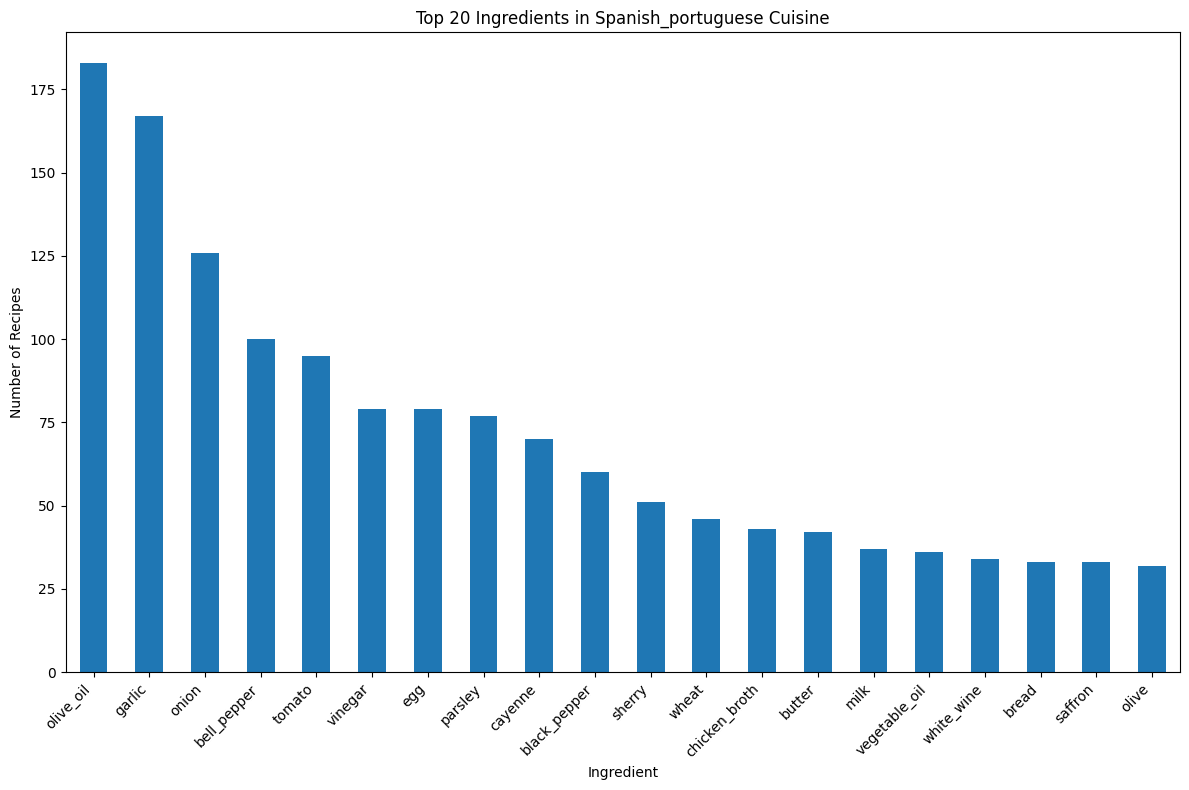

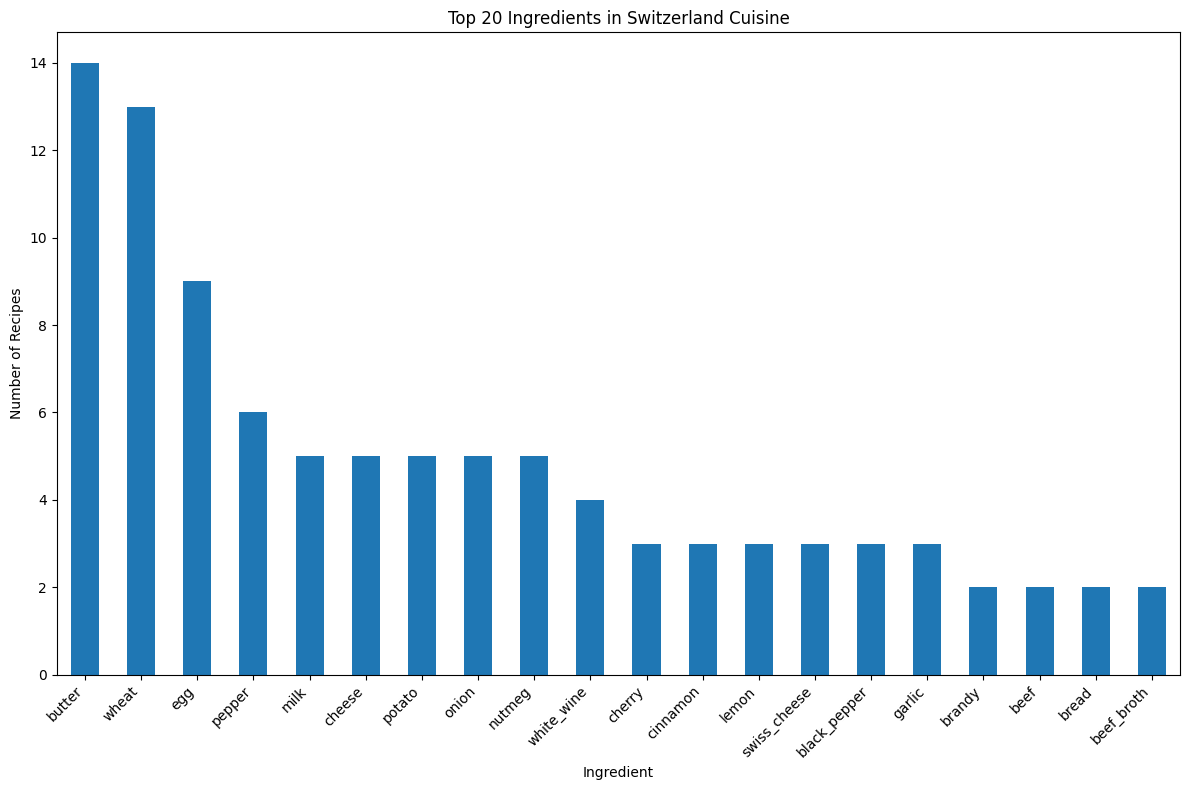

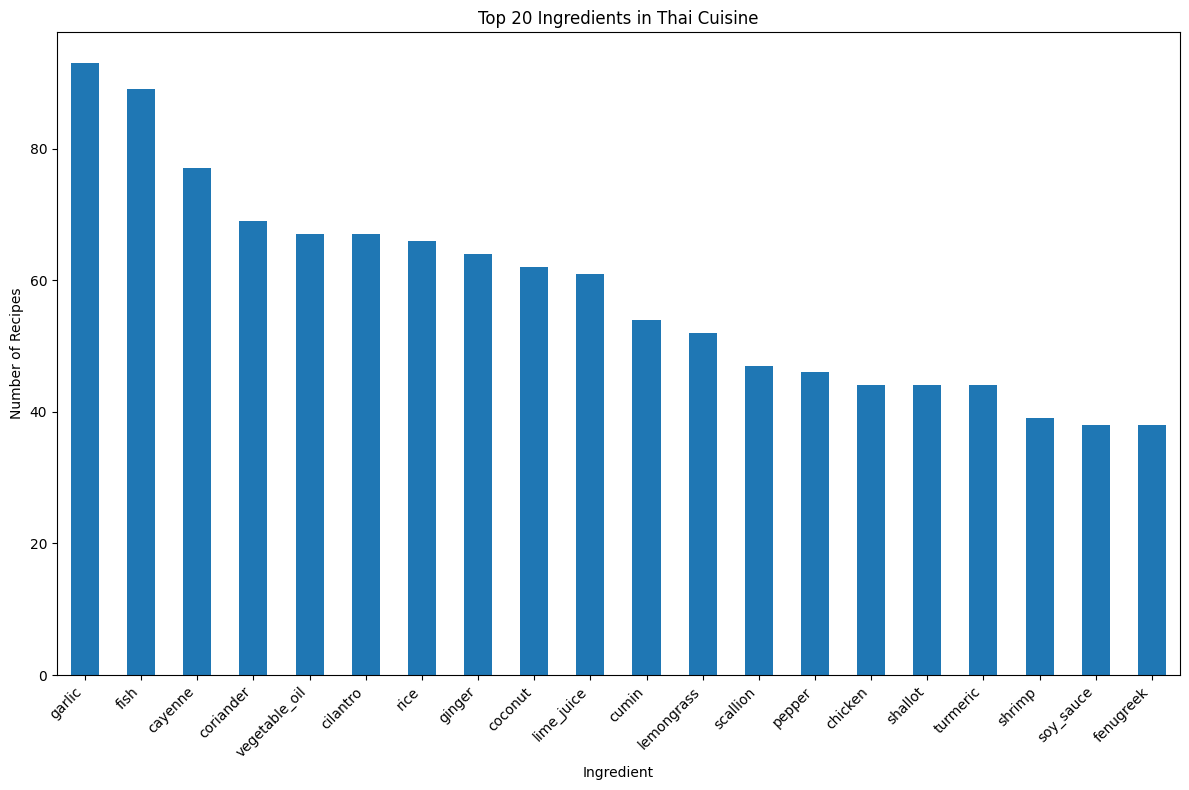

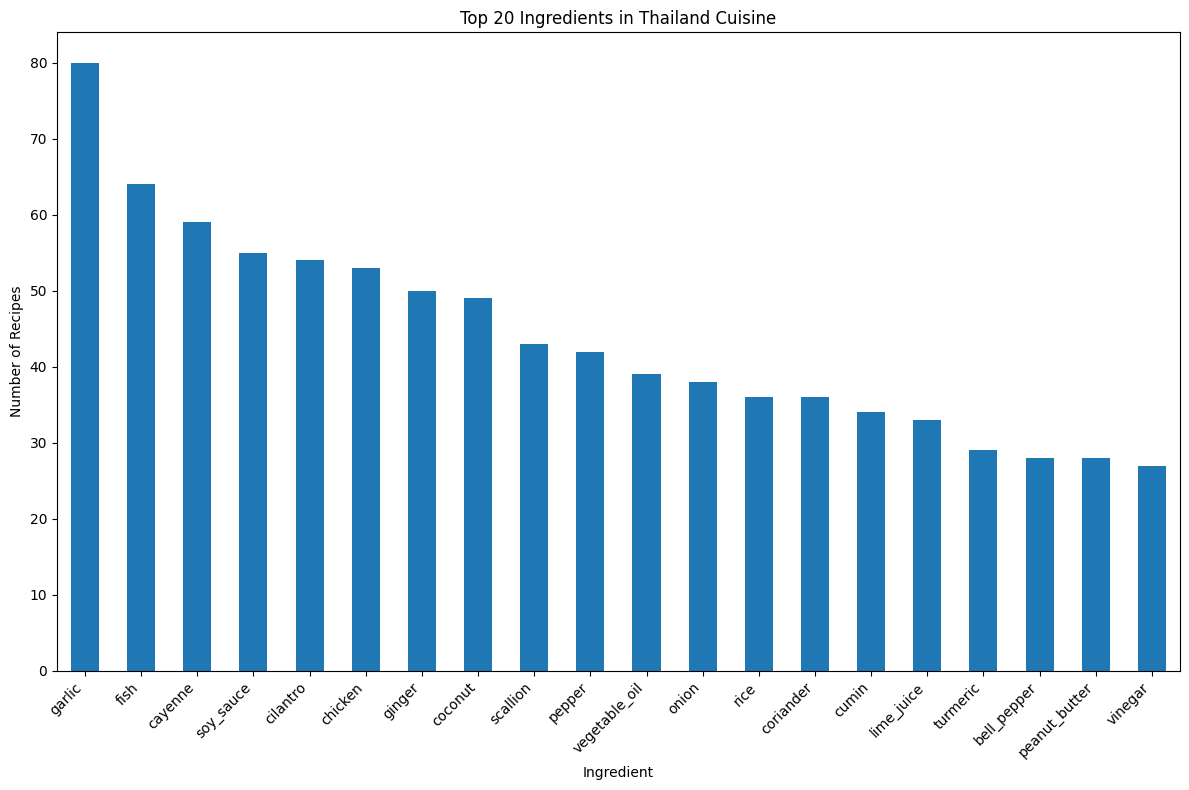

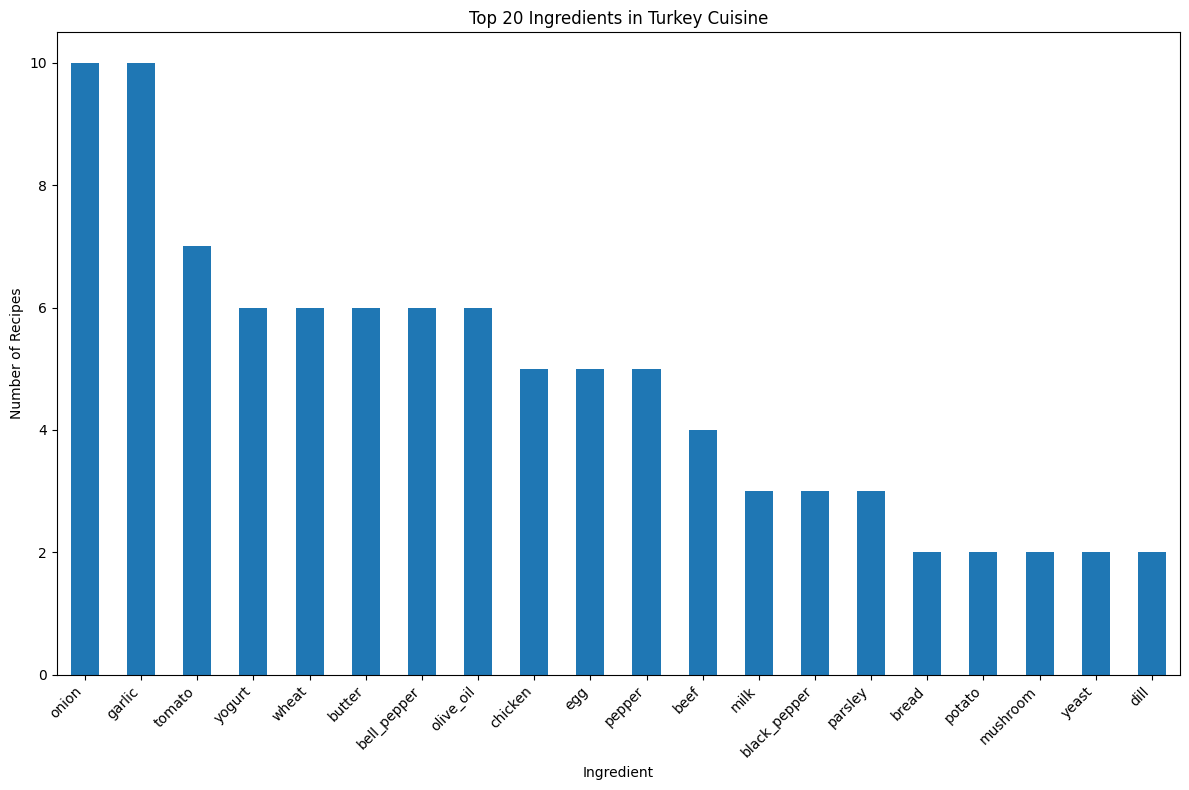

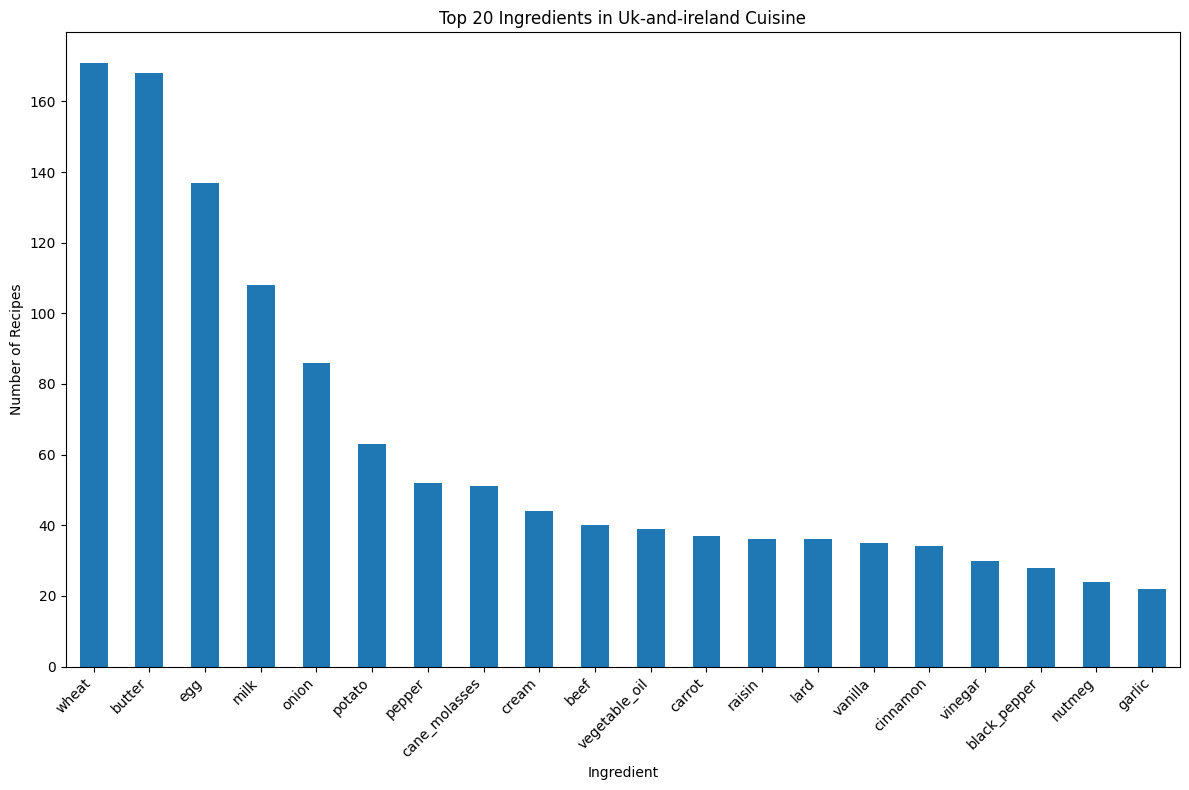

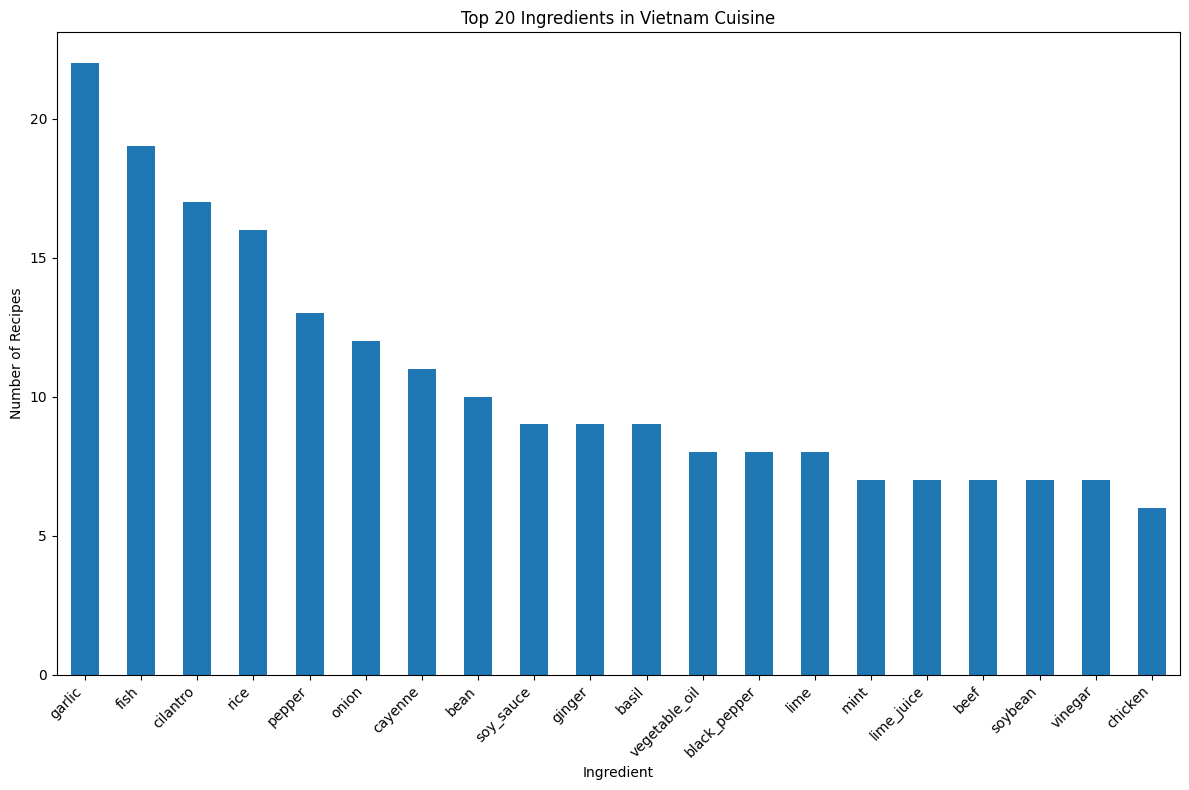

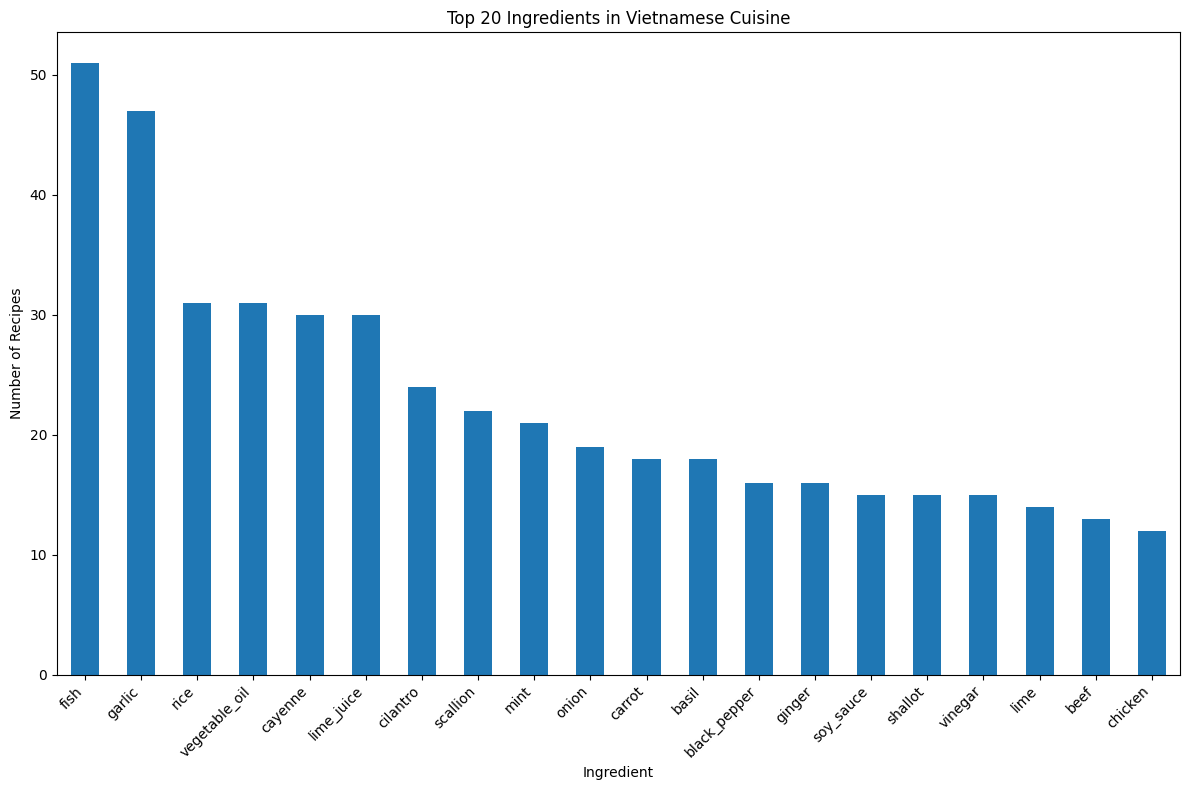

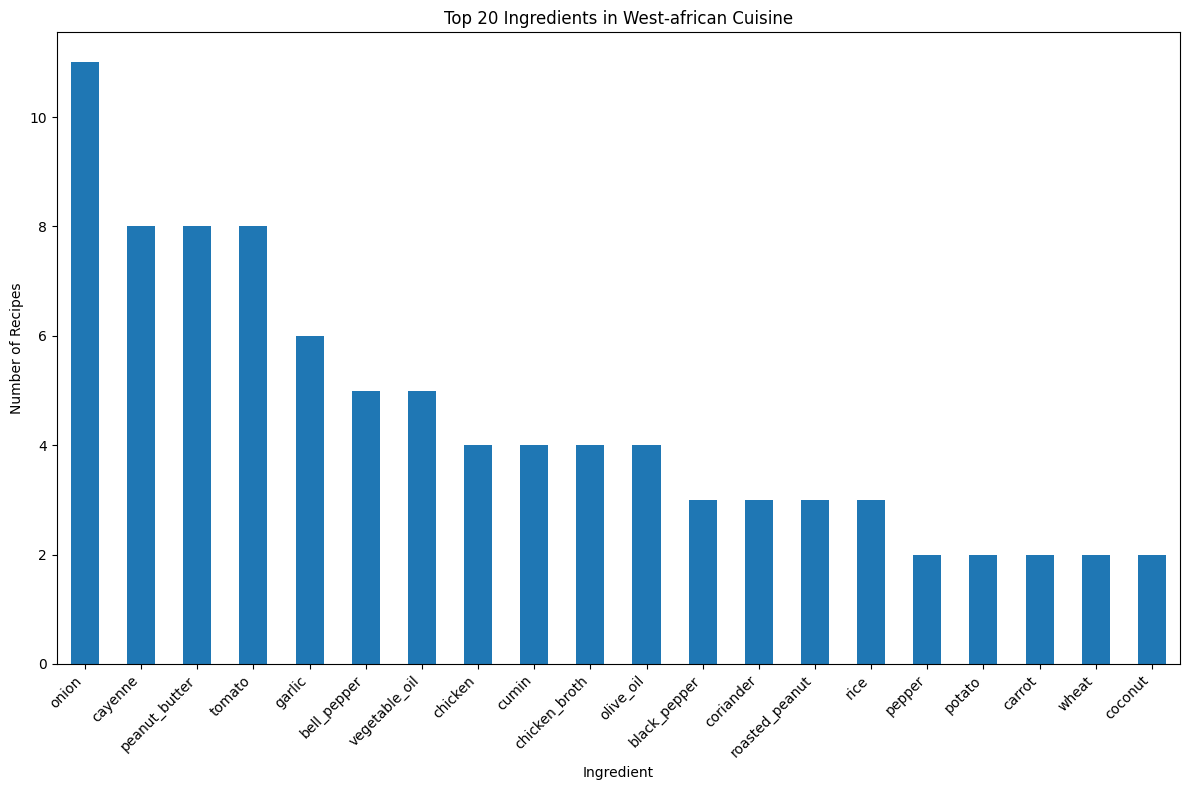

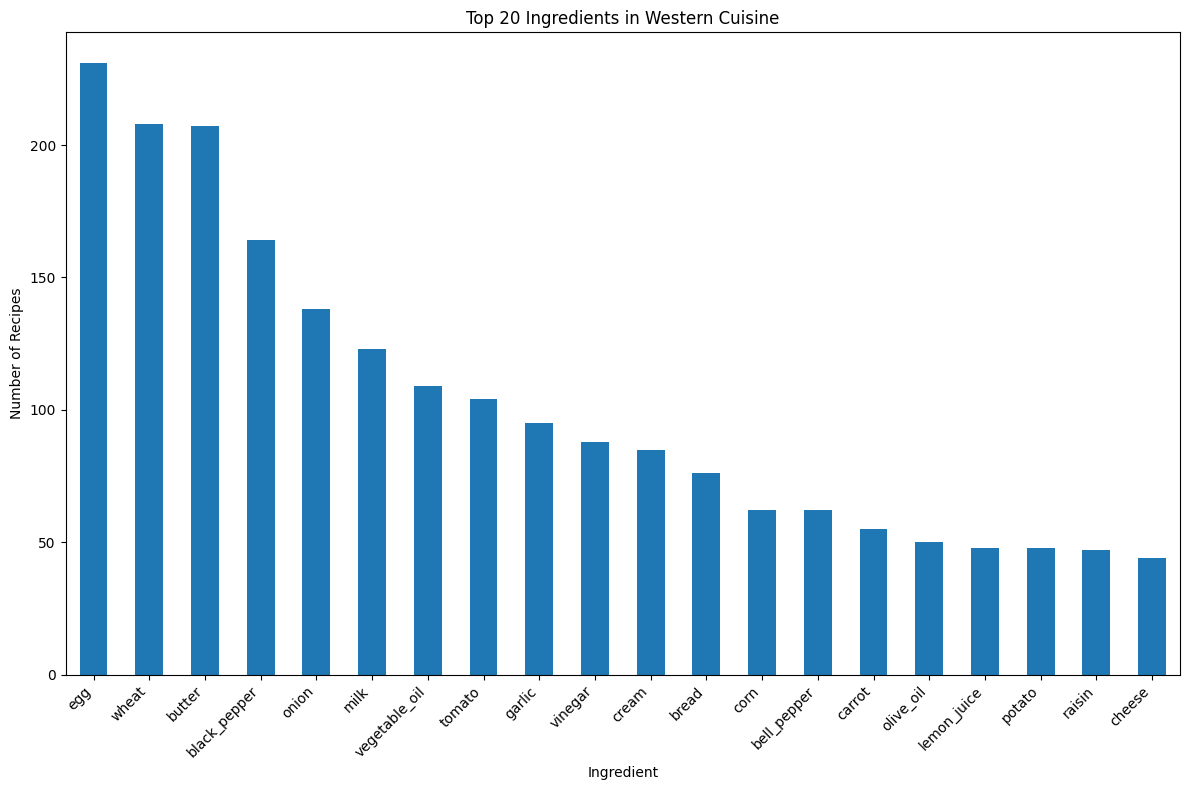

cuisine almond angelica anise anise_seed apple apple_brandy apricot  \
0      vietnamese     No       No    No         No    No           No      No   
1      vietnamese     No       No    No         No    No           No      No   
2      vietnamese     No       No    No         No    No           No      No   
3      vietnamese     No       No    No         No    No           No      No   
4      vietnamese     No       No    No         No    No           No      No   
...           ...    ...      ...   ...        ...   ...          ...     ...   
57686       japan     No       No    No         No    No           No      No   
57687       japan     No       No    No         No    No           No      No   
57688       japan     No       No    No         No    No           No      No   
57689       japan     No       No    No         No    No           No      No   
57690       japan     No       No    No         No    No           No      No   

      armagnac artemisia artichoke asparagus avocado bacon baked_potato balm  \
0           No        No        No        No      No    No           No   No   
1           No        No        No        No      No    No           No   No   
2           No        No        No        No      No    No           No   No   
3           No        No        No        No      No    No           No   No   
4           No        No        No        No      No    No           No   No   
...        ...       ...       ...       ...     ...   ...          ...  ...   
57686       No        No        No        No      No    No           No   No   
57687       No        No        No        No      No    No           No   No   
57688       No        No        No        No      No    No           No   No   
57689       No        No        No        No      No   Yes           No   No   
57690       No        No        No        No      No    No           No   No   

      banana barley bartlett_pear basil bay bean beech beef beef_broth  \
0         No     No            No   Yes  No   No    No   No         No   
1         No     No            No    No  No   No    No   No         No   
2         No     No            No    No  No   No    No   No         No   
3         No     No            No   Yes  No  Yes    No   No        Yes   
4         No     No            No    No  No   No    No   No         No   
...      ...    ...           ...   ...  ..  ...   ...  ...        ...   
57686     No     No            No    No  No   No    No   No         No   
57687     No     No            No    No  No   No    No   No         No   
57688     No    Yes            No    No  No   No    No   No         No   
57689     No     No            No    No  No   No    No   No         No   
57690     No    Yes            No    No  No   No    No   No         No   

      beef_liver beer beet bell_pepper bergamot berry bitter_orange  \
0             No   No   No          No       No    No            No   
1             No   No   No          No       No    No            No   
2             No   No   No          No       No    No            No   
3             No   No   No          No       No    No            No   
4             No   No   No          No       No    No            No   
...          ...  ...  ...         ...      ...   ...           ...   
57686         No   No   No          No       No    No            No   
57687         No   No   No          No       No    No            No   
57688         No   No   No          No       No    No            No   
57689         No   No   No          No       No    No            No   
57690         No   No   No          No       No    No            No   

      black_bean black_currant black_mustard_seed_oil black_pepper  \
0             No            No                     No           No   
1             No            No                     No          Yes   
2             No            No                     No           No   
3             No            No                     No 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Yes'/'No' to binary (1/0) for analysis
binary_data = recipes.iloc[:, 1:].replace({'Yes': 1, 'No': 0})

# Group by 'cuisine' and sum the binary data
cuisine_ingredient_sums = binary_data.groupby(recipes['cuisine']).sum()

# Plot the 20 most common ingredients for each cuisine
for cuisine in cuisine_ingredient_sums.index:
    # Sort the ingredients by their sum and select the top 20
    top_ingredients = cuisine_ingredient_sums.loc[cuisine].sort_values(ascending=False).head(20)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    top_ingredients.plot(kind='bar')
    
    # Setting titles and labels
    plt.title(f'Top 20 Ingredients in {cuisine.capitalize()} Cuisine')
    plt.xlabel('Ingredient')
    plt.ylabel('Number of Recipes')
    plt.xticks(rotation=45, ha='right')
    
    # Show plot
    plt.tight_layout()
    plt.show()


recipes

Remove cuisines with < 50 recipes.


In [13]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [14]:
rows_before = recipes.shape[0] # number of rows of original dataframe
print("Number of rows of original dataframe is {}.".format(rows_before))

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

rows_after = recipes.shape[0] # number of rows of processed dataframe
print("Number of rows of processed dataframe is {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Number of rows of original dataframe is 57691.
Number of rows of processed dataframe is 57282.
409 rows removed!


Convert all Yes's to 1's and the No's to 0's


In [15]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

recipes

/tmp/ipykernel_1117060/1532965427.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0      vietnamese       0         0      0           0      0             0   
1      vietnamese       0         0      0           0      0             0   
2      vietnamese       0         0      0           0      0             0   
3      vietnamese       0         0      0           0      0             0   
4      vietnamese       0         0      0           0      0             0   
...           ...     ...       ...    ...         ...    ...           ...   
57686       japan       0         0      0           0      0             0   
57687       japan       0         0      0           0      0             0   
57688       japan       0         0      0           0      0             0   
57689       japan       0         0      0           0      0             0   
57690       japan       0         0      0           0      0             0   

       apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  \
0            0         0          0          0          0        0      0   
1            0         0          0          0          0        0      0   
2            0         0          0          0          0        0      0   
3            0         0          0          0          0        0      0   
4            0         0          0          0          0        0      0   
...        ...       ...        ...        ...        ...      ...    ...   
57686        0         0          0          0          0        0      0   
57687        0         0          0          0          0        0      0   
57688        0         0          0          0          0        0      0   
57689        0         0          0          0          0        0      1   
57690        0         0          0          0          0        0      0   

       baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  \
0                 0     0       0       0              0      1    0     0   
1                 0     0       0       0              0      0    0     0   
2                 0     0       0       0              0      0    0     0   
3                 0     0       0       0              0      1    0     1   
4                 0     0       0       0              0      0    0     0   
...             ...   ...     ...     ...            ...    ...  ...   ...   
57686             0     0       0       0              0      0    0     0   
57687             0     0       0       0              0      0    0     0   
57688             0     0       0       1              0      0    0     0   
57689             0     0       0       0              0      0    0     0   
57690             0     0       0       1              0      0    0     0   

       beech  beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  \
0          0     0           0           0     0     0            0         0   
1          0     0           0           0     0     0            0         0   
2          0     0           0           0     0     0            0         0   
3          0     0           1           0     0     0            0         0   
4          0     0           0           0     0     0            0         0   
...      ...   ...         ...         ...   ...   ...          ...       ...   
57686      0     0           0           0     0     0            0         0   
57687      0     0           0           0     0     0            0         0   
57688      0     0           0           0     0     0            0         0   
57689      0     0           0           0     0     0            0         0   
57690      0     0           0           0     0     0            0         0   

       berry  bitter_orange  black_bean  black_currant  \
0          0              0           0              0   
1          0              0           0              0   
2          0              0           0             

#### Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.


Run the following cell to get the recipes that contain **rice** *and* **soy** *and* **wasabi** *and* **seaweed**.


In [16]:
recipes.head()

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0  vietnamese       0         0      0           0      0             0   
1  vietnamese       0         0      0           0      0             0   
2  vietnamese       0         0      0           0      0             0   
3  vietnamese       0         0      0           0      0             0   
4  vietnamese       0         0      0           0      0             0   

   apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  \
0        0         0          0          0          0        0      0   
1        0         0          0          0          0        0      0   
2        0         0          0          0          0        0      0   
3        0         0          0          0          0        0      0   
4        0         0          0          0          0        0      0   

   baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  beech  \
0             0     0       0       0              0      1    0     0      0   
1             0     0       0       0              0      0    0     0      0   
2             0     0       0       0              0      0    0     0      0   
3             0     0       0       0              0      1    0     1      0   
4             0     0       0       0              0      0    0     0      0   

   beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  berry  \
0     0           0           0     0     0            0         0      0   
1     0           0           0     0     0            0         0      0   
2     0           0           0     0     0            0         0      0   
3     0           1           0     0     0            0         0      0   
4     0           0           0     0     0            0         0      0   

   bitter_orange  black_bean  black_currant  black_mustard_seed_oil  \
0              0           0              0                       0   
1              0           0              0                       0   
2              0           0              0                       0   
3              0           0              0                       0   
4              0           0              0                       0   

   black_pepper  black_raspberry  black_sesame_seed  black_tea  blackberry  \
0             0                0                  0          0           0   
1             1                0                  0          0           0   
2             0                0                  0          0           0   
3             0                0                  0          0           0   
4             0                0                  0          0           0   

   blackberry_brandy  blue_cheese  blueberry  bone_oil  bourbon_whiskey  \
0                  0            0          0         0                0   
1                  0            0          0         0                0   
2                  0            0          0         0                0   
3                  0            0          0         0                0   
4                  0            0          0         0                0   

   brandy  brassica  bread  broccoli  brown_rice  brussels_sprout  buckwheat  \
0       0         0      0         0           0                0          0   
1       0         0      0         0           0                0          0   
2       0         0      0         0           0                0          0   
3       0         0      0         0           0                0          0   
4       0         0      0         0           0                0          0   

   butter  buttermilk  cabbage  cabernet_sauvignon_wine  cacao  \
0       0           0        0                        0      0   
1       0           0        0                        0      0   
2       0           0        0                        0      0   
3       0           0        0                        0      0   
4       

In [17]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
11306    japanese       0         0      0           0      0             0   
11321    japanese       0         0      0           0      0             0   
11361    japanese       0         0      0           0      0             0   
12171       asian       0         0      0           0      0             0   
12385       asian       0         0      0           0      0             0   
13010       asian       0         0      0           0      0             0   
13159       asian       0         0      0           0      0             0   
13513    japanese       0         0      0           0      0             0   
13586    japanese       0         0      0           0      0             0   
13625  east_asian       0         0      0           0      0             0   
14495  east_asian       0         0      0           0      0             0   

       apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  \
11306        0         0          0          0          0        1      0   
11321        0         0          0          0          0        0      0   
11361        0         0          0          0          0        1      0   
12171        0         0          0          0          0        0      0   
12385        0         0          0          0          0        1      0   
13010        0         0          0          0          0        1      0   
13159        0         0          0          0          0        1      0   
13513        0         0          0          0          0        0      0   
13586        0         0          0          0          0        0      0   
13625        0         0          0          0          0        0      0   
14495        0         0          0          0          0        0      0   

       baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  \
11306             0     0       0       0              0      0    0     0   
11321             0     0       0       0              0      0    0     0   
11361             0     0       0       0              0      0    0     0   
12171             0     0       0       0              0      0    0     0   
12385             0     0       0       0              0      0    0     0   
13010             0     0       0       0              0      0    0     0   
13159             0     0       0       0              0      0    0     0   
13513             0     0       0       0              0      0    0     0   
13586             0     0       0       0              0      0    0     0   
13625             0     0       0       0              0      0    0     0   
14495             0     0       0       0              0      0    0     0   

       beech  beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  \
11306      0     0           0           0     0     0            0         0   
11321      0     0           0           0     0     0            0         0   
11361      0     0           0           0     0     0            0         0   
12171      0     0           0           0     0     0            0         0   
12385      0     0           0           0     0     0            0         0   
13010      0     0           0           0     0     0            0         0   
13159      0     0           0           0     0     0            0         0   
13513      0     0           0           0     0     0            0         0   
13586      0     0           0           0     0     0            0         0   
13625      0     0           0           0     0     0            0         0   
14495      0     0           0           0     0     0            0         0   

       berry  bitter_orange  black_bean  black_currant  \
11306      0              0           0              0   
11321      0              0           0              0   
11361      0              0           0             

Based on the results of the above code, can we classify all recipes that contain **rice** *and* **soy** *and* **wasabi** *and* **seaweed** as **Japanese** recipes? Why?


<details><summary>Click here for a solution</summary>

```python
   #The correct answer is:
    
    No, because other recipes such as Asian and East_Asian recipes also contain these ingredients.
```

</details>


Let's count the ingredients across all recipes.


In [18]:
# sum each column
ing = recipes.iloc[:, 1:].sum(axis=0)

# Convert 'Yes'/'No' to 1/0 for easier summation
binary_data = recipes.iloc[:, 1:].replace({'Yes': 1, 'No': 0})

# Sum each column
ingredient_sums = binary_data.sum(axis=0)

# Print the result as a string
print(ingredient_sums.to_string())


almond                      2306
angelica                       1
anise                        223
anise_seed                    87
apple                       2420
apple_brandy                  37
apricot                      619
armagnac                      11
artemisia                     13
artichoke                    391
asparagus                    459
avocado                      660
bacon                       2166
baked_potato                   9
balm                           3
banana                       989
barley                       266
bartlett_pear                 23
basil                       3833
bay                         1457
bean                        1971
beech                          1
beef                        4877
beef_broth                   842
beef_liver                    10
beer                         307
beet                         233
bell_pepper                 5957
bergamot                       7
berry                        183
bitter_ora

In [19]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

                  ingredient  count
0                     almond   2306
1                   angelica      1
2                      anise    223
3                 anise_seed     87
4                      apple   2420
5               apple_brandy     37
6                    apricot    619
7                   armagnac     11
8                  artemisia     13
9                  artichoke    391
10                 asparagus    459
11                   avocado    660
12                     bacon   2166
13              baked_potato      9
14                      balm      3
15                    banana    989
16                    barley    266
17             bartlett_pear     23
18                     basil   3833
19                       bay   1457
20                      bean   1971
21                     beech      1
22                      beef   4877
23                beef_broth    842
24                beef_liver     10
25                      beer    307
26                      beet

Now we have a dataframe of ingredients and their total counts across all recipes. Let's sort this dataframe in descending order.


In [20]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

          ingredient  count
0                egg  20997
1              wheat  20757
2             butter  20699
3              onion  18033
4             garlic  17287
..               ...    ...
378    roasted_pecan      1
379  sturgeon_caviar      1
380         angelica      1
381           durian      0
382          pimenta      0

[383 rows x 2 columns]


#### What are the 3 most popular ingredients?


<details><summary>Click here for a solution</summary>

   1. Egg with <strong>21,025</strong> occurrences. 

   2. Wheat with <strong>20,781</strong> occurrences. 

   3. Butter with <strong>20,719</strong> occurrences.


</details>


However, note that there is a problem with the above table. There are ~40,000 American recipes in our dataset, which means that the data is biased towards American ingredients.


**Therefore**, let's compute a more objective summary of the ingredients by looking at the ingredients per cuisine.


#### Let's create a *profile* for each cuisine.

In other words, let's try to find out what ingredients Chinese people typically use, and what is **Canadian** food for example.


In [21]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

almond  angelica     anise  anise_seed     apple  \
cuisine                                                            
african       0.156522  0.000000  0.000000    0.000000  0.034783   
american      0.040598  0.000025  0.003014    0.000573  0.052055   
asian         0.007544  0.000000  0.000838    0.002515  0.012573   
cajun_creole  0.000000  0.000000  0.000000    0.000000  0.006849   
canada        0.036176  0.000000  0.000000    0.000000  0.036176   

              apple_brandy   apricot  armagnac  artemisia  artichoke  \
cuisine                                                                
african           0.000000  0.069565    0.0000        0.0   0.000000   
american          0.000623  0.011308    0.0001        0.0   0.006351   
asian             0.000000  0.005029    0.0000        0.0   0.000000   
cajun_creole      0.000000  0.000000    0.0000        0.0   0.000000   
canada            0.000000  0.002584    0.0000        0.0   0.001292   

              asparagus   avocado     bacon  baked_potato      balm    banana  \
cuisine                                                                         
african        0.000000  0.008696  0.008696      0.000000  0.000000  0.017391   
american       0.007522  0.007323  0.041220      0.000199  0.000075  0.021594   
asian          0.019279  0.010897  0.013412      0.000000  0.000000  0.006706   
cajun_creole   0.000000  0.006849  0.020548      0.000000  0.000000  0.006849   
canada         0.007752  0.009044  0.032300      0.000000  0.000000  0.020672   

                barley  bartlett_pear     basil       bay      bean  beech  \
cuisine                                                                      
african       0.017391       0.000000  0.017391  0.034783  0.008696    0.0   
american      0.003885       0.000423  0.058655  0.020697  0.028767    0.0   
asian         0.029338       0.000000  0.055323  0.011735  0.083822    0.0   
cajun_creole  0.000000       0.000000  0.027397  0.232877  0.006849    0.0   
canada        0.007752       0.000000  0.060724  0.028424  0.019380    0.0   

                  beef  beef_broth  beef_liver      beer      beet  \
cuisine                                                              
african       0.052174    0.008696    0.000000  0.000000  0.008696   
american      0.075118    0.009988    0.000174  0.005430  0.003686   
asian         0.103940    0.012573    0.000000  0.004191  0.000838   
cajun_creole  0.143836    0.027397    0.000000  0.000000  0.013699   
canada        0.086563    0.009044    0.000000  0.010336  0.002584   

              bell_pepper  bergamot     berry  bitter_orange  black_bean  \
cuisine                                                                    
african          0.313043  0.000000  0.000000       0.000000    0.008696   
american         0.087846  0.000149  0.003836       0.001245    0.005131   
asian            0.133277  0.000000  0.000838       0.001676    0.017603   
cajun_creole     0.342466  0.000000  0.000000       0.000000    0.000000   
canada           0.100775  0.000000  0.003876       0.001292    0.007752   

              black_currant  black_mustard_seed_oil  black_pepper  \
cuisine                                                             
african            0.000000                0.000000      0.295652   
american           0.000199                0.000050      0.147621   
asian              0.000000                0.001676      0.118189   
cajun_creole       0.000000                0.000000      0.328767   
canada             0.000000                0.001292      0.209302   

              black_raspberry  black_sesame_seed  black_tea  blackberry  \
cuisine                                                                   
african              0.000000                0.0   0.000000    0.000000   
american             0.000199                0.0   0.000573    0.003462   
asian                0.000000                0.0   0.005868    0.000838   
cajun_creole         0.000000       

As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

**For example**:

* *almond* is present across 15.65% of all of the **African** recipes.
* *butter* is present across 38.11% of all of the **Canadian** recipes.


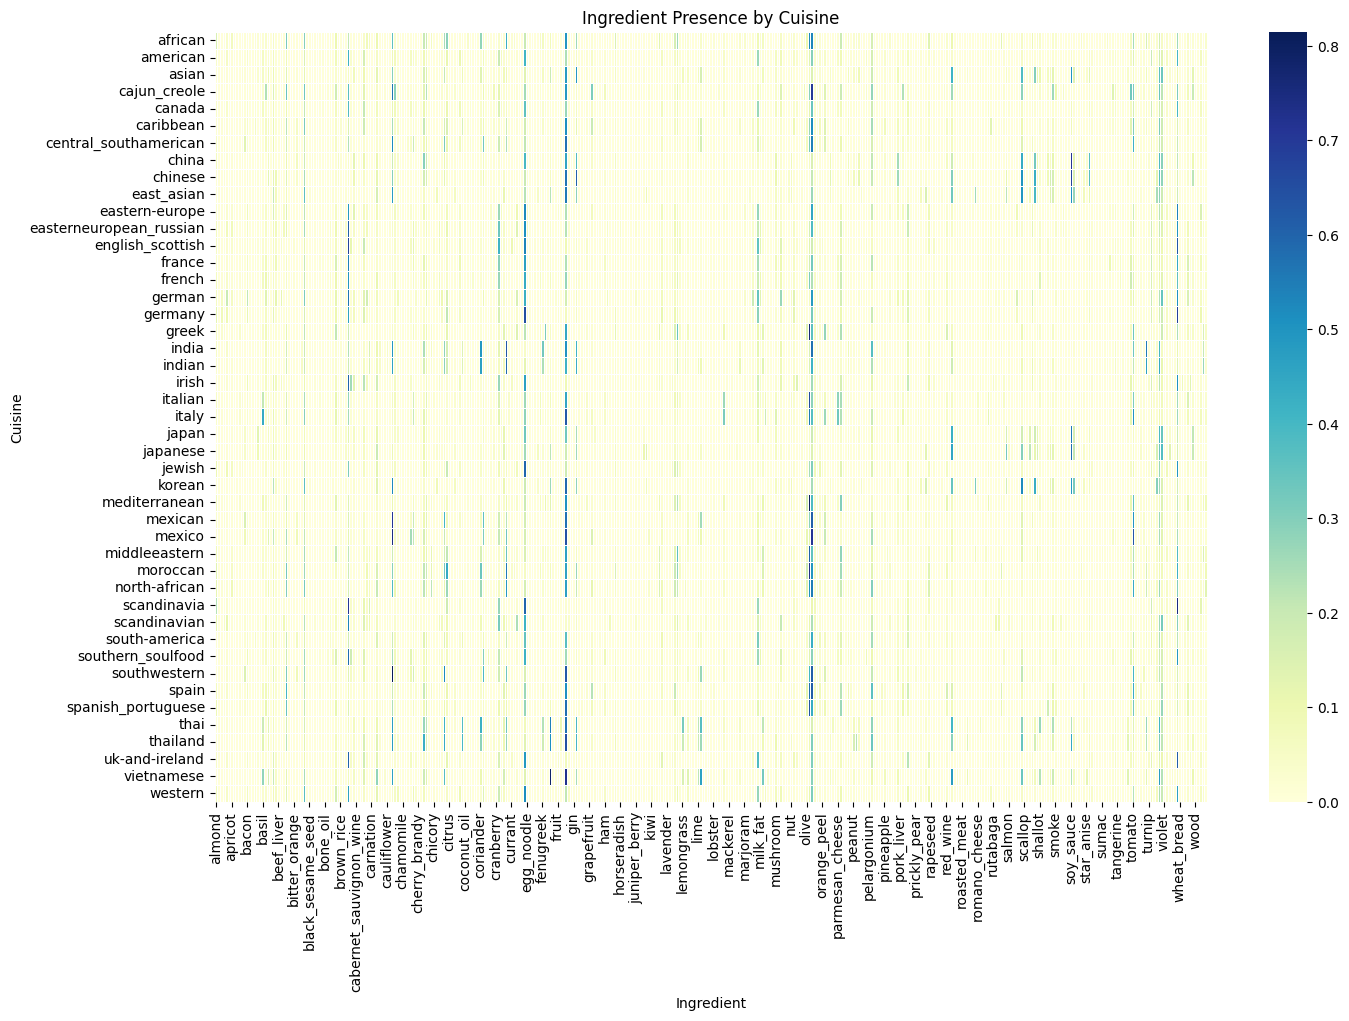

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Plot a heatmap of the mean ingredient presence by cuisine
sns.heatmap(cuisines, cmap='YlGnBu', linewidths=0.5)

# Set plot titles and labels
plt.title('Ingredient Presence by Cuisine')
plt.xlabel('Ingredient')
plt.ylabel('Cuisine')

# Display the plot
plt.show()


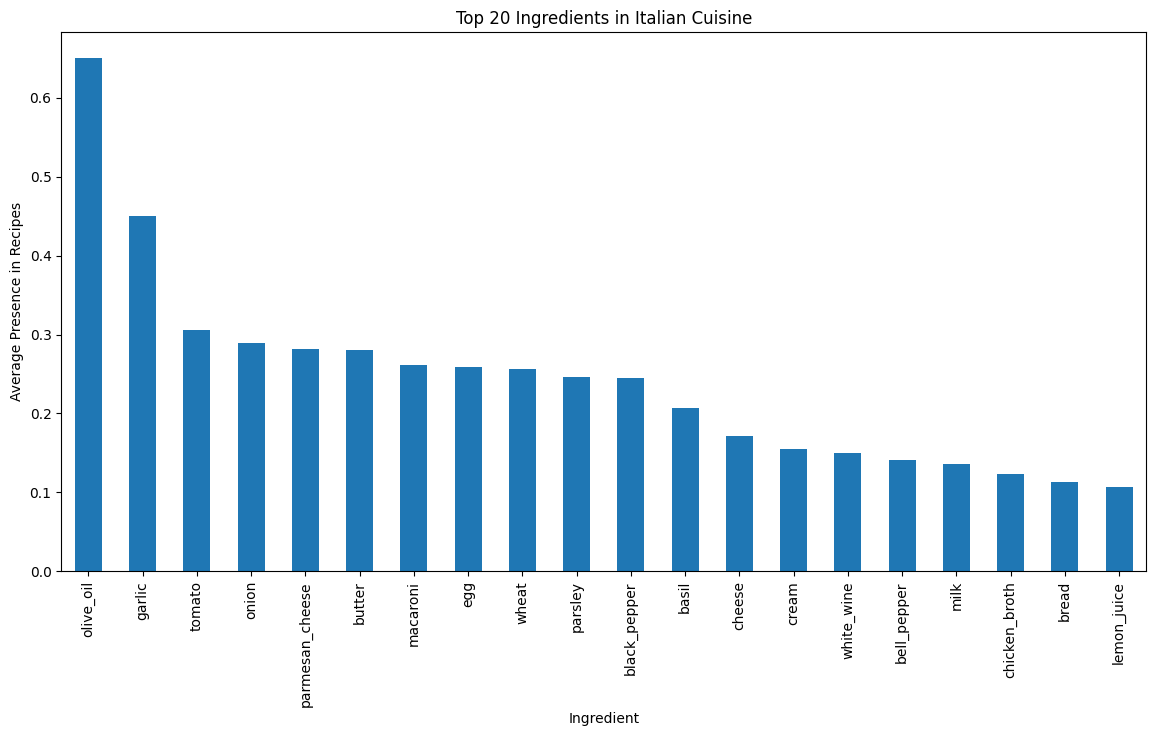

In [23]:
# Choose a specific cuisine, e.g., 'Italian'
cuisine_of_interest = cuisines.loc['italian']

# Sort the ingredients by their mean presence
cuisine_of_interest = cuisine_of_interest.sort_values(ascending=False)

# Plot the top 20 ingredients for this cuisine
cuisine_of_interest.head(20).plot(kind='bar', figsize=(14, 7))

# Set plot titles and labels
plt.title('Top 20 Ingredients in Italian Cuisine')
plt.xlabel('Ingredient')
plt.ylabel('Average Presence in Recipes')

# Display the plot
plt.show()


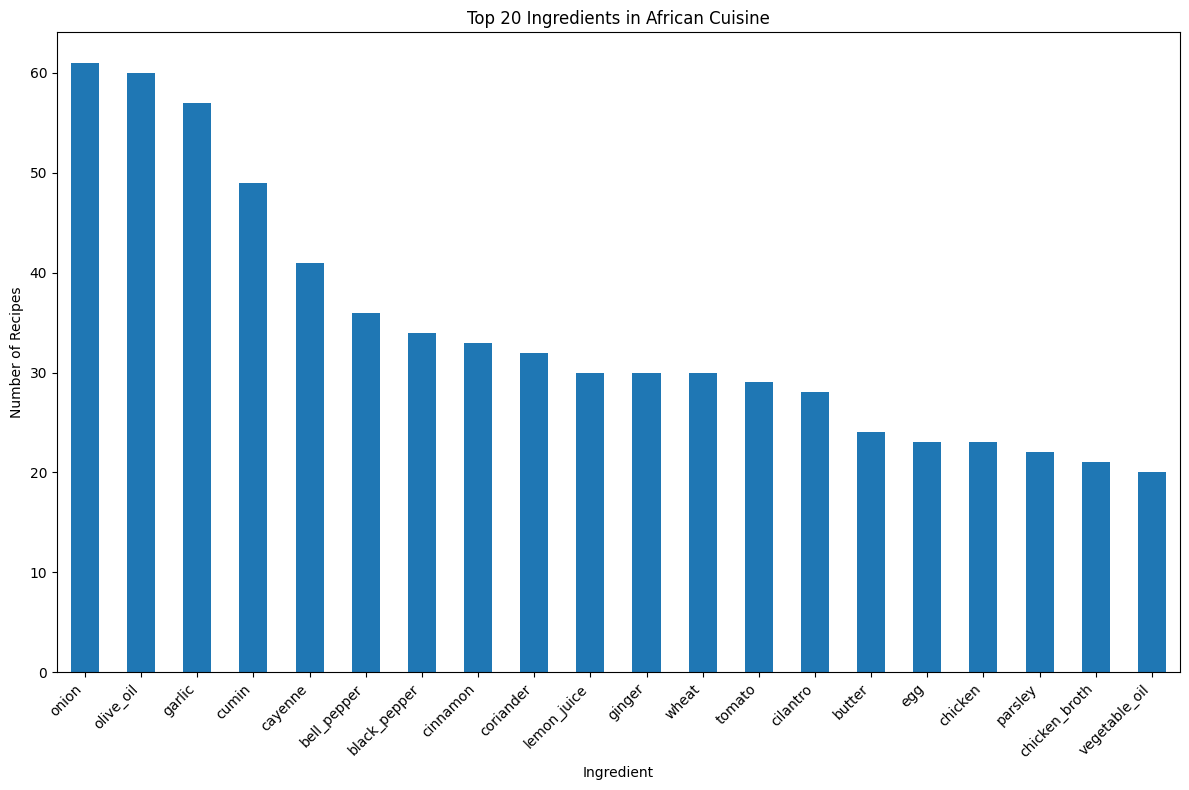

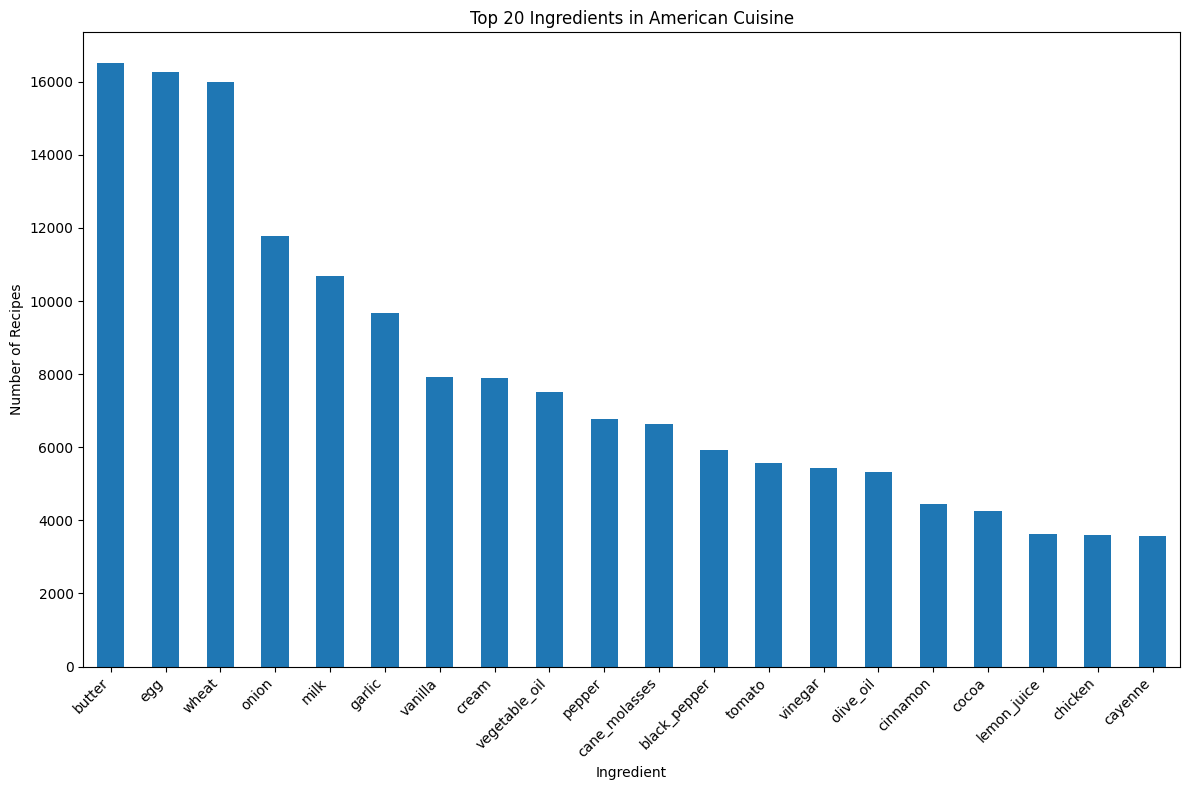

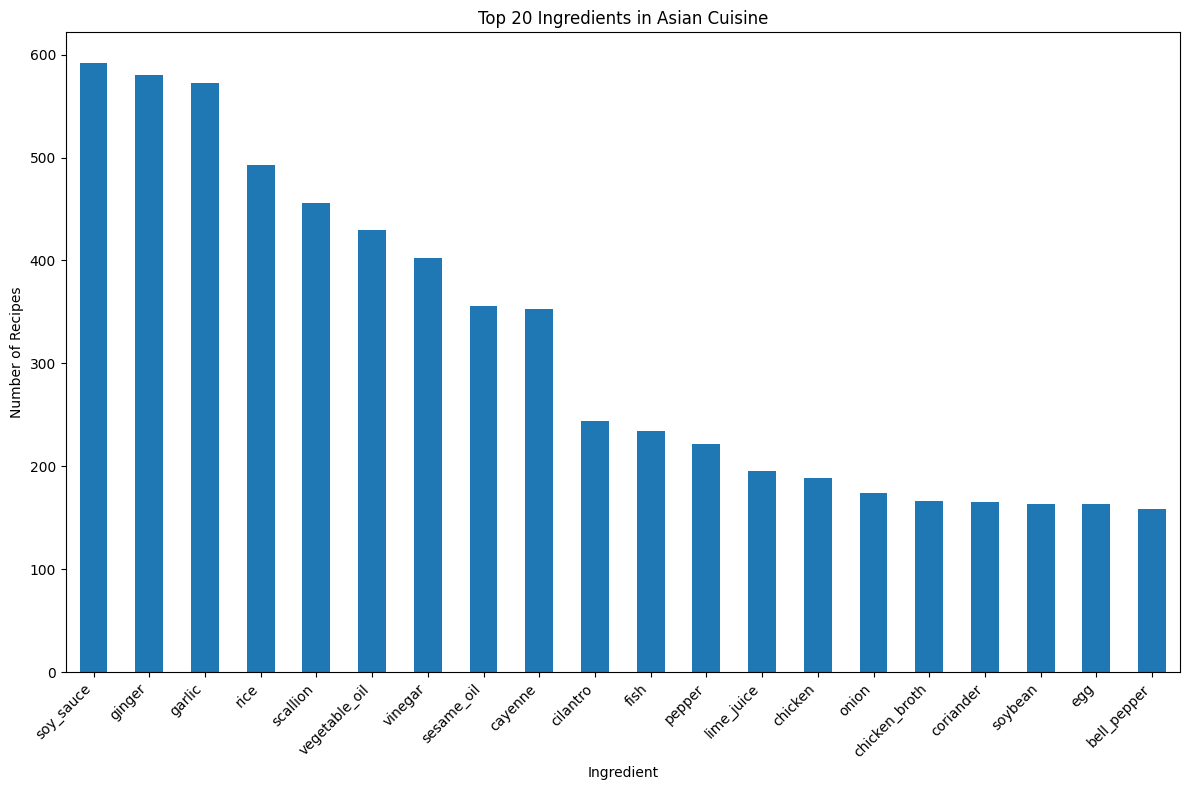

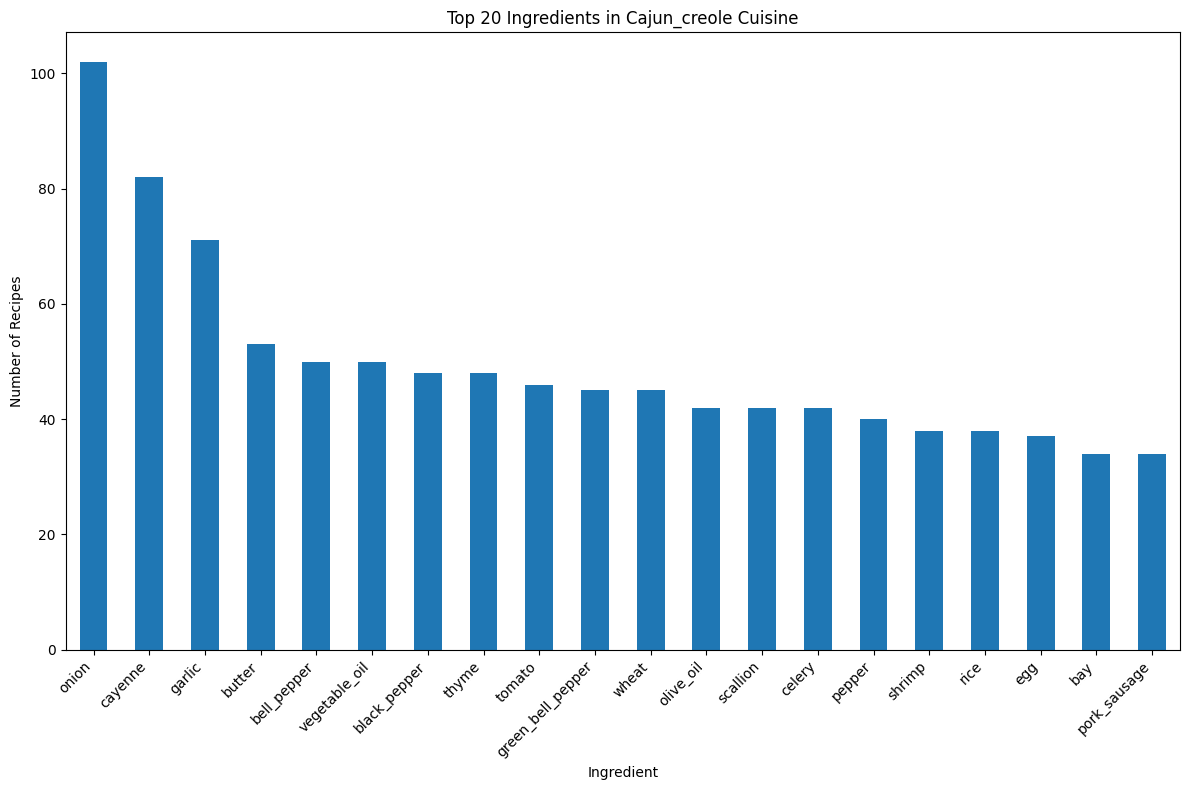

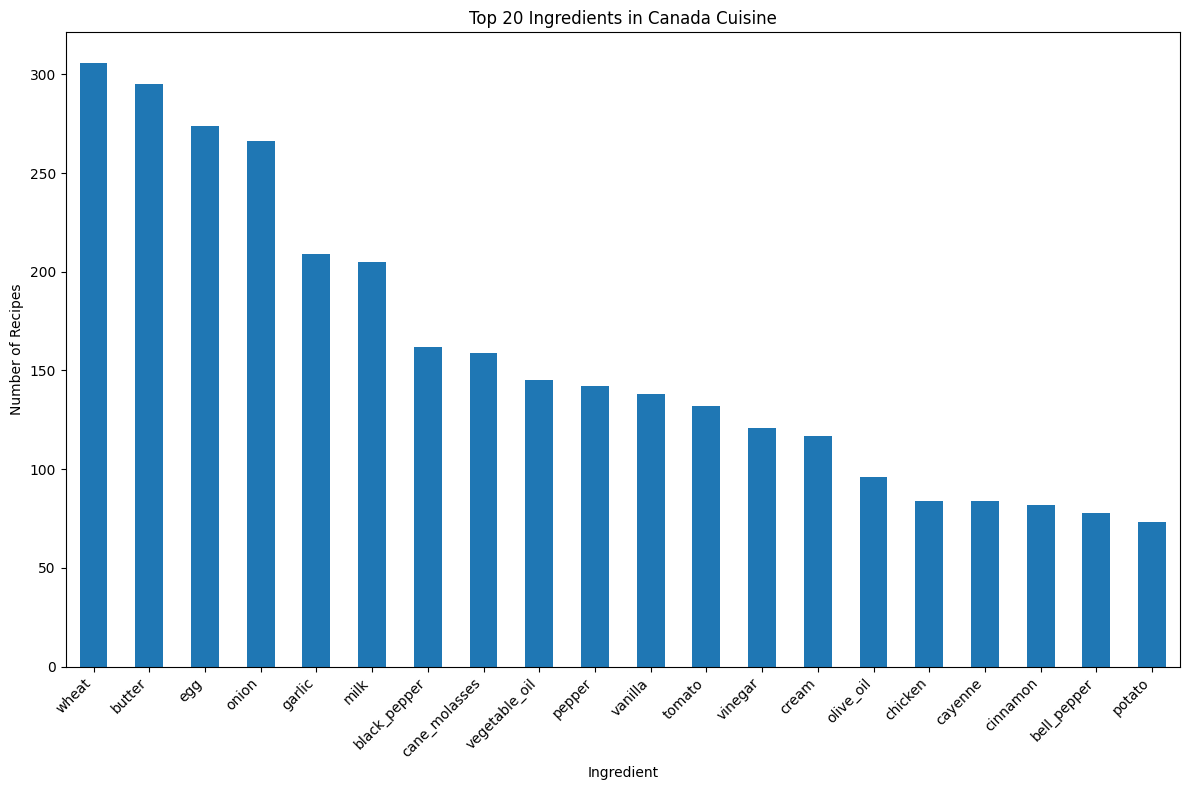

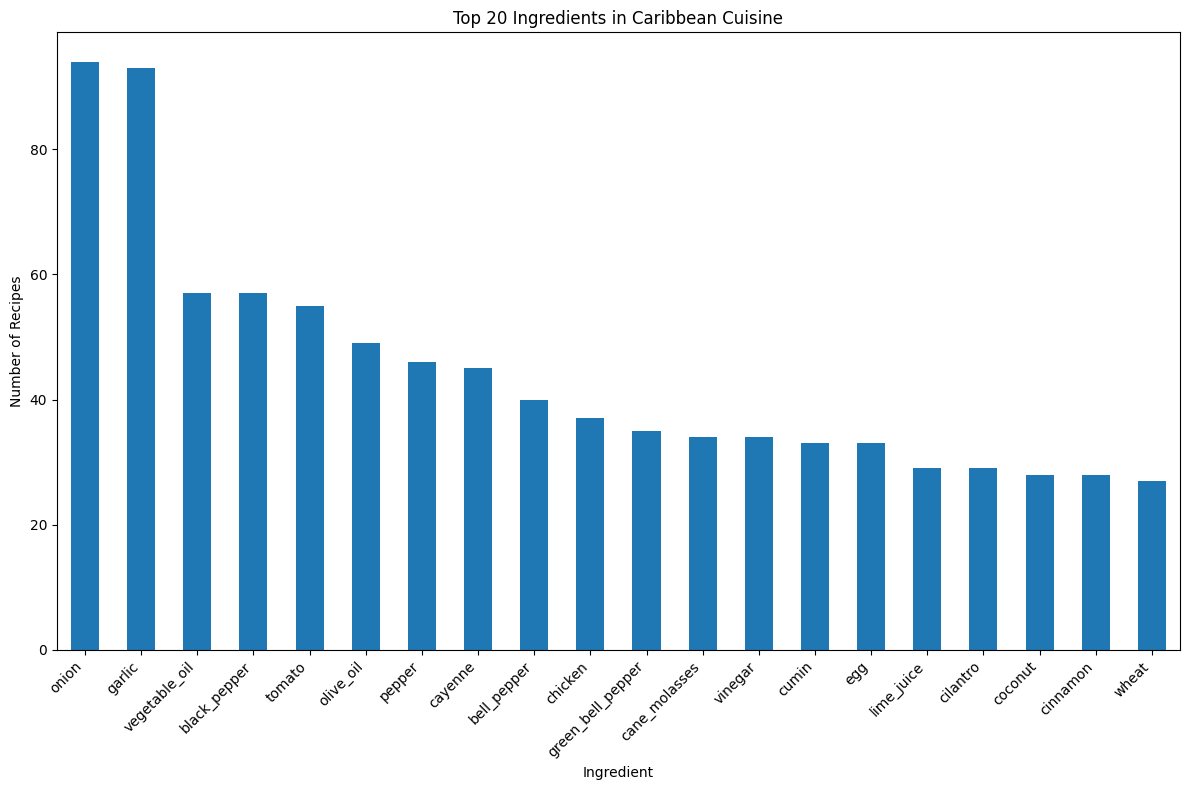

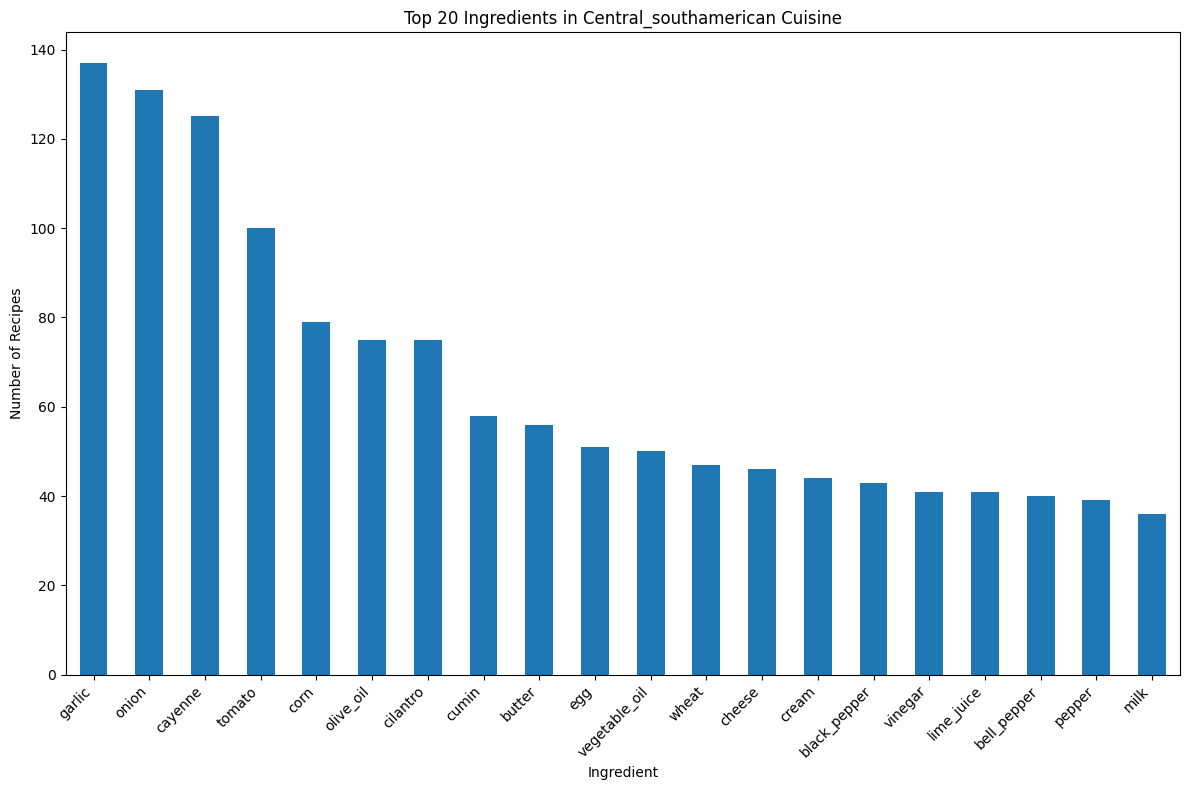

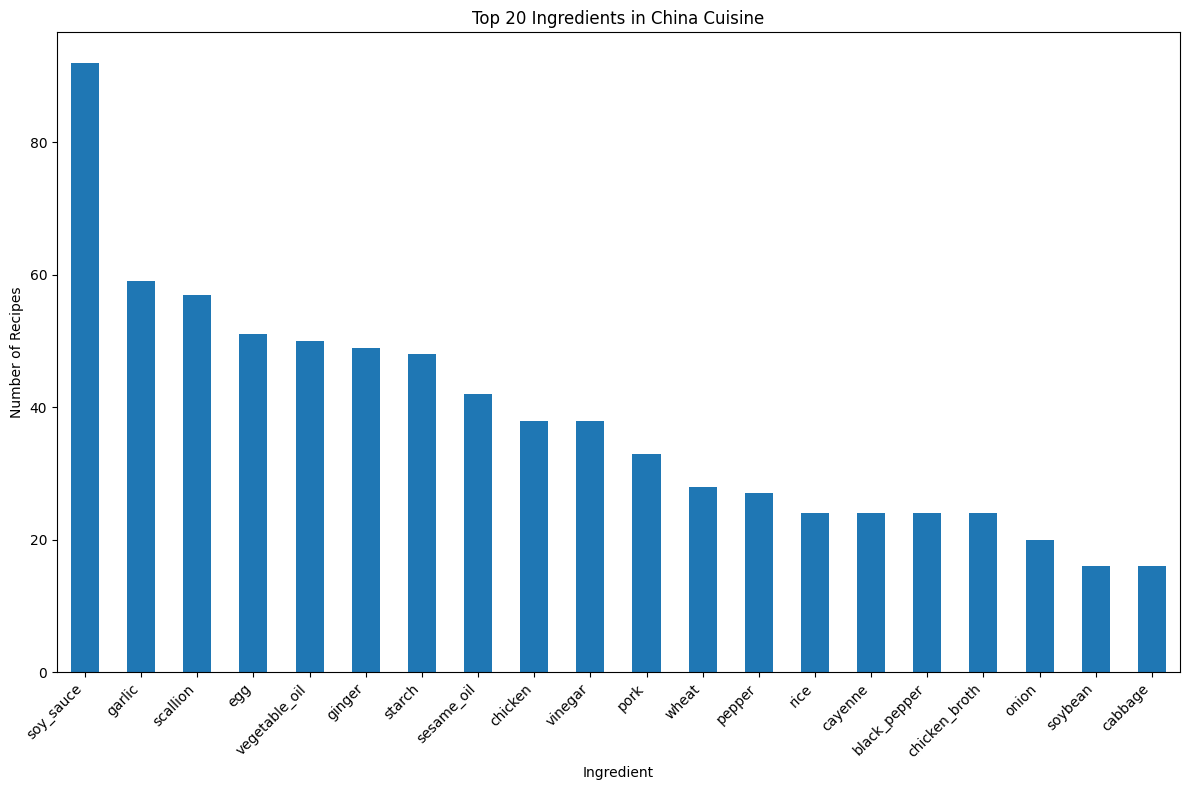

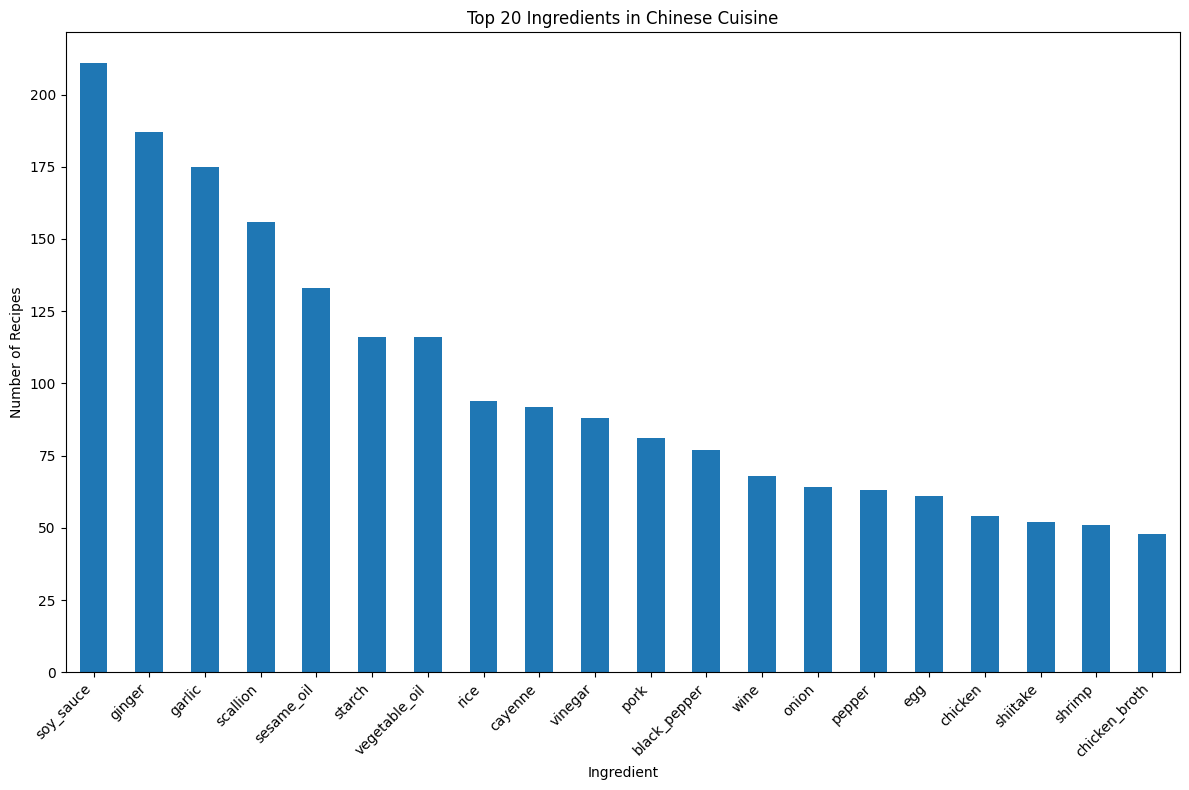

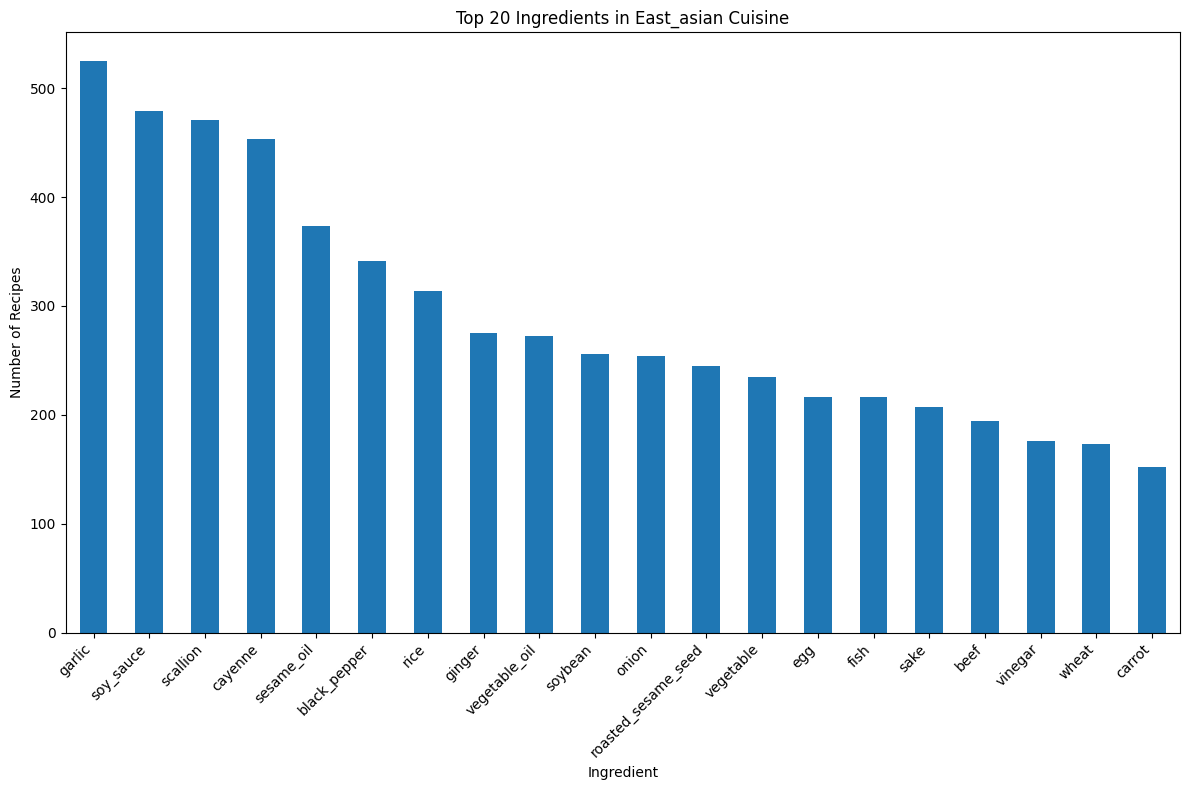

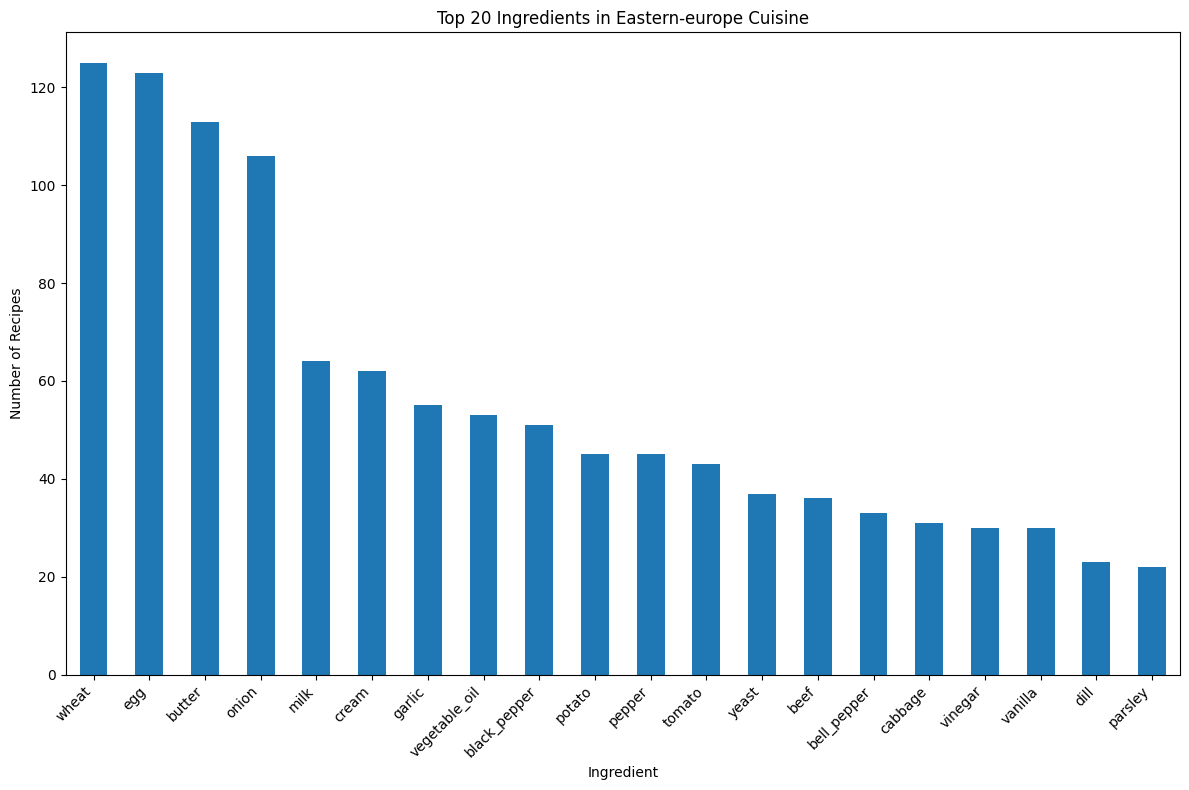

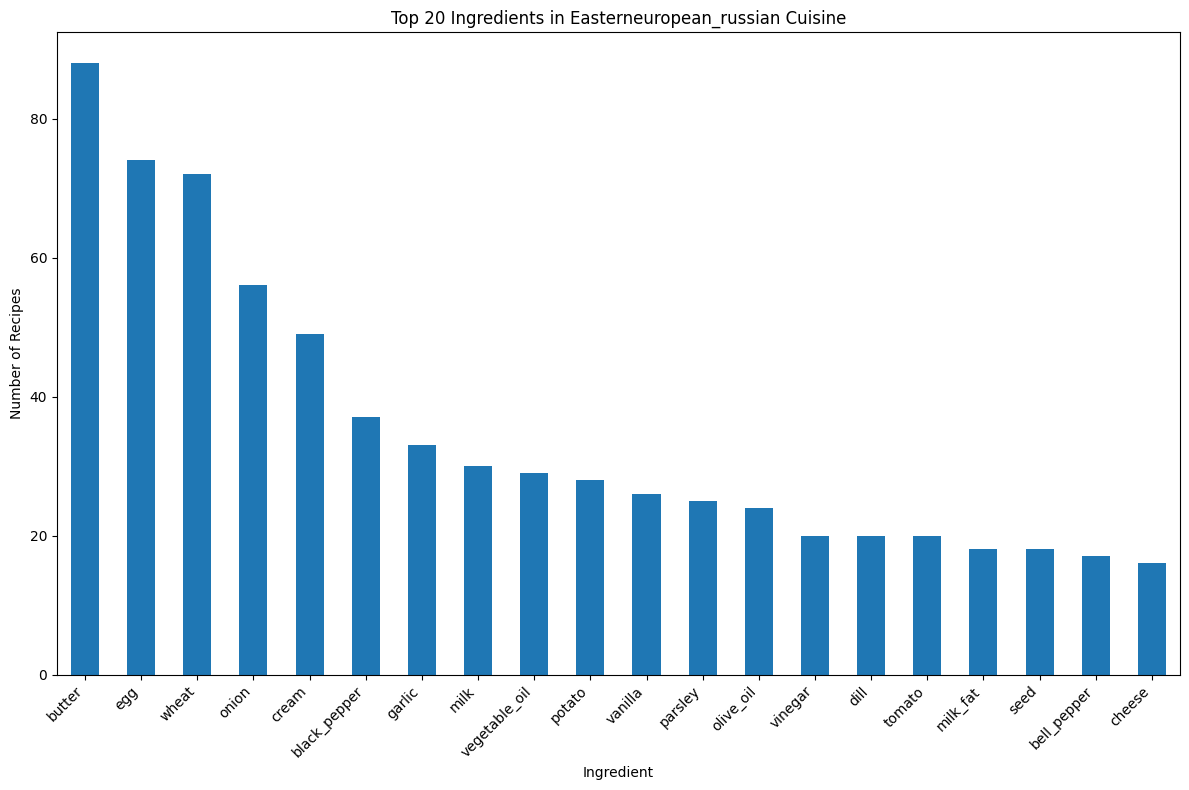

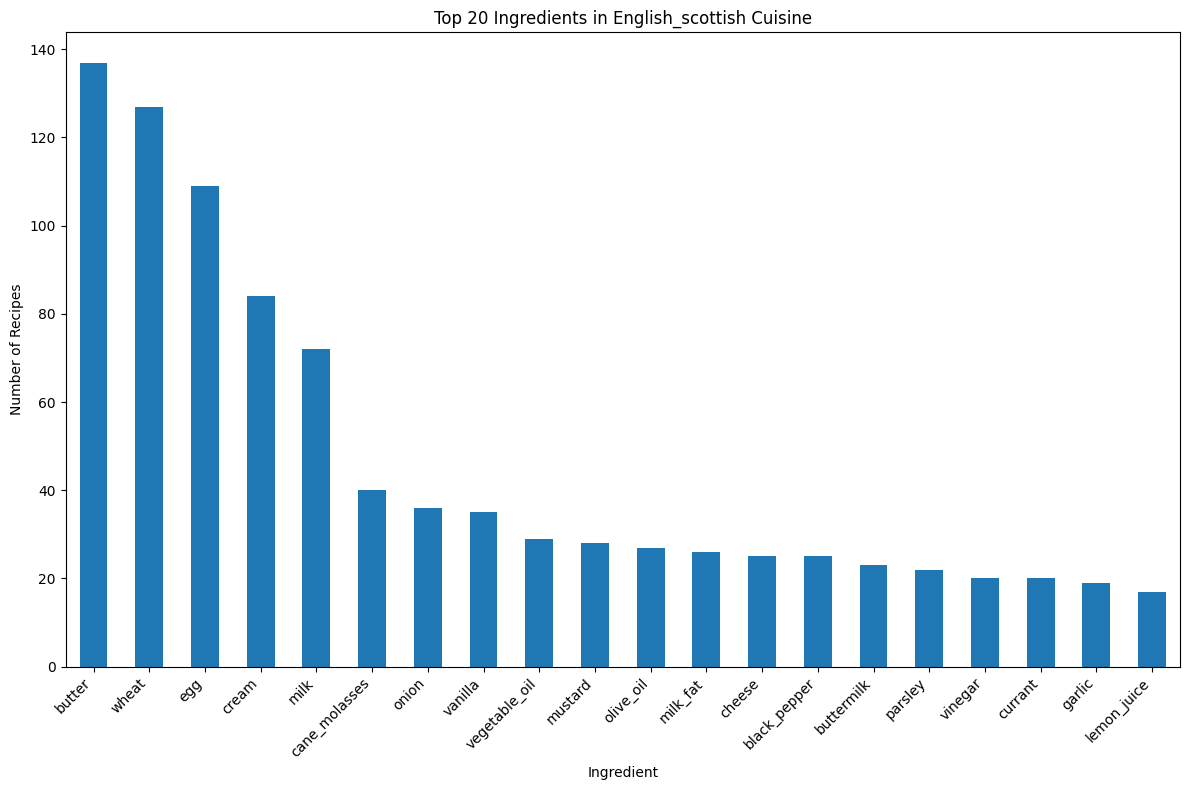

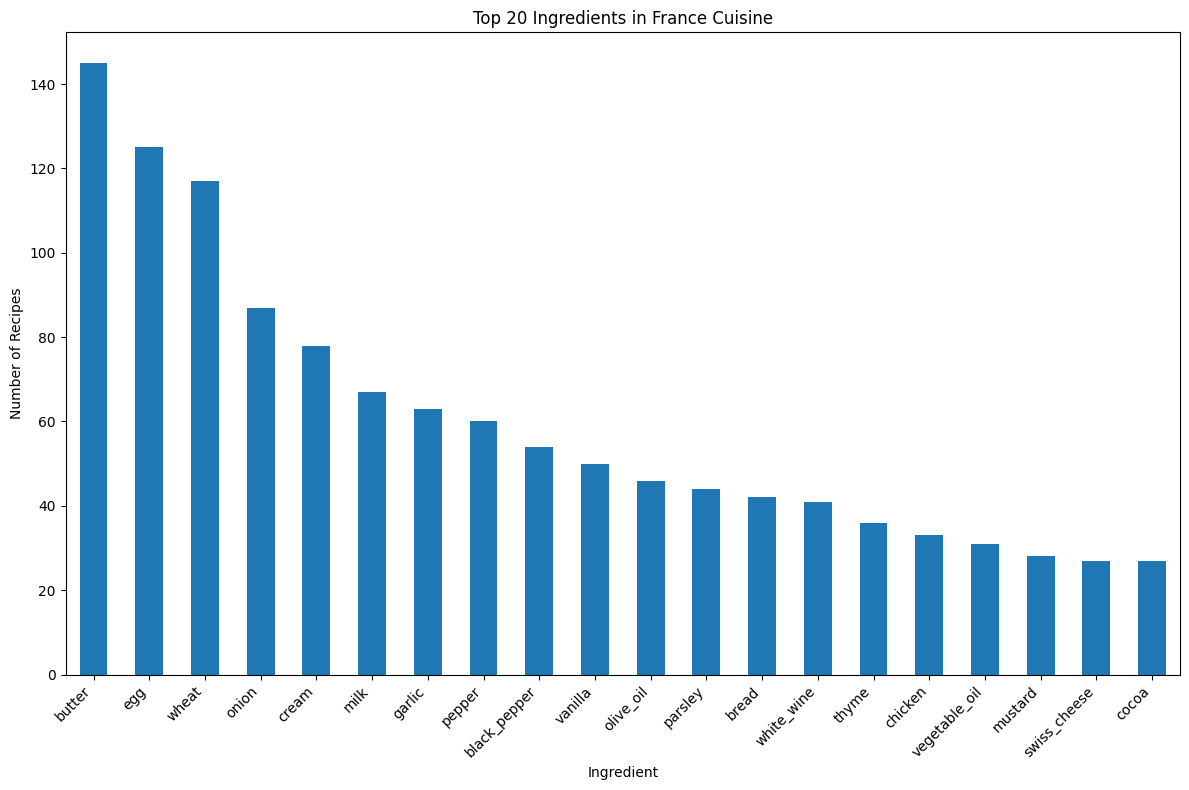

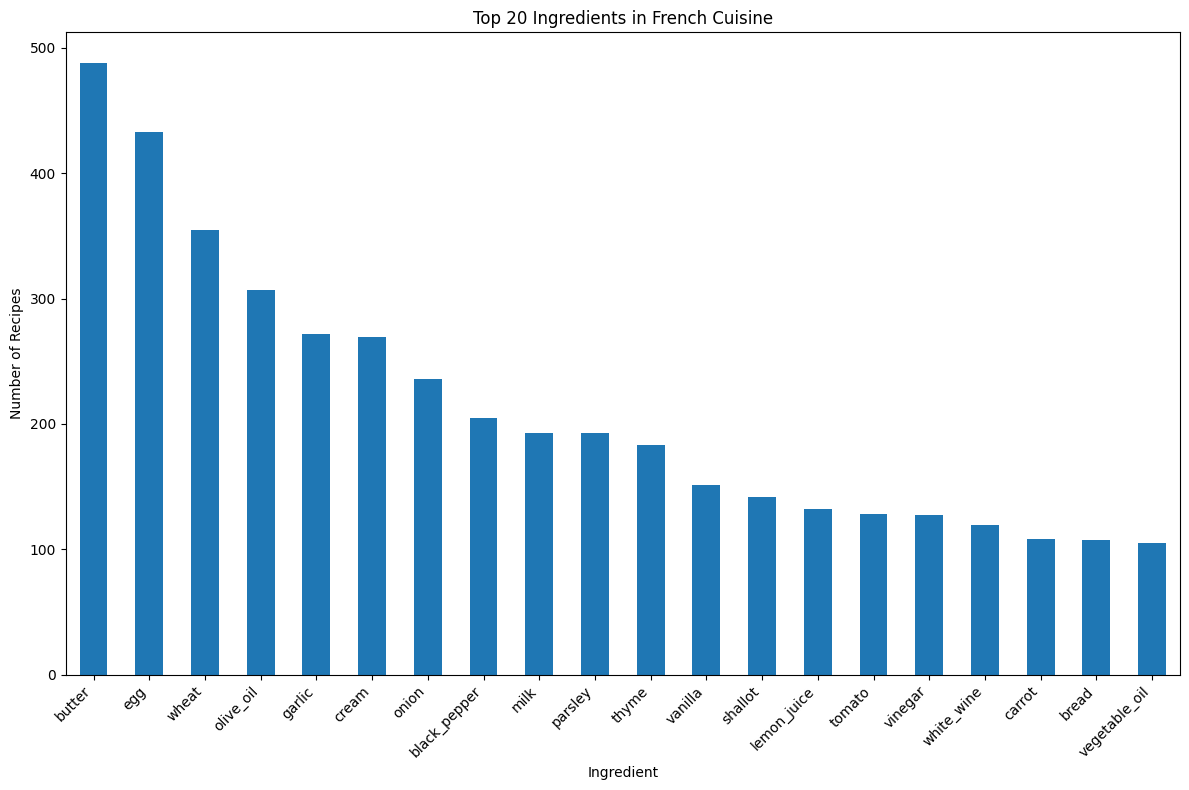

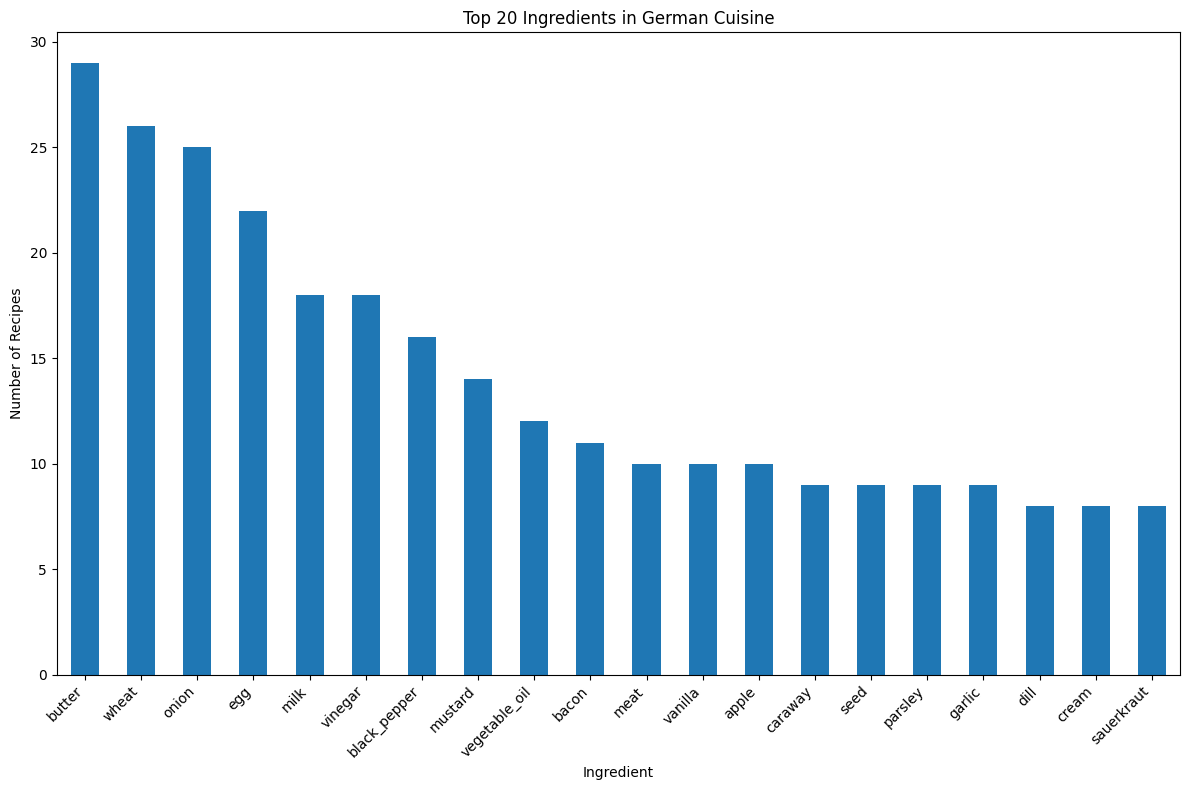

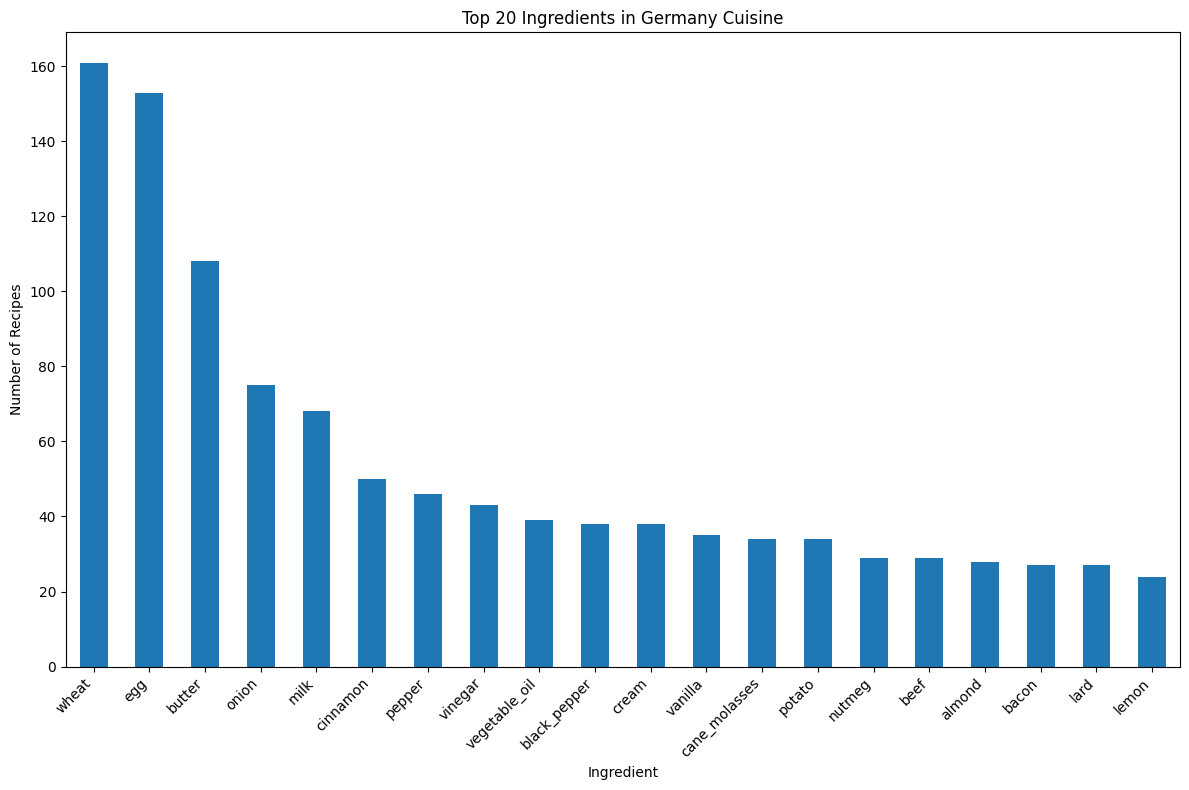

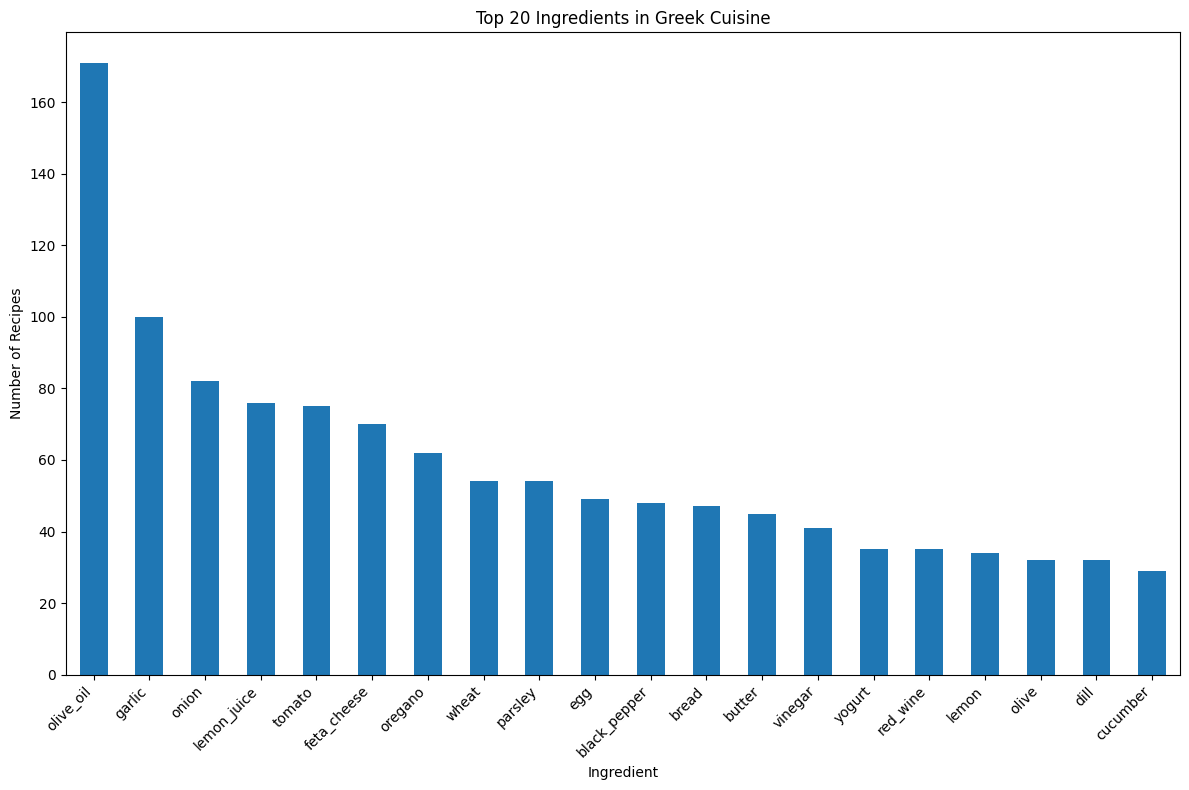

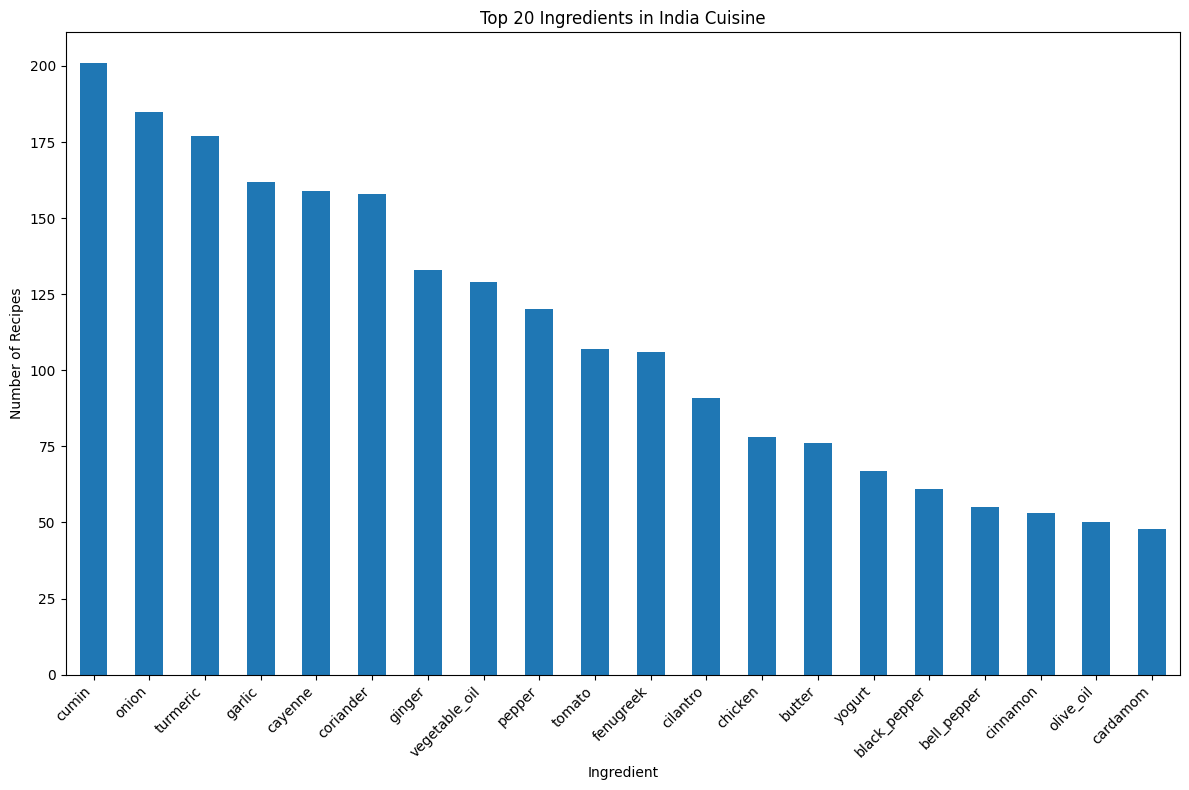

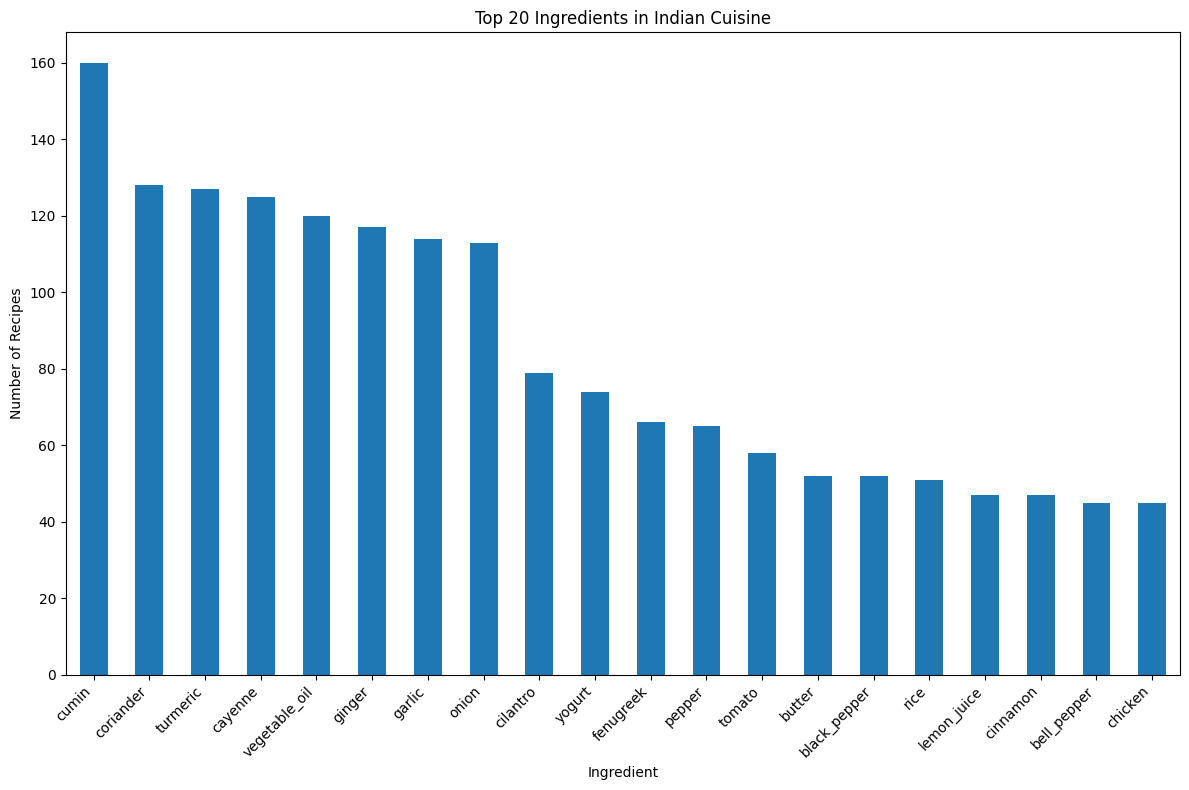

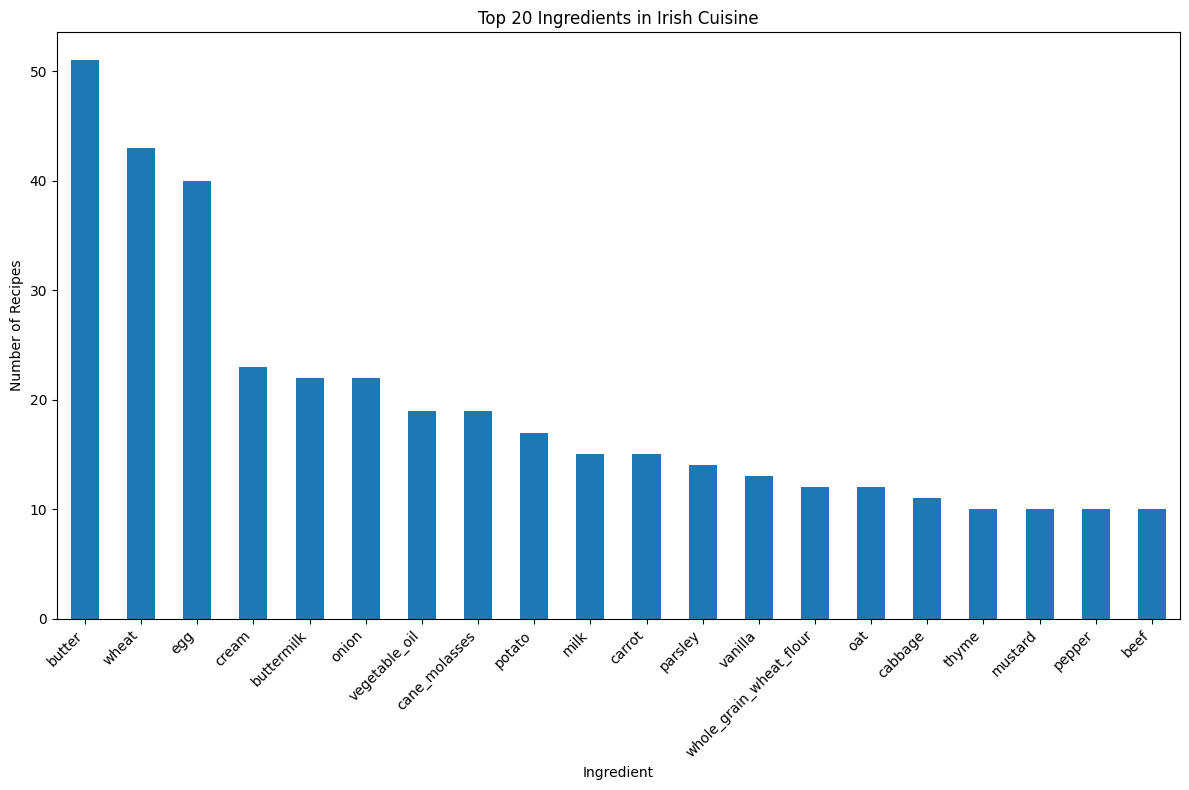

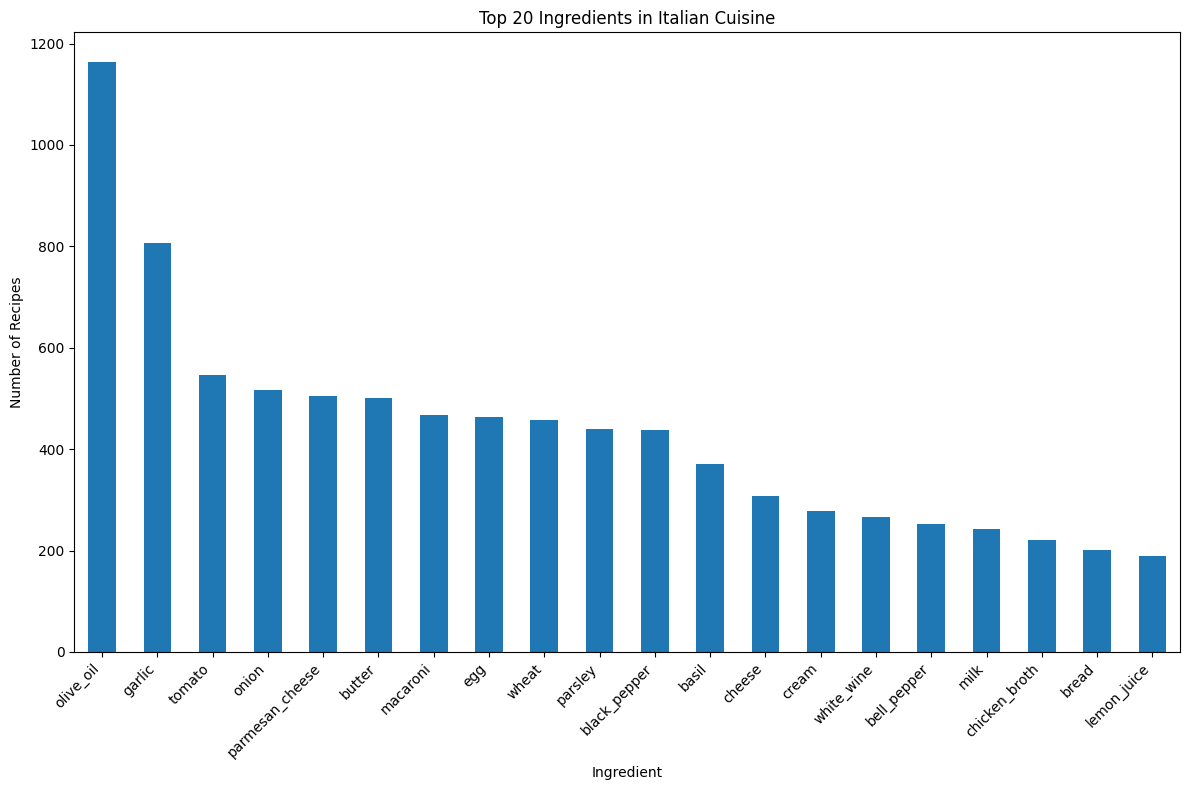

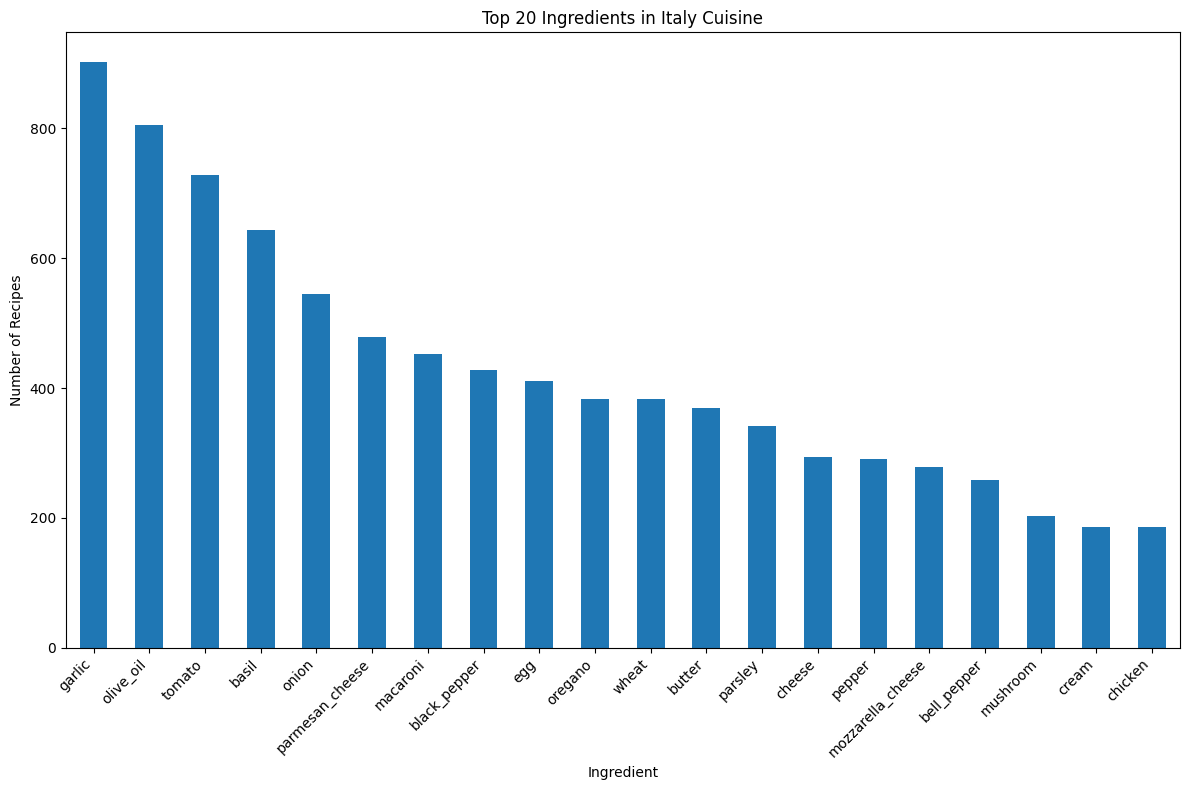

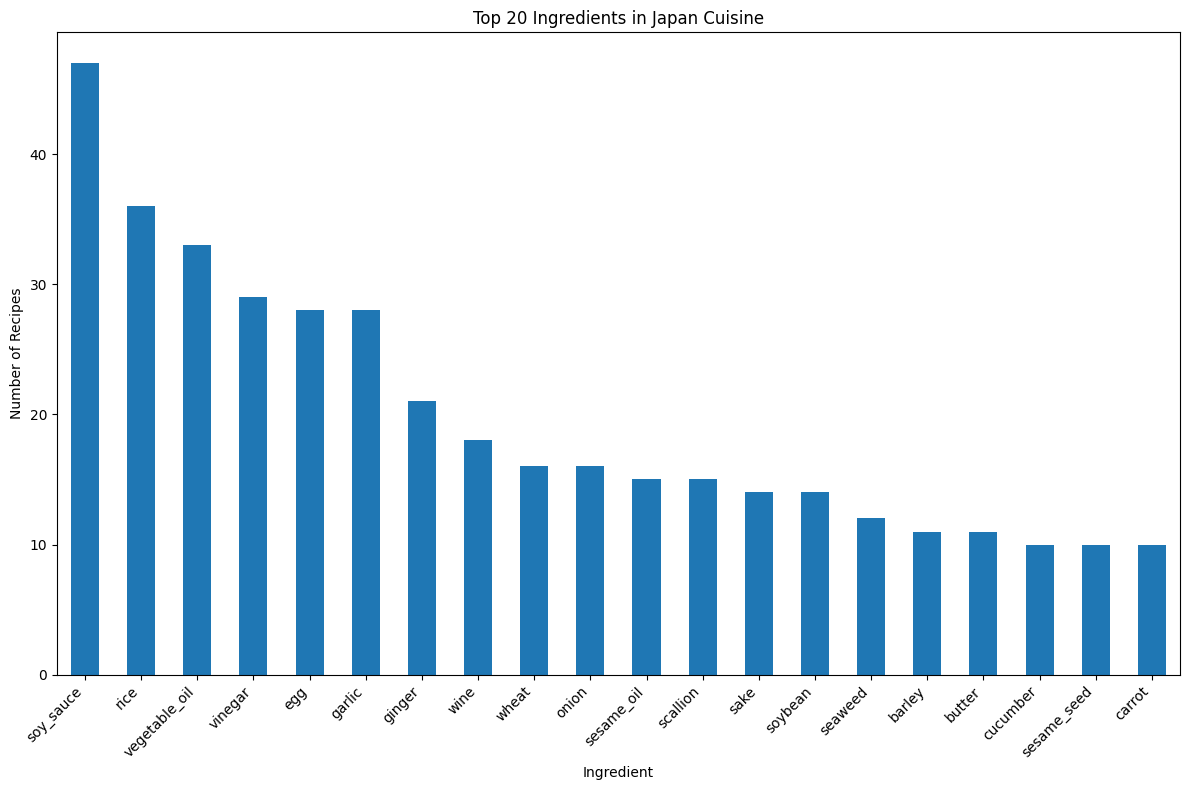

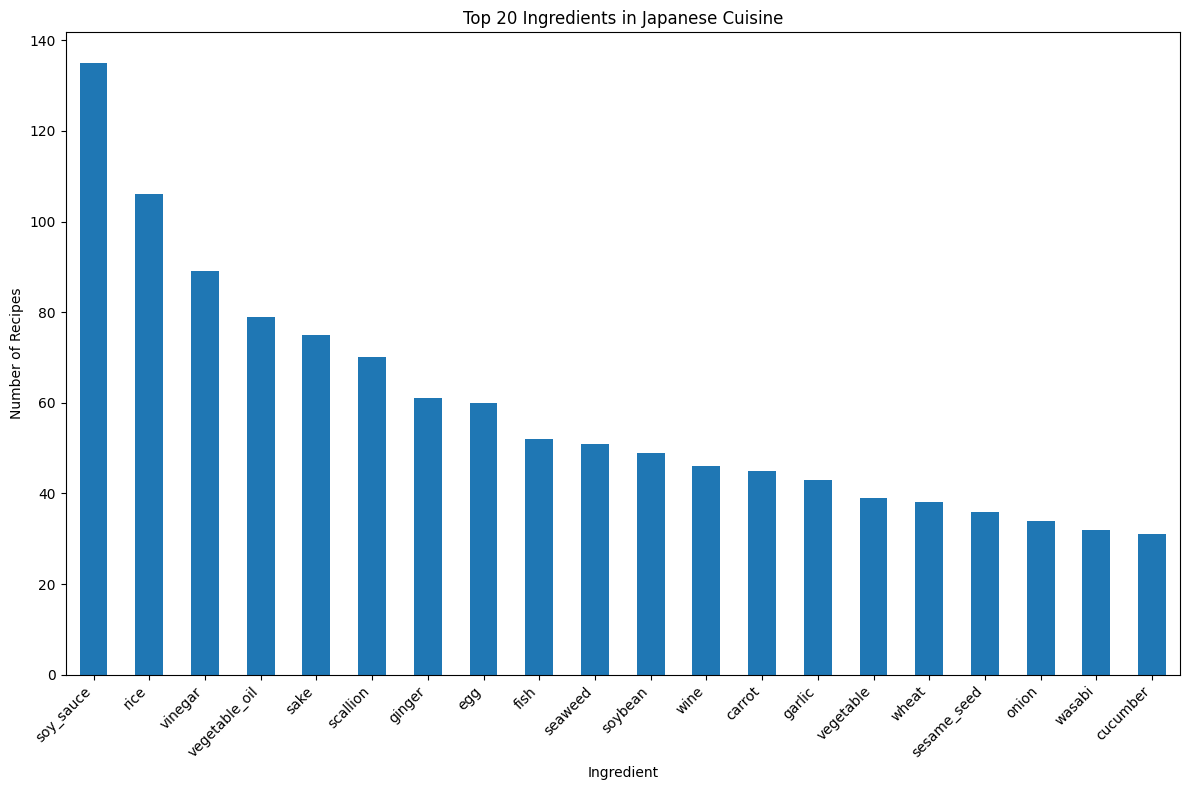

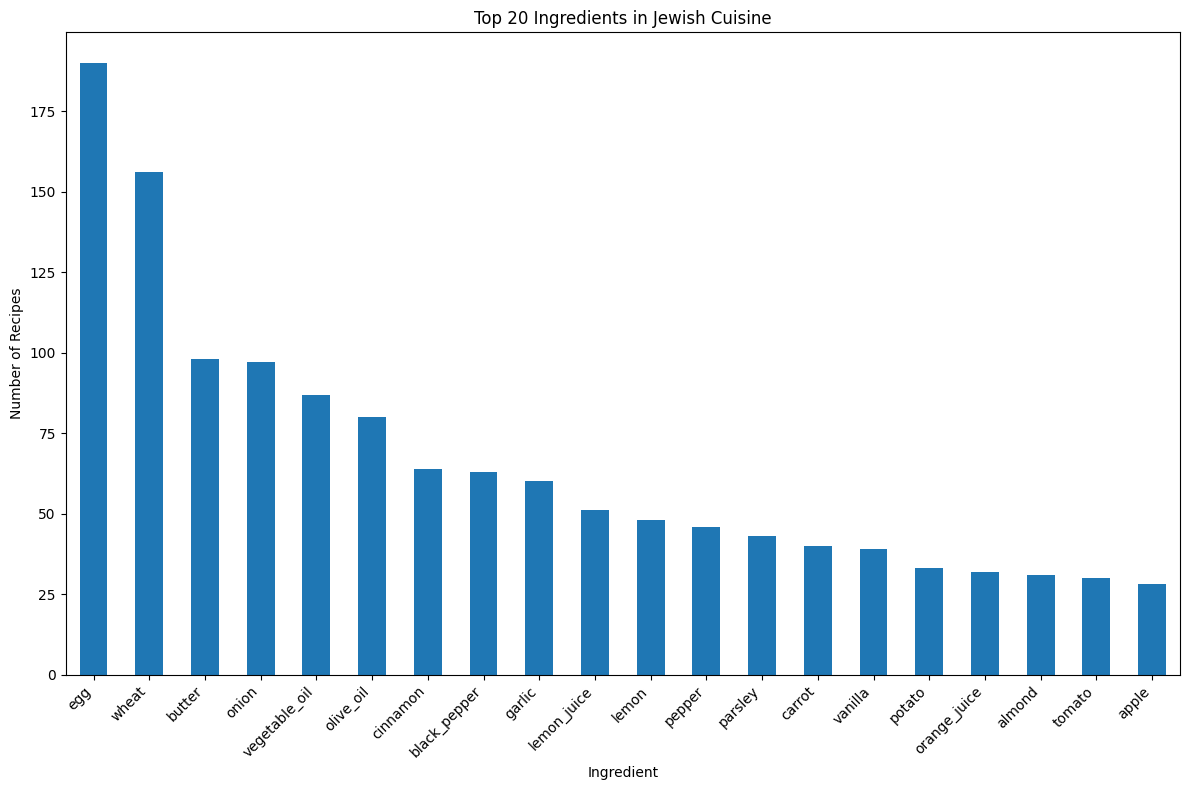

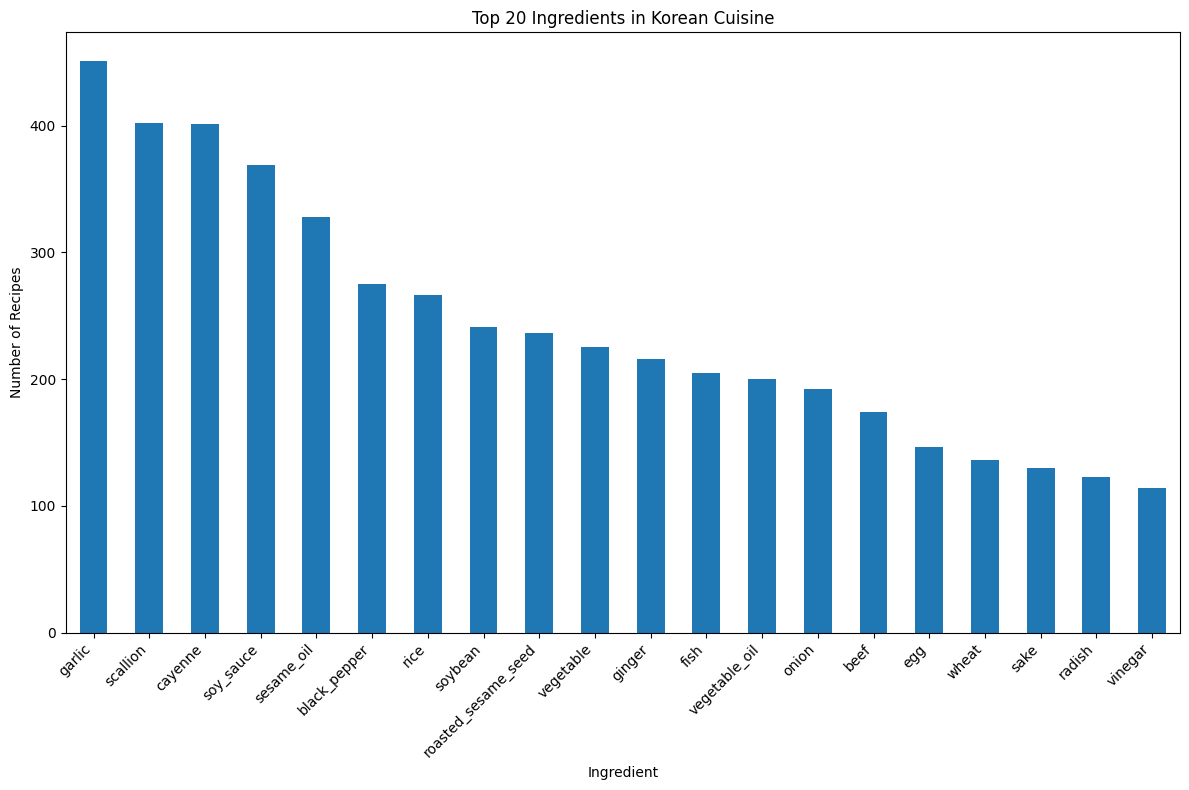

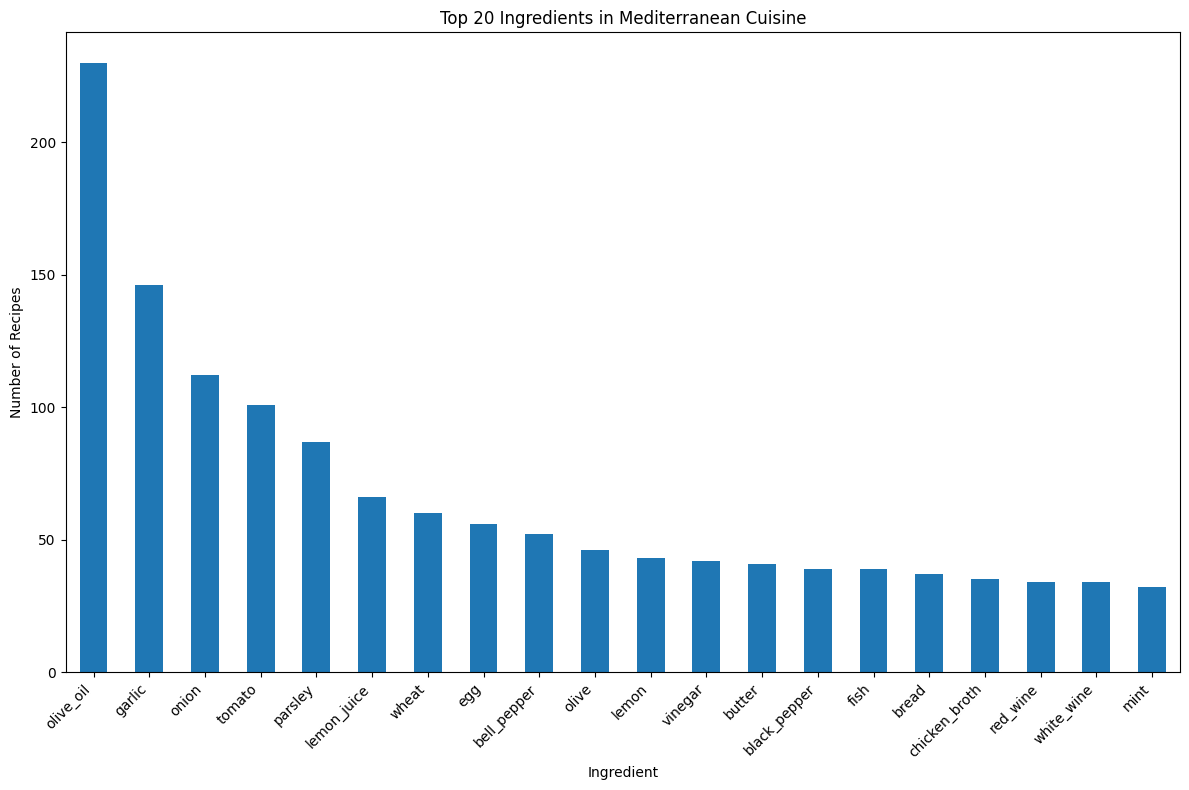

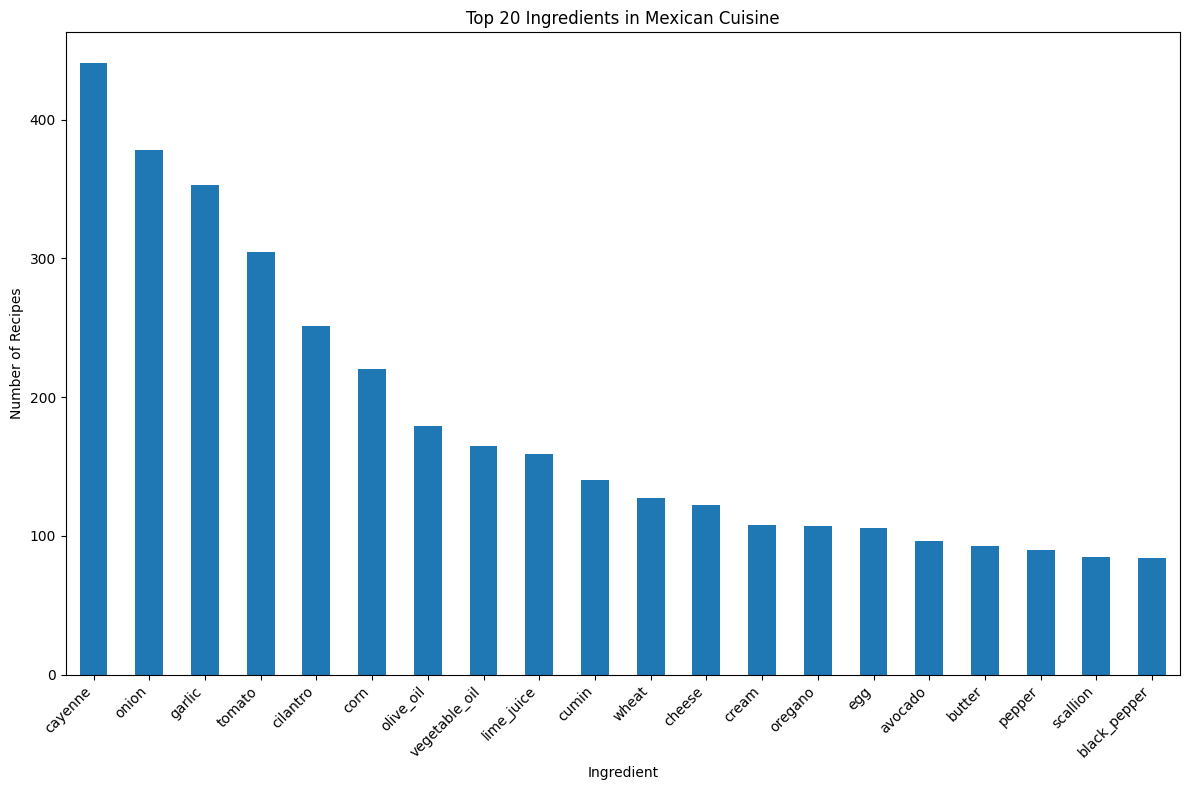

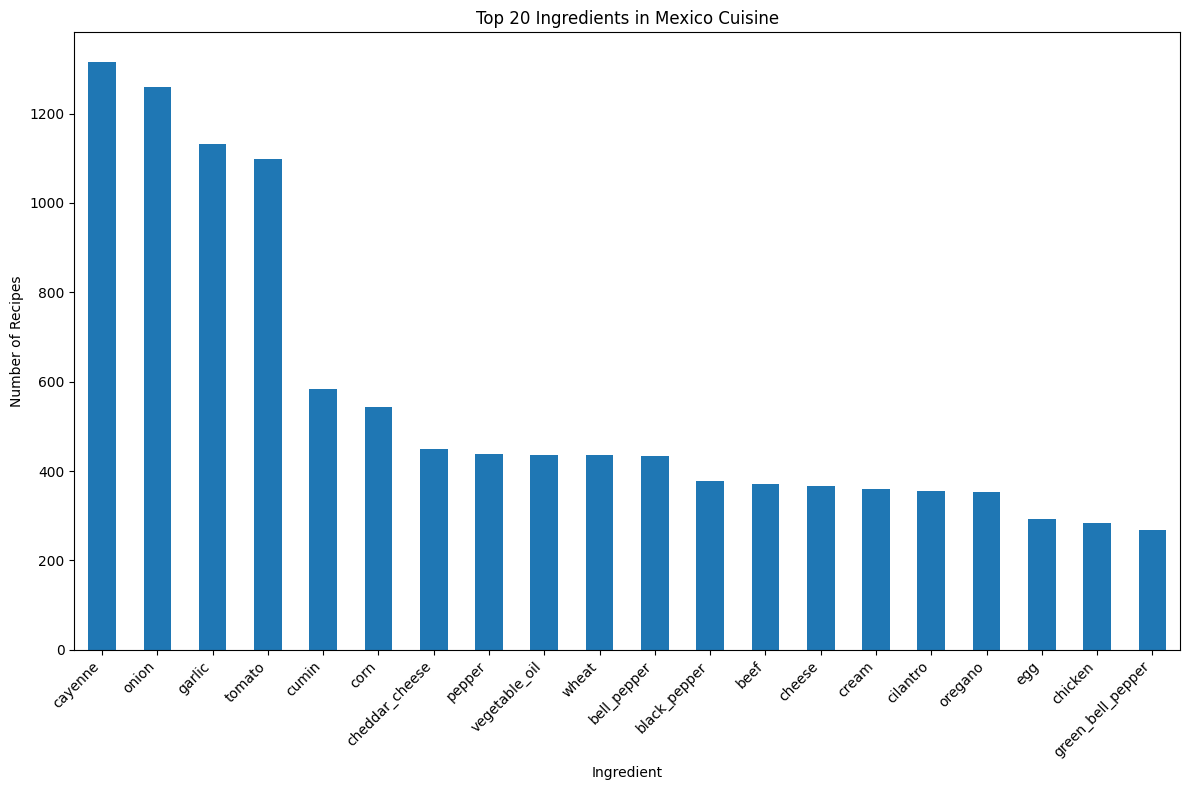

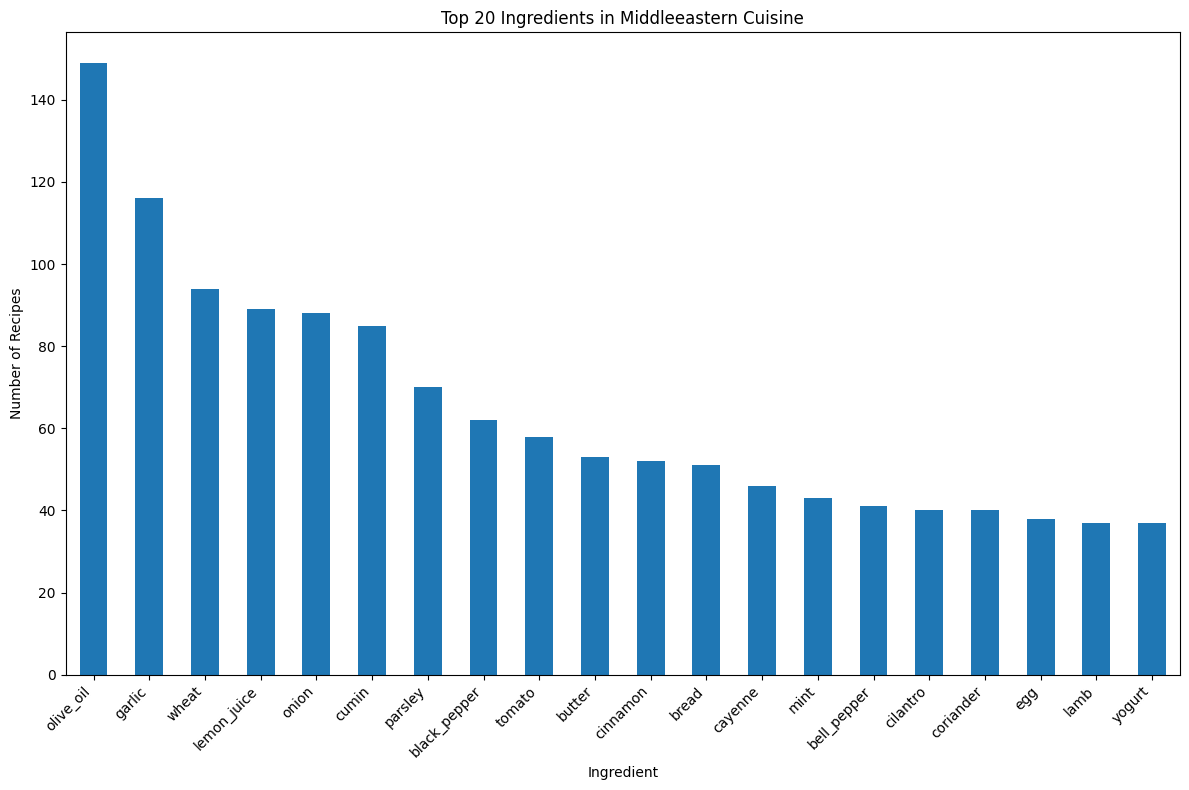

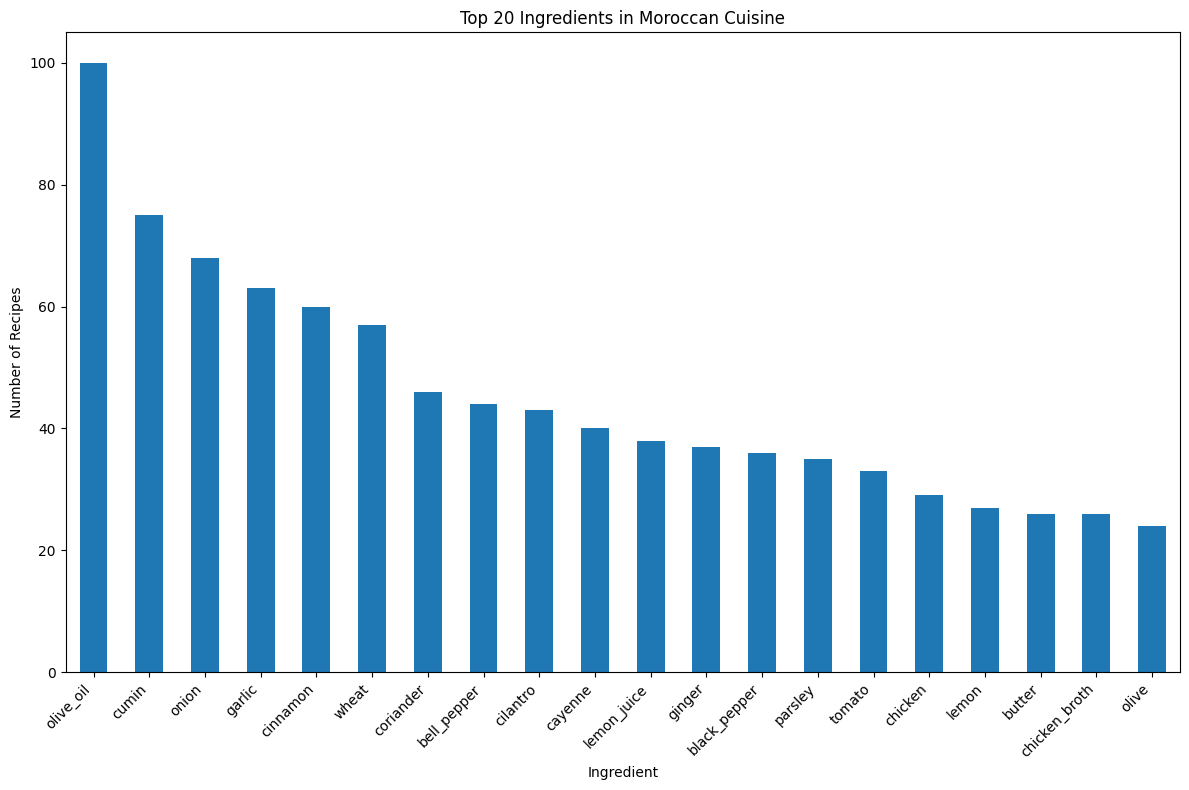

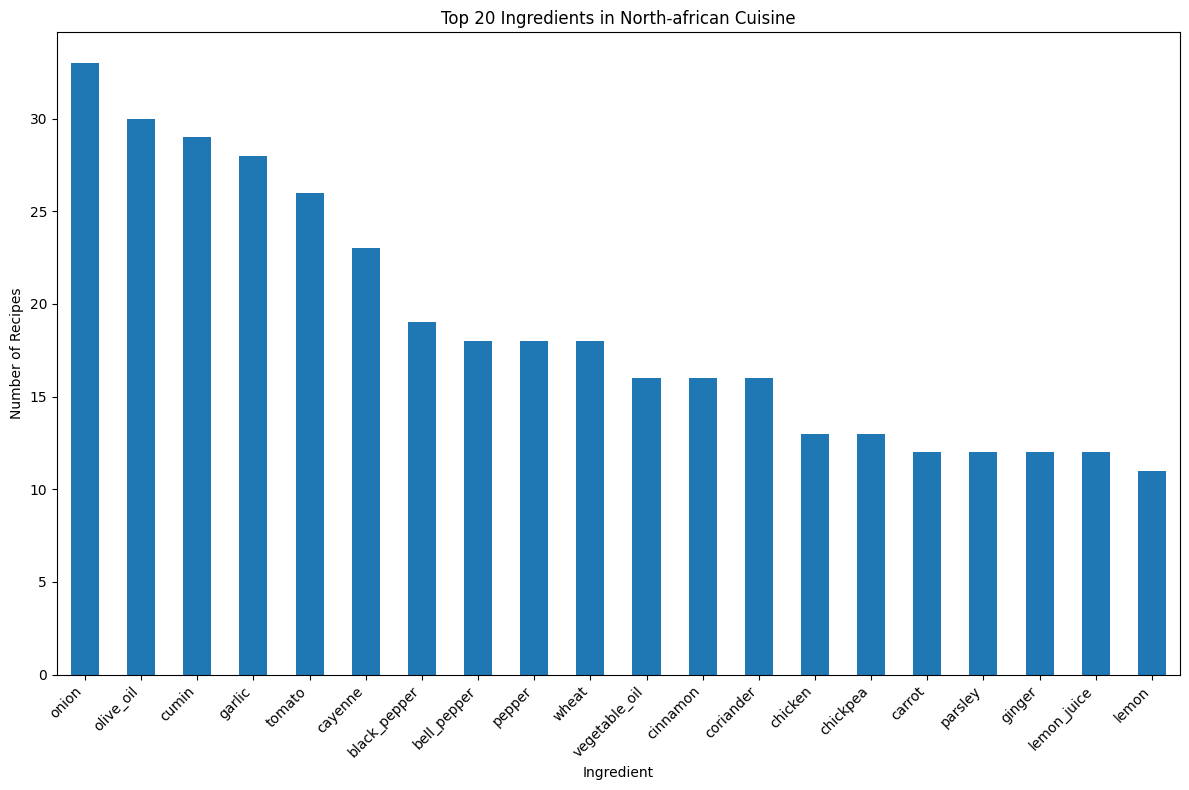

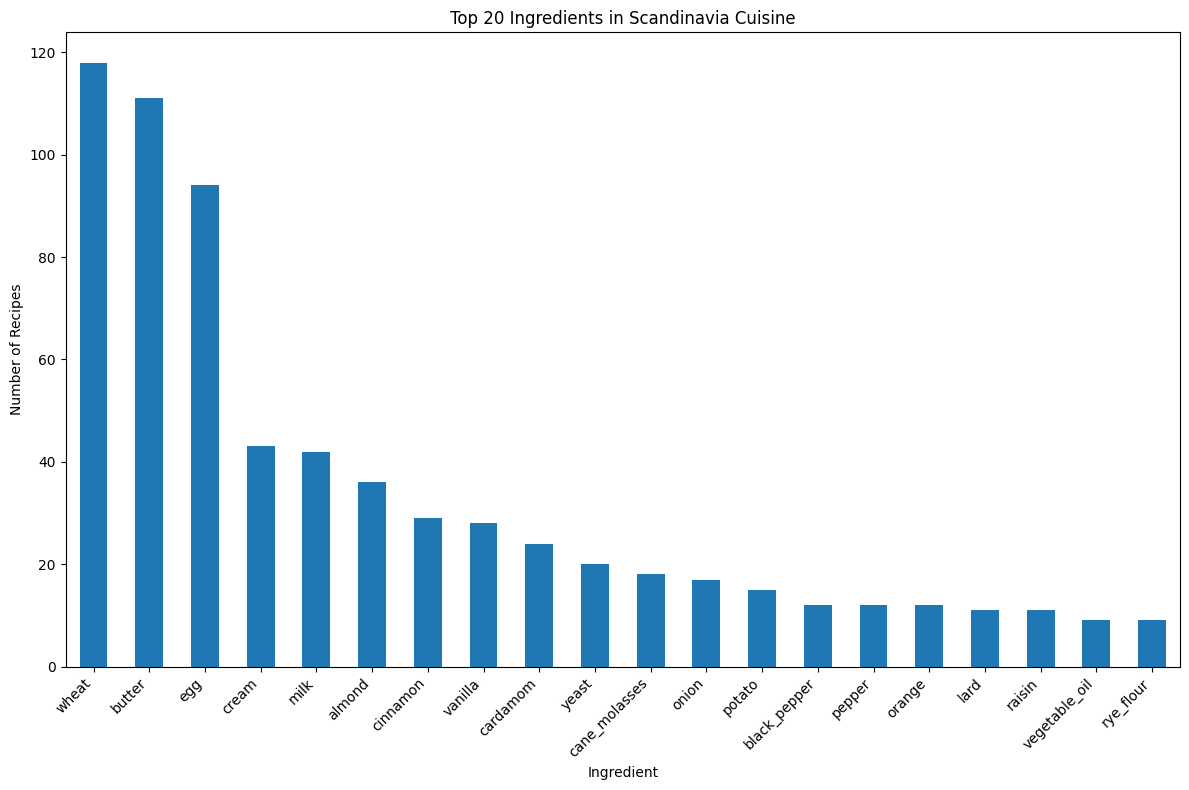

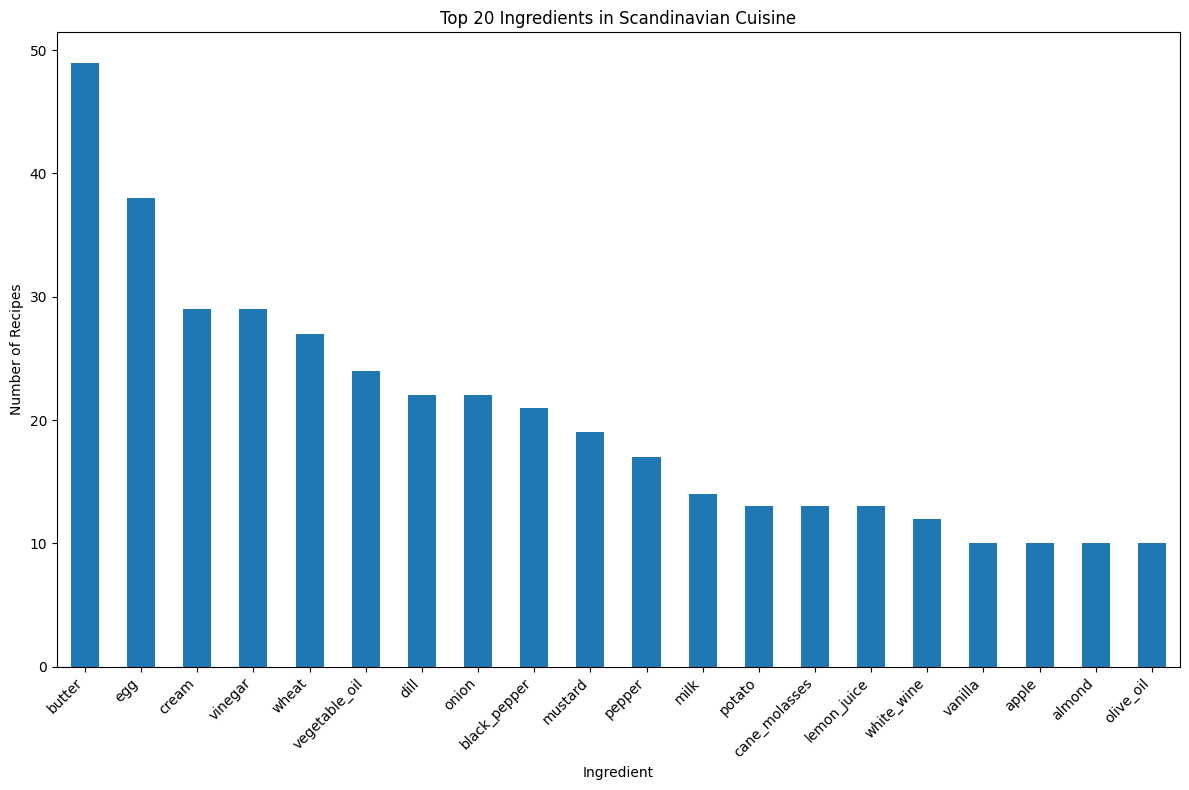

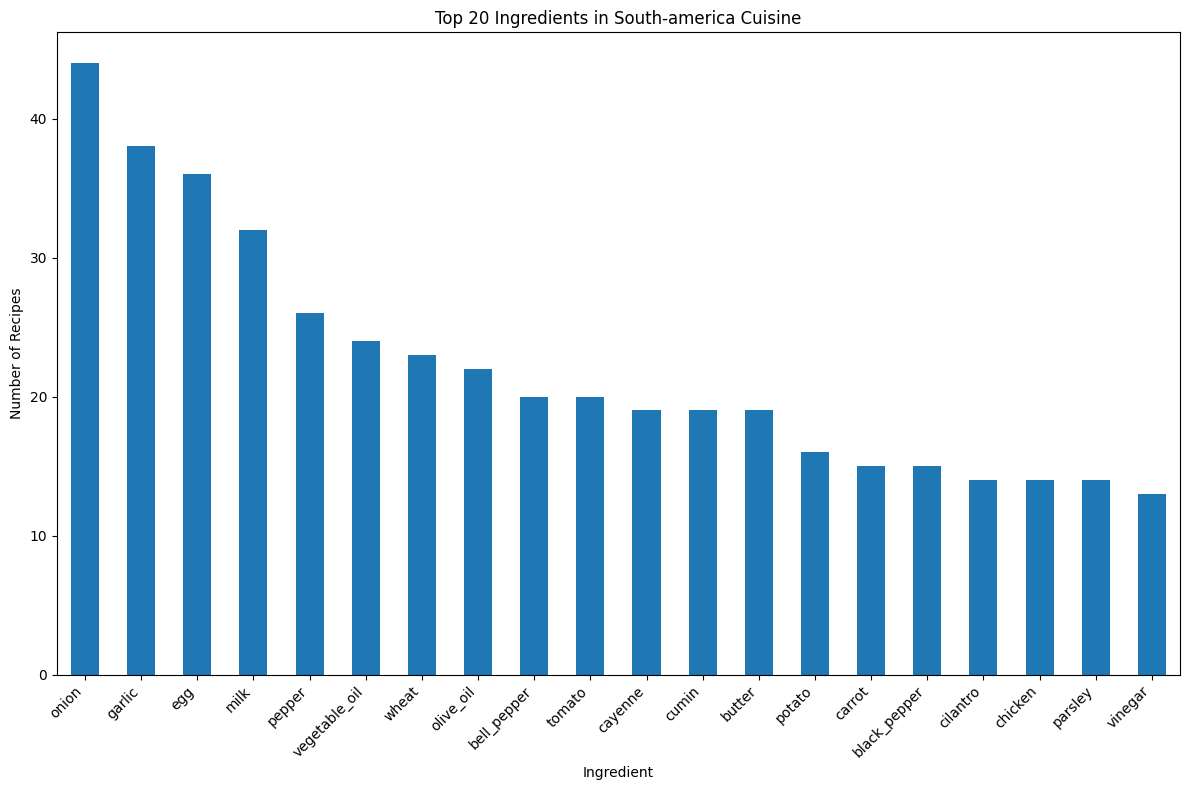

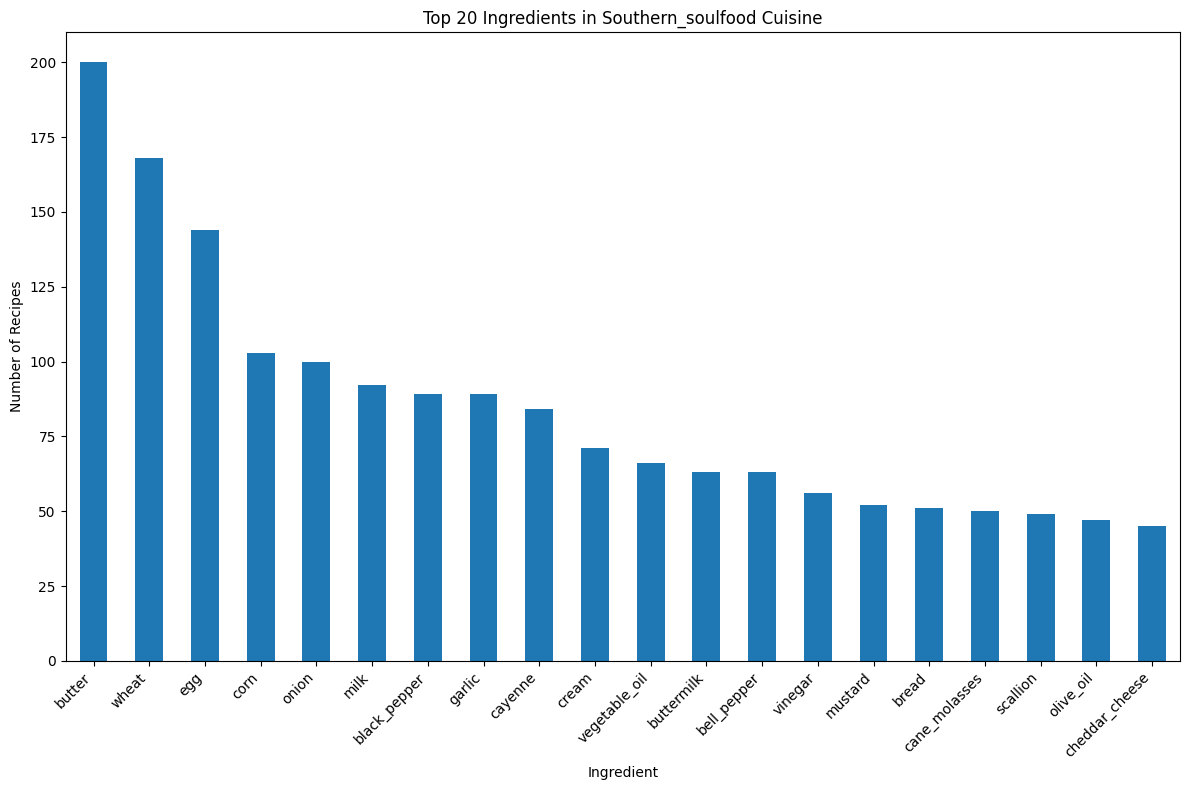

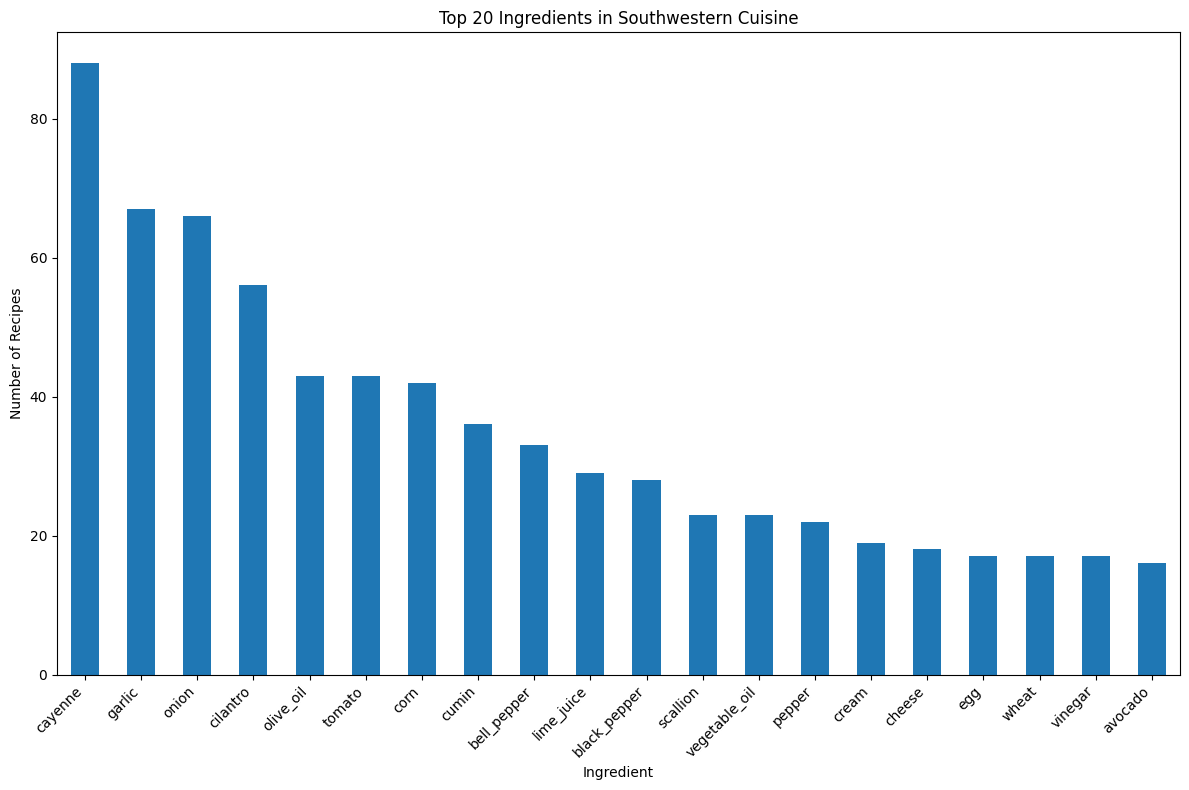

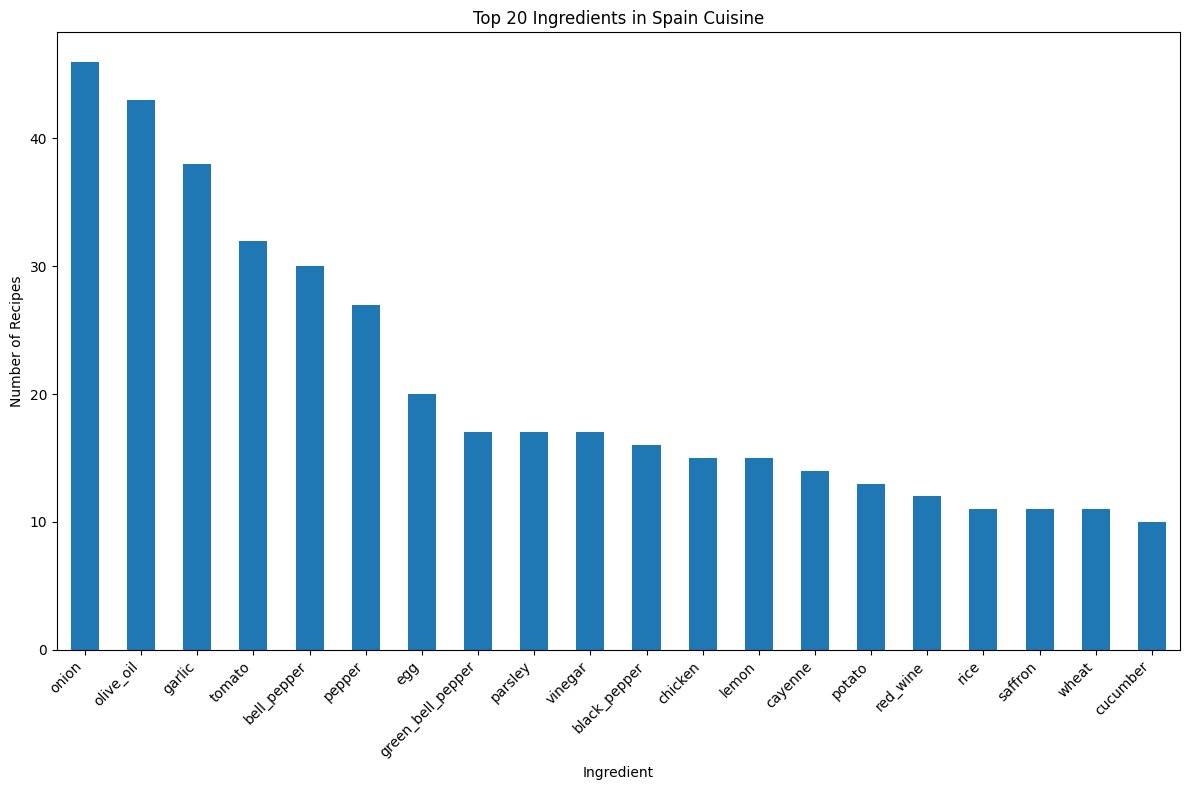

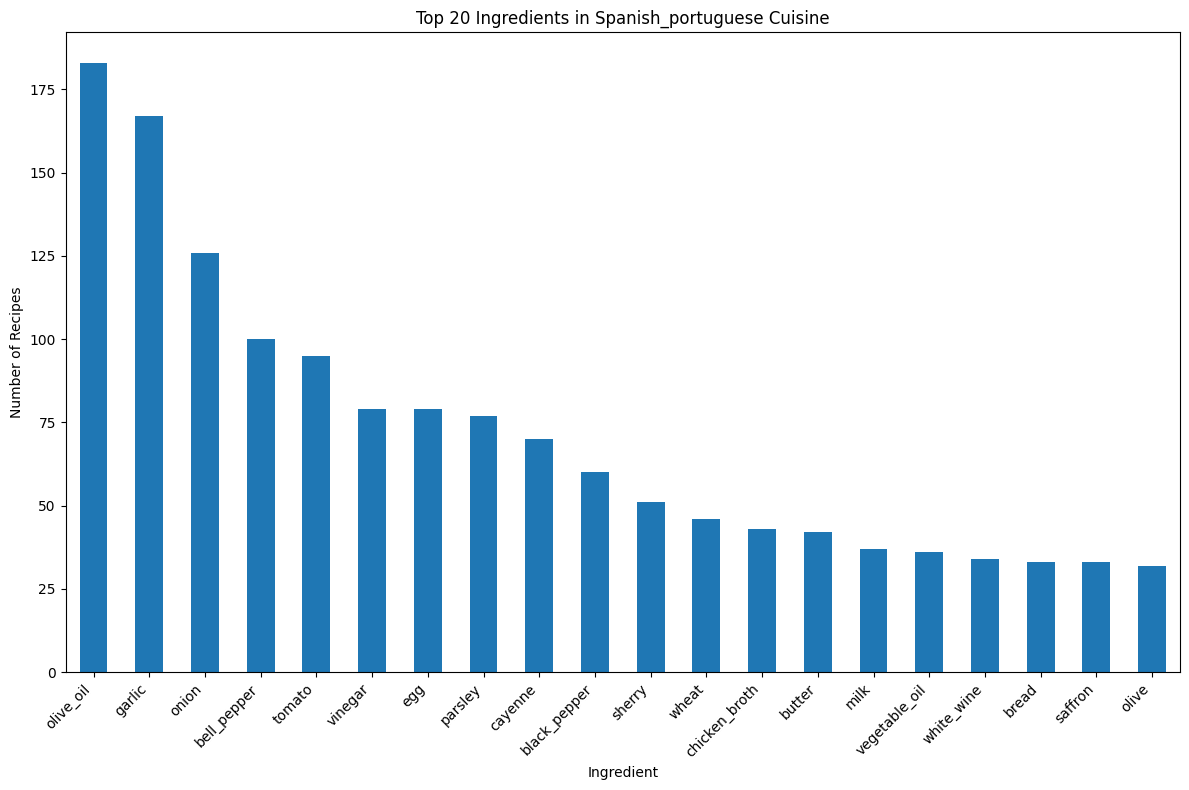

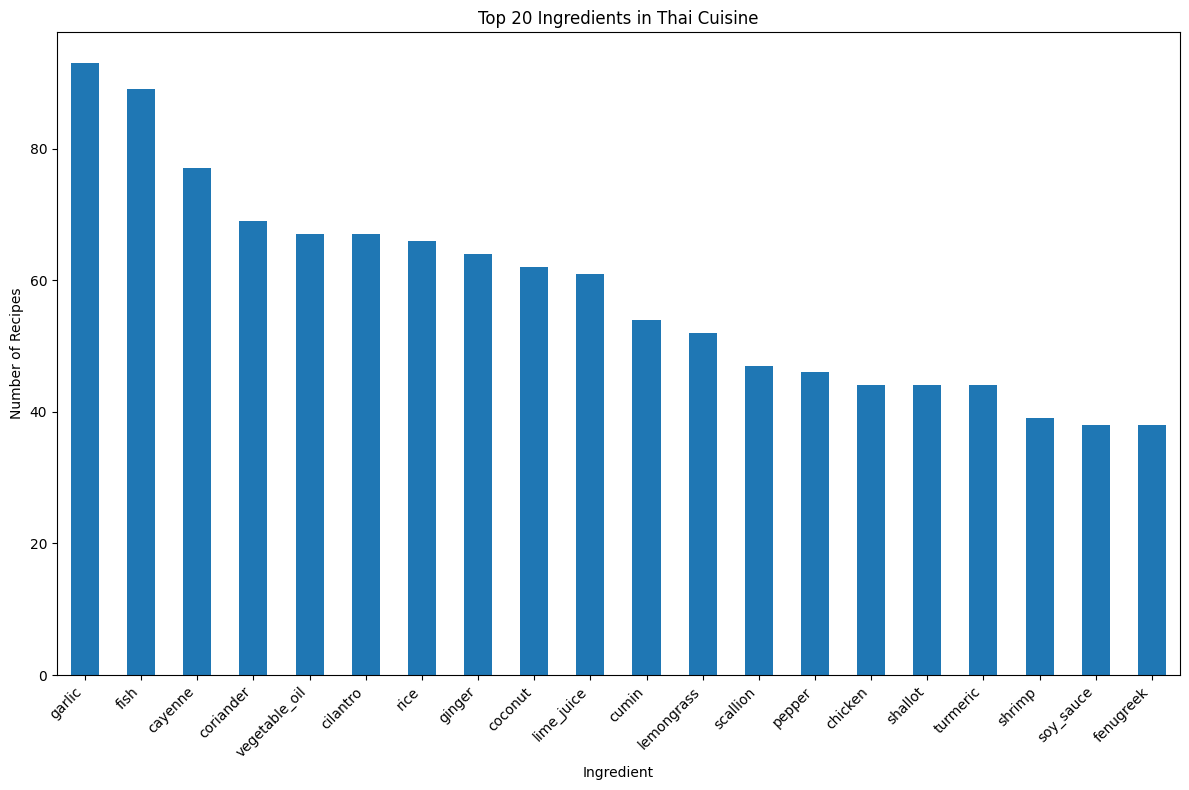

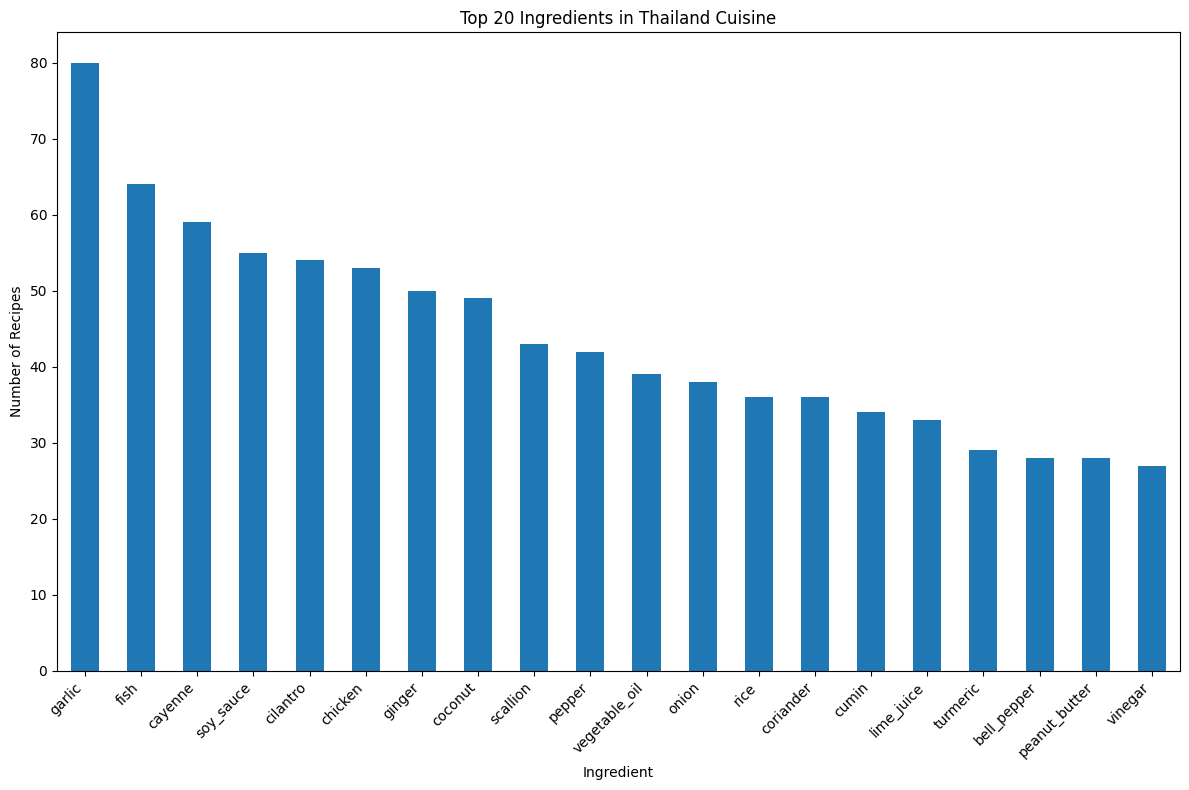

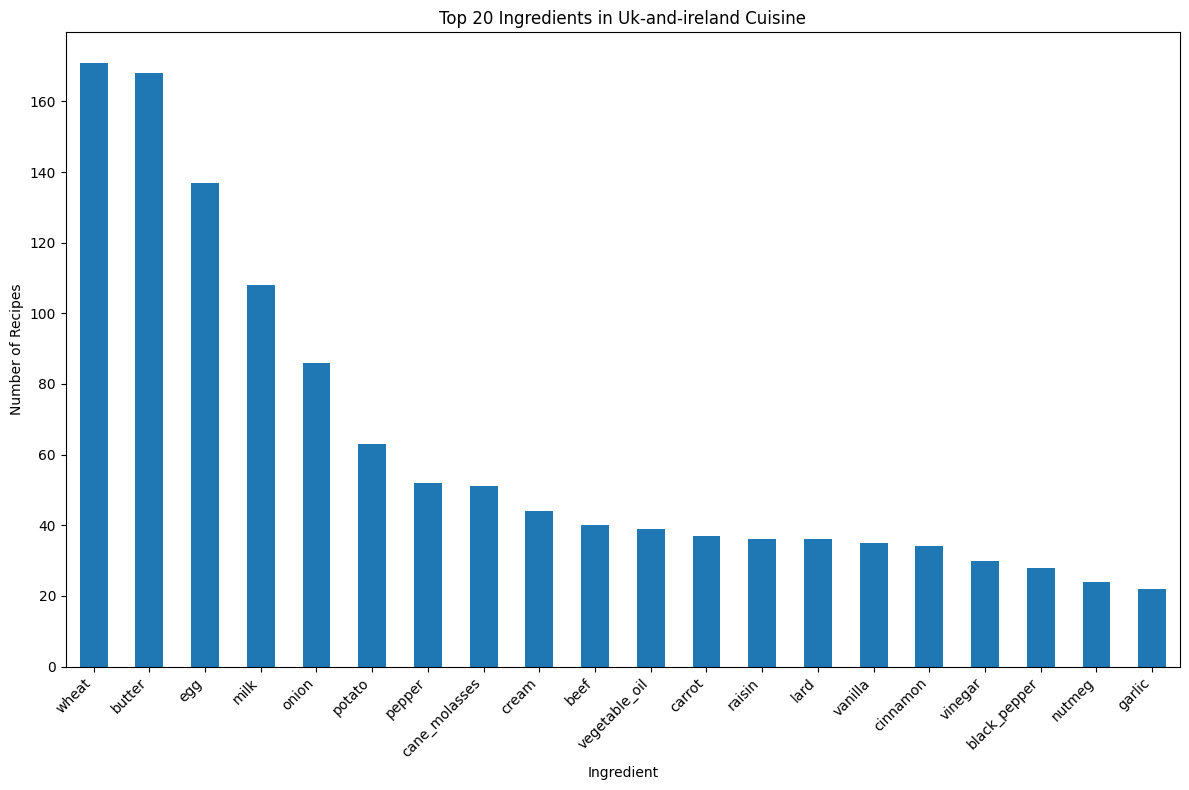

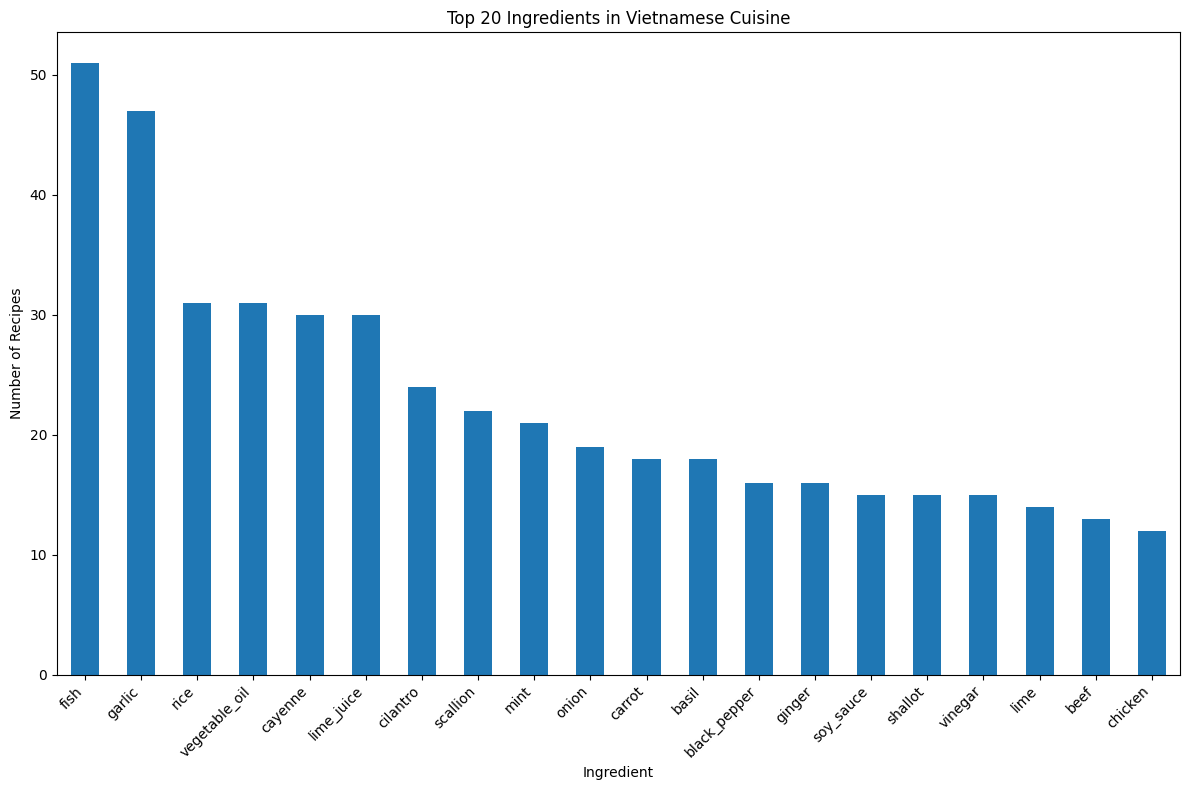

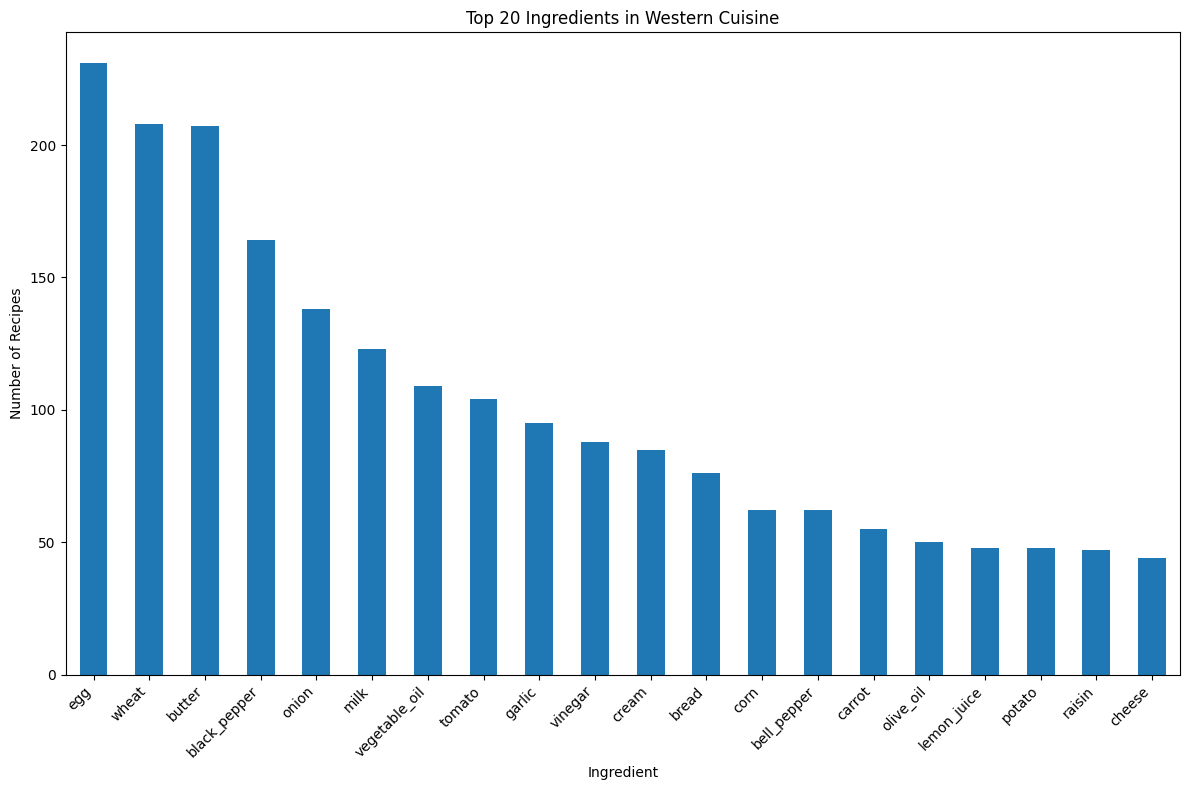

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Yes'/'No' to binary (1/0) for analysis
binary_data = recipes.iloc[:, 1:].replace({'Yes': 1, 'No': 0})

# Group by 'cuisine' and sum the binary data
cuisine_ingredient_sums = binary_data.groupby(recipes['cuisine']).sum()

# Plot the 20 most common ingredients for each cuisine
for cuisine in cuisine_ingredient_sums.index:
    # Sort the ingredients by their sum and select the top 20
    top_ingredients = cuisine_ingredient_sums.loc[cuisine].sort_values(ascending=False).head(20)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    top_ingredients.plot(kind='bar')
    
    # Setting titles and labels
    plt.title(f'Top 20 Ingredients in {cuisine.capitalize()} Cuisine')
    plt.xlabel('Ingredient')
    plt.ylabel('Number of Recipes')
    plt.xticks(rotation=45, ha='right')
    
    # Show plot
    plt.tight_layout()
    plt.show()


/home/stefanie/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1600x1000 with 0 Axes>

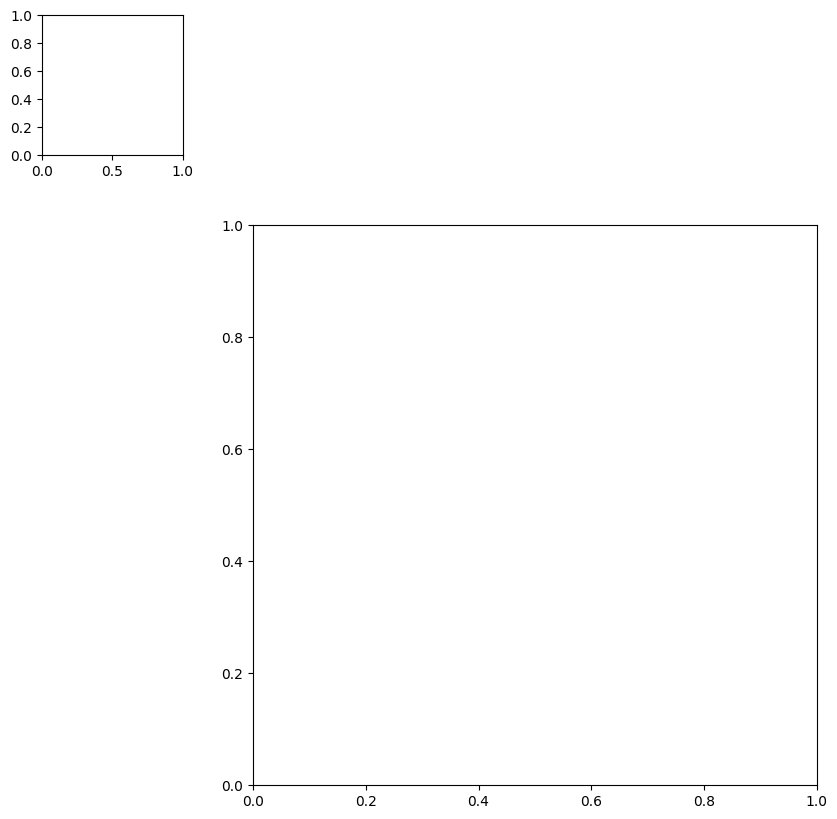

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Assuming `cuisines` is already defined
plt.figure(figsize=(16, 10))

# Create a clustered heatmap
sns.clustermap(cuisines, cmap='coolwarm', standard_scale=1, linewidths=0.5)

# Since `sns.clustermap` returns a grid, no need to set plt.title(), it's included in the clustermap
plt.show()


In [ ]:
import scipy
print(scipy.__version__)


Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.


In [26]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) 

CANADA
wheat (39%) butter (38%) egg (35%) onion (34%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) 

CHINA
soy_sauce (70%) garlic (45%) scallion (43%) egg (39%) 

CHINESE
soy_sauce (67%) ginger (59%) garlic (56%) scallion (50%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) 

FRANCE
butter (54%) egg (46%) wheat (43%) onion (32%) 

FRENCH
butter (48%) egg (43%) wheat (35%) olive_oil (30%) 

GERMAN
butter (55%) whea

At this point, we feel that we have understood the data well and the data is ready and is in the right format for modeling!

-----------


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Alex Aklson</a>



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-08-25 | 2.3 | Patsy | Aligned text for clarity. Fixed minor typos. Updated copyright to remove year.|
| 2021-04-06 | 2.2 | Malika | Updated data set link |
| 2020-09-23  | 2.1  | Lakshmi  | Fixed Typo errors |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |


<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
